In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm 

# hide warnings
import warnings
warnings.filterwarnings('ignore')

## Data Understanding, Exploration and Data Cleaning

In [2]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000

In [3]:
raw_data = pd.read_csv('train.csv')

In [4]:
raw_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
raw_data.shape

(1460, 81)

In [6]:
raw_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


#### Convert numeric categorical variables to categorical variable

In [7]:
raw_data['MSSubClass'] = raw_data['MSSubClass'].astype('object')
raw_data['OverallQual'] = raw_data['OverallQual'].astype('object')
raw_data['OverallCond'] = raw_data['OverallCond'].astype('object')
raw_data['BsmtFullBath'] = raw_data['BsmtFullBath'].astype('object')
raw_data['BsmtHalfBath'] = raw_data['BsmtHalfBath'].astype('object')
raw_data['FullBath'] = raw_data['FullBath'].astype('object')
raw_data['HalfBath'] = raw_data['HalfBath'].astype('object')
raw_data['BedroomAbvGr'] = raw_data['BedroomAbvGr'].astype('object')
raw_data['KitchenAbvGr'] = raw_data['KitchenAbvGr'].astype('object')
raw_data['TotRmsAbvGrd'] = raw_data['TotRmsAbvGrd'].astype('object')
raw_data['Fireplaces'] = raw_data['Fireplaces'].astype('object')
raw_data['GarageCars'] = raw_data['GarageCars'].astype('object')

In [8]:
raw_data.dtypes

Id                 int64
MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual       object
OverallCond       object
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [9]:
raw_data = raw_data.drop("Id", axis=1)

<AxesSubplot:>

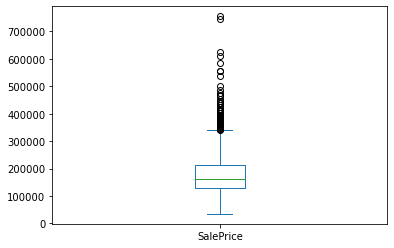

In [10]:
raw_data['SalePrice'].plot.box()

In [11]:
Q1 = raw_data['SalePrice'].quantile(0.25)
Q3 = raw_data['SalePrice'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
raw_data = raw_data[raw_data['SalePrice'] <= (Q3 + 1.5 *IQR)]

<AxesSubplot:>

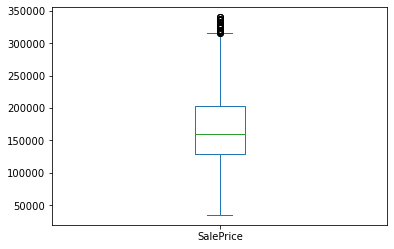

In [12]:
raw_data['SalePrice'].plot.box()

In [13]:
raw_data.shape

(1399, 80)

In [14]:
raw_data.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       256
LotArea             0
Street              0
Alley            1308
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

#### Fill missing values for categarical variables with NA as we can assume that for those houses that features are missing

In [15]:
raw_data['Alley'] = raw_data['Alley'].fillna("NA")
raw_data['MasVnrType'] = raw_data['MasVnrType'].fillna("None")
raw_data['BsmtQual'] = raw_data['BsmtQual'].fillna("NA")
raw_data['BsmtCond'] = raw_data['BsmtCond'].fillna("NA")
raw_data['BsmtExposure'] = raw_data['BsmtExposure'].fillna("NA")
raw_data['BsmtFinType1'] = raw_data['BsmtFinType1'].fillna("NA")
raw_data['BsmtFinType2'] = raw_data['BsmtFinType2'].fillna("NA")
raw_data['FireplaceQu'] = raw_data['FireplaceQu'].fillna('NA')
raw_data['GarageType'] = raw_data['GarageType'].fillna('NA')
raw_data['GarageFinish'] = raw_data['GarageFinish'].fillna('NA')
raw_data['GarageCars'] = raw_data['GarageCars'].fillna('NA')
raw_data['GarageQual'] = raw_data['GarageQual'].fillna('NA')
raw_data['GarageCond'] = raw_data['GarageCond'].fillna('NA')
raw_data['PoolQC'] = raw_data['PoolQC'].fillna("NA")
raw_data['Fence'] = raw_data['Fence'].fillna("NA")
raw_data['MiscFeature'] = raw_data['MiscFeature'].fillna("NA")

In [16]:
# Only 1 mising value for raw_data['Electrical'], fill it with most occuring Electrical  type
raw_data['Electrical'] = raw_data['Electrical'].fillna('SBrkr')

<AxesSubplot:>

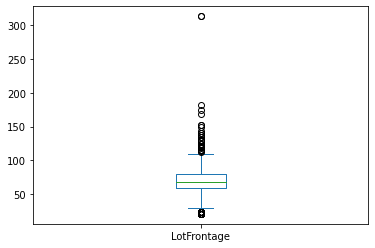

In [17]:
raw_data['LotFrontage'].plot.box()

In [18]:
raw_data['LotFrontage'].median()

68.0

In [19]:
raw_data['LotFrontage'].mean()

69.0586176727909

In [20]:
# Mean is approximately equal to median, so fill empty values with mean
raw_data['LotFrontage'] = raw_data['LotFrontage'].fillna(69)

In [21]:
raw_data['MasVnrArea'].isna().sum()

7

In [22]:
raw_data['MasVnrArea'].describe()

count    1392.000000
mean       90.176724
std       159.492384
min         0.000000
25%         0.000000
50%         0.000000
75%       144.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [23]:
# Fill missing value with median value
raw_data['MasVnrArea'] = raw_data['MasVnrArea'].fillna(0)

In [24]:
# Fill missing GarageYrBlt = House YearBuilt
raw_data['GarageYrBlt'] = raw_data['GarageYrBlt'].fillna(raw_data['YearBuilt'])

In [25]:
raw_data.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

<AxesSubplot:xlabel='MSSubClass', ylabel='Density'>

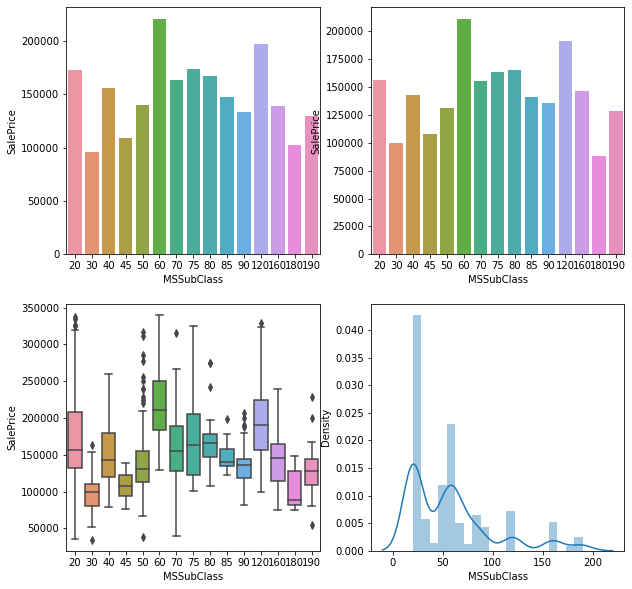

In [26]:
# MSSubClass: Identifies the type of dwelling involved in the sale  

fig, axes = plt.subplots(2,2, sharex=False, figsize=(10,10), squeeze=False)

meanSalePrice = raw_data.groupby('MSSubClass')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])

medianSalePrice = raw_data.groupby('MSSubClass')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])

sns.boxplot(ax=axes[1,0], data=raw_data, x='MSSubClass', y='SalePrice')

sns.distplot(ax=axes[1,1], a=raw_data['MSSubClass'])

#raw_data['MSSubClass'].value_counts()
#raw_data['MSSubClass'].value_counts() / len(raw_data)
# Most number of houses are of type
    #1) 20=1-STORY 1946 & NEWER ALL STYLES (507 = 36.24%)
    #2) 60=2-STORY 1946 & NEWER (274 = 19.58%)
    #3) 50=1-1/2 STORY FINISHED ALL AGES (142 = 10.15%)
    #4) 120=1-STORY PUD (Planned Unit Development) - 1946 & NEWER (85 = 6.07%)
    #5) 30=1-STORY 1945 & OLDER (69 = 4.7%)
# MSSubClass with highest mean/median value
    #1) 60=2-STORY 1946 & NEWER
    #2) 120=1-STORY PUD (Planned Unit Development) - 1946 & NEWER
    #3) 20=1-STORY 1946 & NEWER ALL STYLES
    #4) 80=SPLIT OR MULTI-LEVEL
    #5) 75=2-1/2 STORY ALL AGES

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

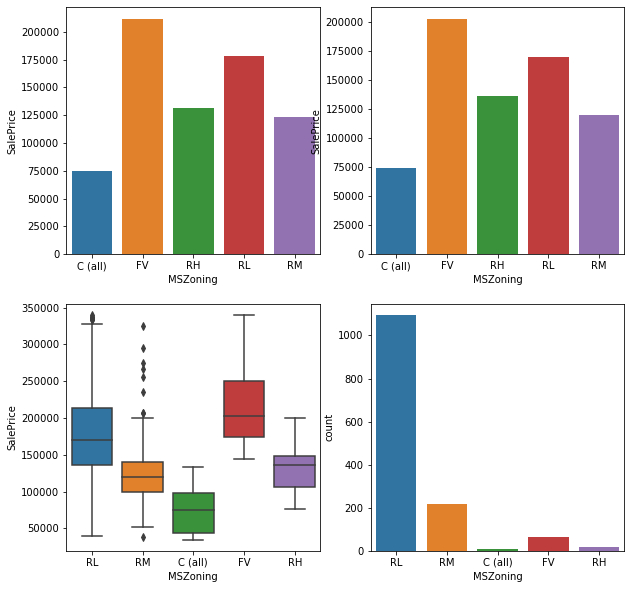

In [27]:
# MSZoning: Identifies the general zoning classification of the sale  

fig, axes = plt.subplots(2,2, sharex=False, figsize=(10,10), squeeze=False)

meanSalePrice = raw_data.groupby('MSZoning')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])

medianSalePrice = raw_data.groupby('MSZoning')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])

sns.boxplot(ax=axes[1,0], data=raw_data, x='MSZoning', y='SalePrice')

sns.countplot(ax=axes[1,1], x=raw_data['MSZoning'])

#raw_data['MSZoning'].value_counts()
#raw_data['MSZoning'].value_counts() / len(raw_data)
# Zone having maximun houses
    #1) RL=Residential Low Density (1093 = 78.12%)
    #2) RM=Residential Medium Density (216 = 15.43%)
    #3) FV=Floating Village Residential (64 = 4.57%)
    #4) RH=Residential High Density (16 = 1.14%)
    #5) C=Commercial (10)

# MSZoning with highest mean/median value
    #1) FV=Floating Village Residential
    #2) RL=Residential Low Density
    #3) RH=Residential High Density
    
#Houses with MSZoning=FV (Floating Village Residential) are less but their sell price is high

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

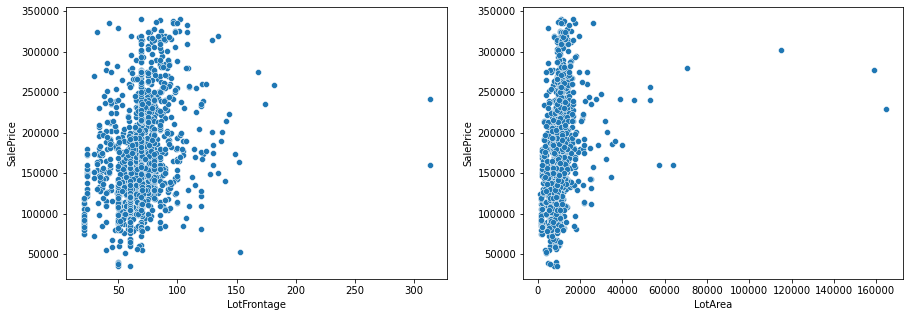

In [28]:
fig, axes = plt.subplots(1,2, sharex=False, figsize=(15,5), squeeze=False)

# LotFrontage: Linear feet of street connected to property
# raw_data['LotFrontage'].corr(raw_data['SalePrice']) = 0.29579
sns.scatterplot(ax=axes[0,0], x='LotFrontage', y='SalePrice', data=raw_data)
# LotFrontage distribution follow normal curve, maximux houses are around 50-90 feets
# Seems to have moderate relationship with SalePrice (raw_data['LotFrontage'].corr(raw_data['SalePrice']) = 35.18%)

# LotArea: Lot size in square feet
# raw_data['LotArea'].corr(raw_data['SalePrice']) = 0.2498
sns.scatterplot(ax=axes[0,1], x='LotArea', y='SalePrice', data=raw_data)

<AxesSubplot:xlabel='Street', ylabel='count'>

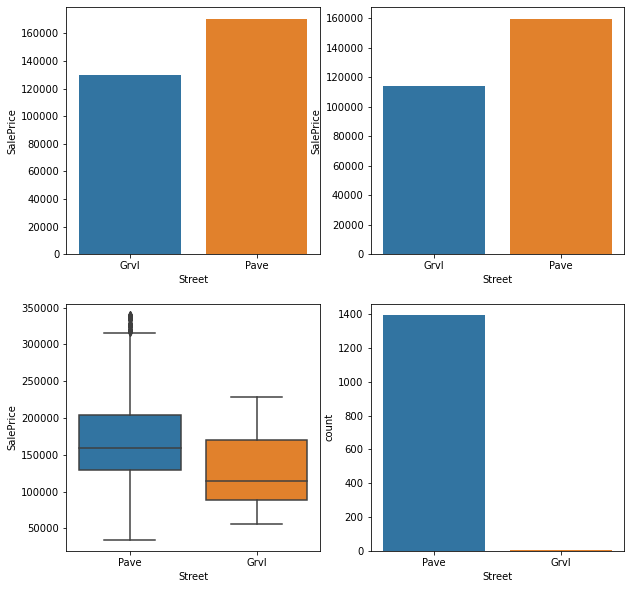

In [29]:
# Street: Type of road access to property

fig, axes = plt.subplots(2,2, sharex=False, figsize=(10,10), squeeze=False)

meanSalePrice = raw_data.groupby('Street')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])

medianSalePrice = raw_data.groupby('Street')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])

sns.boxplot(ax=axes[1,0], data=raw_data, x='Street', y='SalePrice')

sns.countplot(ax=axes[1,1], x=raw_data['Street'])

# Mean/Median price for Street=Pave is higher than that for Street=Grvl
# Also for Street=Pave, there are high humber of outliers
# Out of all the record only 6 records are for Street=Grvl  (raw_data['Street'].value_counts())

<AxesSubplot:xlabel='Alley', ylabel='count'>

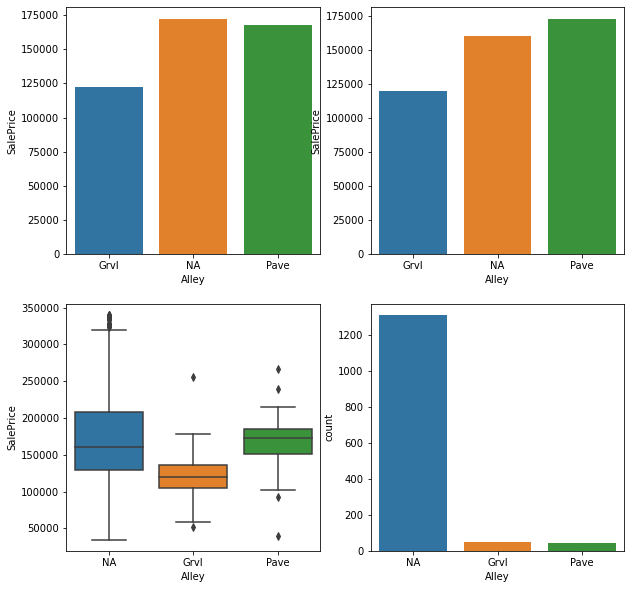

In [30]:
# Alley: Type of alley access to property

fig, axes = plt.subplots(2,2, sharex=False, figsize=(10,10), squeeze=False)

meanSalePrice = raw_data.groupby('Alley', dropna=False)[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])

medianSalePrice = raw_data.groupby('Alley')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])

sns.boxplot(ax=axes[1,0], data=raw_data, x='Alley', y='SalePrice')

sns.countplot(ax=axes[1,1], x=raw_data['Alley'])

# raw_data['Alley'].value_counts() /len(raw_data)
# 93.5% of the houses dont have alley access (Count: Grvl=50, Pave=41)
# Median price of houses having Alley=Pave is higher than other category

<AxesSubplot:xlabel='LotShape', ylabel='count'>

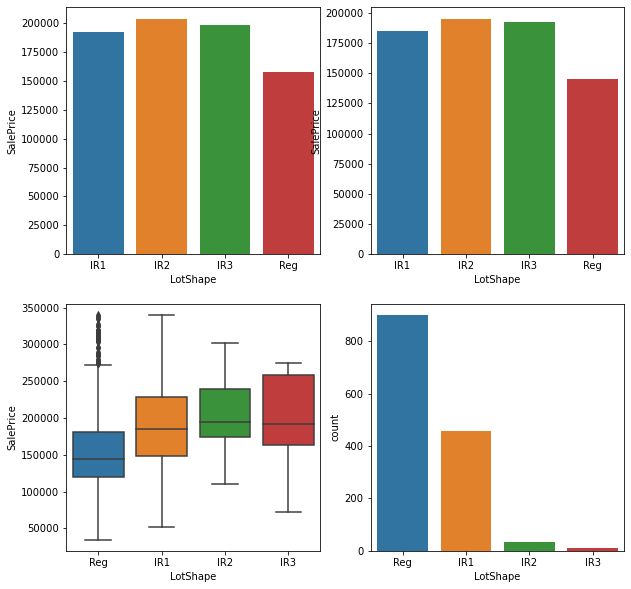

In [31]:
# LotShape: General shape of property

fig, axes = plt.subplots(2,2, sharex=False, figsize=(10,10), squeeze=False)

meanSalePrice = raw_data.groupby('LotShape')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])

medianSalePrice = raw_data.groupby('LotShape')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])

sns.boxplot(ax=axes[1,0], data=raw_data, x='LotShape', y='SalePrice')

sns.countplot(ax=axes[1,1], x=raw_data['LotShape'])

#raw_data['LotShape'].value_counts()
#raw_data['LotShape'].value_counts() / len(raw_data)
# LotShape having maximun houses
    #1) Reg=Regular (898 = 64.18%)
    #2) IR1=Slightly irregular (457 = 32.66%)
    #3) IR2=Moderately Irregular (35 = 2.5%)

# MSZoning with highest mean/median value
    #1) IR2=Moderately Irregular
    #2) IR3=Irregular
    
#Houses with LotShape=IR2 (Moderately Irregular) are less but their sell price is high

<AxesSubplot:xlabel='LandContour', ylabel='count'>

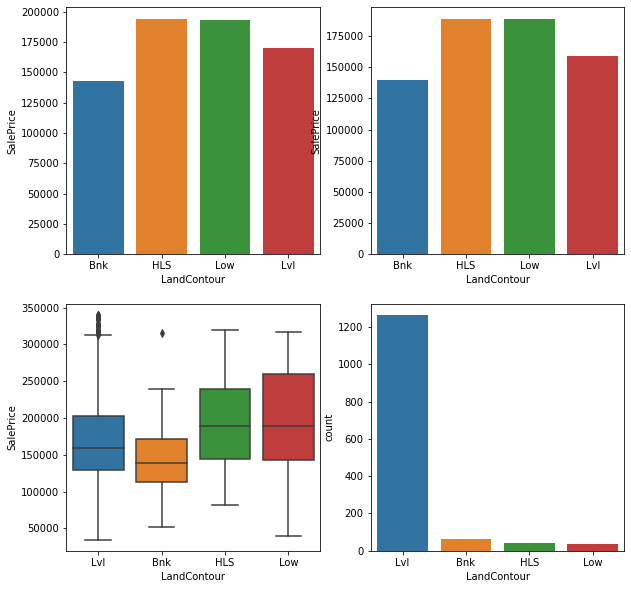

In [32]:
# LandContour: Flatness of the property

fig, axes = plt.subplots(2,2, sharex=False, figsize=(10,10), squeeze=False)

meanSalePrice = raw_data.groupby('LandContour')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])

medianSalePrice = raw_data.groupby('LandContour')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])

sns.boxplot(ax=axes[1,0], data=raw_data, x='LandContour', y='SalePrice')

sns.countplot(ax=axes[1,1], x=raw_data['LandContour'])

#raw_data['LandContour'].value_counts()
#raw_data['LandContour'].value_counts() / len(raw_data)
# LandContour having maximun houses
    #1) Lvl=Near Flat/Level (1261 = 90.13%)
    #2) Bnk=Banked - Quick and significant rise from street grade to building (63 = 4.5%)
    #3) HLS=Hillside - Significant slope from side to side (41 = 2.9%)
    #4) Low=Depression (34 = 2.43%)

# LandContour with highest mean/median value
    #1) HLS=Hillside
    #2) Low=Depression
    
#Houses with LandContour=HLS (Hillside) and LandContour=Low (Depression) are less but their sell price is high

<AxesSubplot:xlabel='Utilities', ylabel='count'>

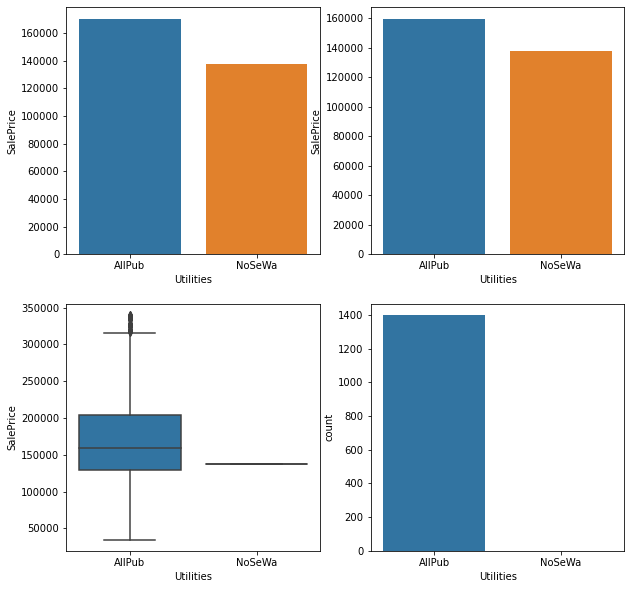

In [33]:
# Utilities: Type of utilities available

fig, axes = plt.subplots(2,2, sharex=False, figsize=(10,10), squeeze=False)

meanSalePrice = raw_data.groupby('Utilities')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])

medianSalePrice = raw_data.groupby('Utilities')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])

sns.boxplot(ax=axes[1,0], data=raw_data, x='Utilities', y='SalePrice')

sns.countplot(ax=axes[1,1], x=raw_data['Utilities'])

#raw_data['Utilities'].value_counts()
#raw_data['Utilities'].value_counts() / len(raw_data)
# All the houses are of type Utilities=AllPub (All public Utilities (E,G,W,& S)),
#  except 1 belonging to Utilities=NoSeWa (Electricity and Gas Only)

<AxesSubplot:xlabel='LotConfig', ylabel='count'>

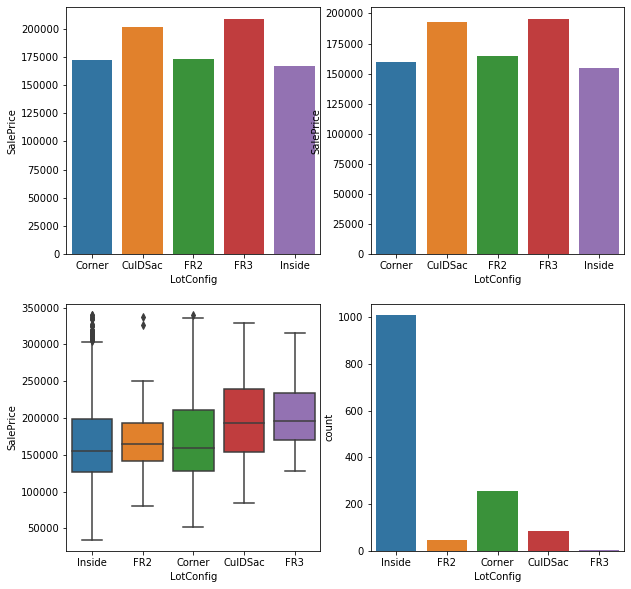

In [34]:
# LotConfig: Lot configuration

fig, axes = plt.subplots(2,2, sharex=False, figsize=(10,10), squeeze=False)

meanSalePrice = raw_data.groupby('LotConfig')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])

medianSalePrice = raw_data.groupby('LotConfig')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])

sns.boxplot(ax=axes[1,0], data=raw_data, x='LotConfig', y='SalePrice')

sns.countplot(ax=axes[1,1], x=raw_data['LotConfig'])

#raw_data['LotConfig'].value_counts()
#raw_data['LotConfig'].value_counts() / len(raw_data)
# LotConfig having maximun houses
    #1) Inside=Inside lot (1008 = 72%)
    #2) Corner=Corner lot (255 = 18.22%)
    #3) CulDSac=Cul-de-sac (86 = 6.14%)
    #4) FR2=Frontage on 2 sides of property (46 = 3.28%)
    #5) FR3=Frontage on 3 sides of property (4)

# LotConfig with highest mean/median value
    #1) CulDSac=Cul-de-sac
    #2) FR3=Frontage on 3 sides of property
    
#Houses with LotConfig=CulDSac (Cul-de-sac) and LotConfig=FR3 (Frontage on 3 sides of property) are less but their sell price is high

<AxesSubplot:xlabel='LandSlope', ylabel='count'>

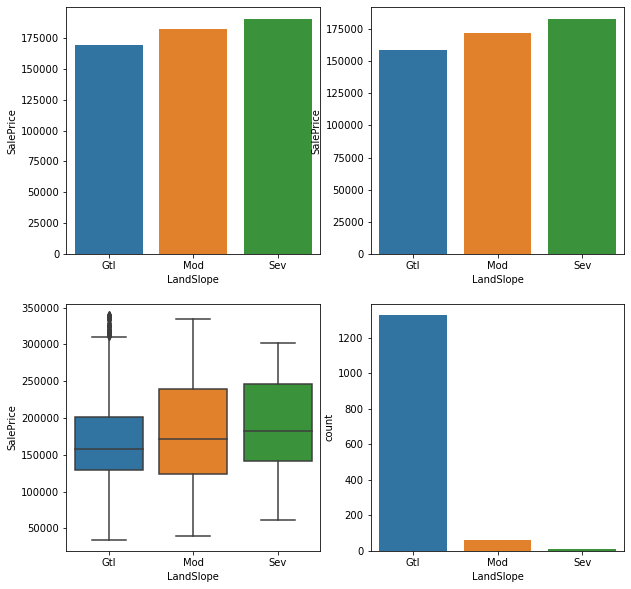

In [35]:
# LandSlope: Slope of property

fig, axes = plt.subplots(2,2, sharex=False, figsize=(10,10), squeeze=False)

meanSalePrice = raw_data.groupby('LandSlope')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])

medianSalePrice = raw_data.groupby('LandSlope')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])

sns.boxplot(ax=axes[1,0], data=raw_data, x='LandSlope', y='SalePrice')

sns.countplot(ax=axes[1,1], x=raw_data['LandSlope'])

#raw_data['LandSlope'].value_counts()
#raw_data['LandSlope'].value_counts() / len(raw_data)
# LandSlope having maximun houses
    #1) Gtl=Gentle slope (1326 = 94.78%)
    #2) Mod=Moderate Slope (61 = 4.36%)
    #3) Sev=Severe Slope (12)

# LandSlope with highest mean/median value
    #1) Sev=Severe Slope
    #2) Mod=Moderate Slope
    
#Houses with LandSlope=Sev (Severe Slope) are less but their sell price is high, these seems to be houses with LandContour=HLS 

[]

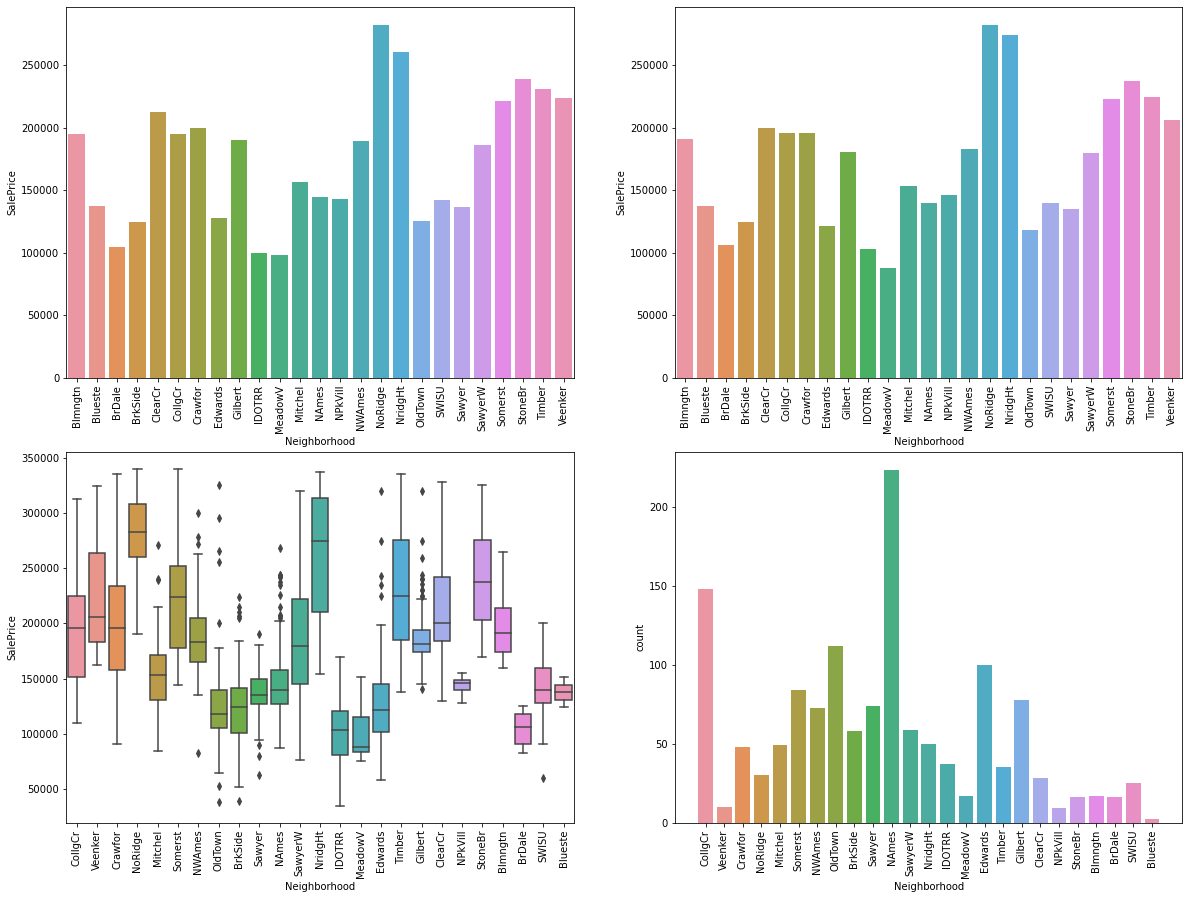

In [36]:
# Neighborhood: Physical locations within Ames city limits

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('Neighborhood')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('Neighborhood')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='Neighborhood', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['Neighborhood'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['Neighborhood'].value_counts()
#raw_data['Neighborhood'].value_counts() / len(raw_data)
# Neighborhood having maximun houses
    #1) Names=North Ames (224 = 16%)
    #2) CollgCr=College Creek (148 = 10.57%)
    #3) OldTown=Old Town (112 = 8%)

# Neighborhood with highest mean/median value
    #1) NridgHt=Northridge Heights
    #2) NoRidge=Northridge
    #3) StoneBr=Stone Brook
    
#Houses with Neighborhood=NridgHt/NoRidge/StoneBr are less but their sell price is high

[]

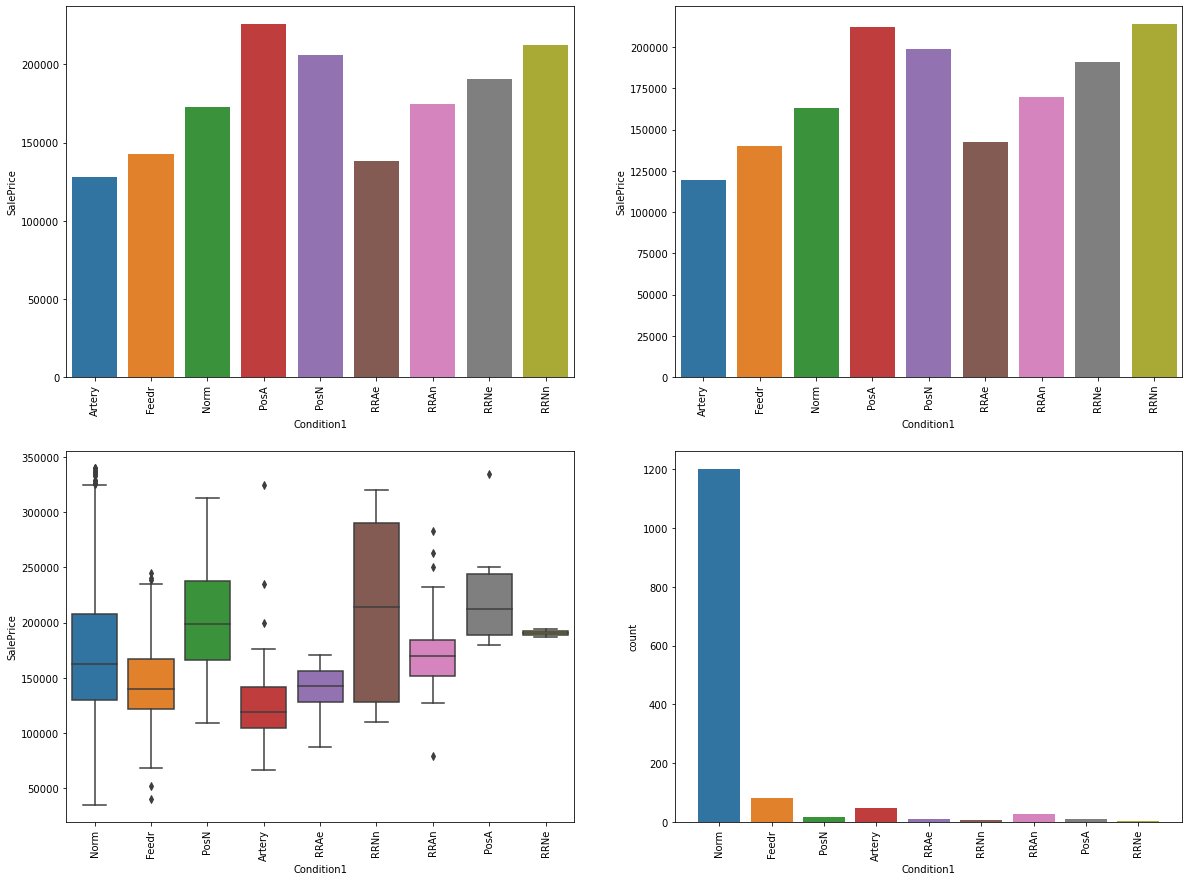

In [37]:
# Condition1: Proximity to various conditions

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('Condition1')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('Condition1')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='Condition1', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['Condition1'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['Condition1'].value_counts()
#raw_data['Condition1'].value_counts() / len(raw_data)
# Condition1 having maximun houses
    #1) Norm=Normal (1202 = 85.91%)
    #2) Feedr=Adjacent to feeder street (81 = 5.78%)
    #3) Artery=Adjacent to arterial street (47 = 3.35%)

# Condition1 with highest mean/median value
    #1) PosA=Adjacent to postive off-site feature
    #2) PosN=Near positive off-site feature--park, greenbelt, etc.
    #3) RRAe=Adjacent to East-West Railroad
    
#Houses with Condition1=PosA/PosN/RRAe are less but their sell price is high

[]

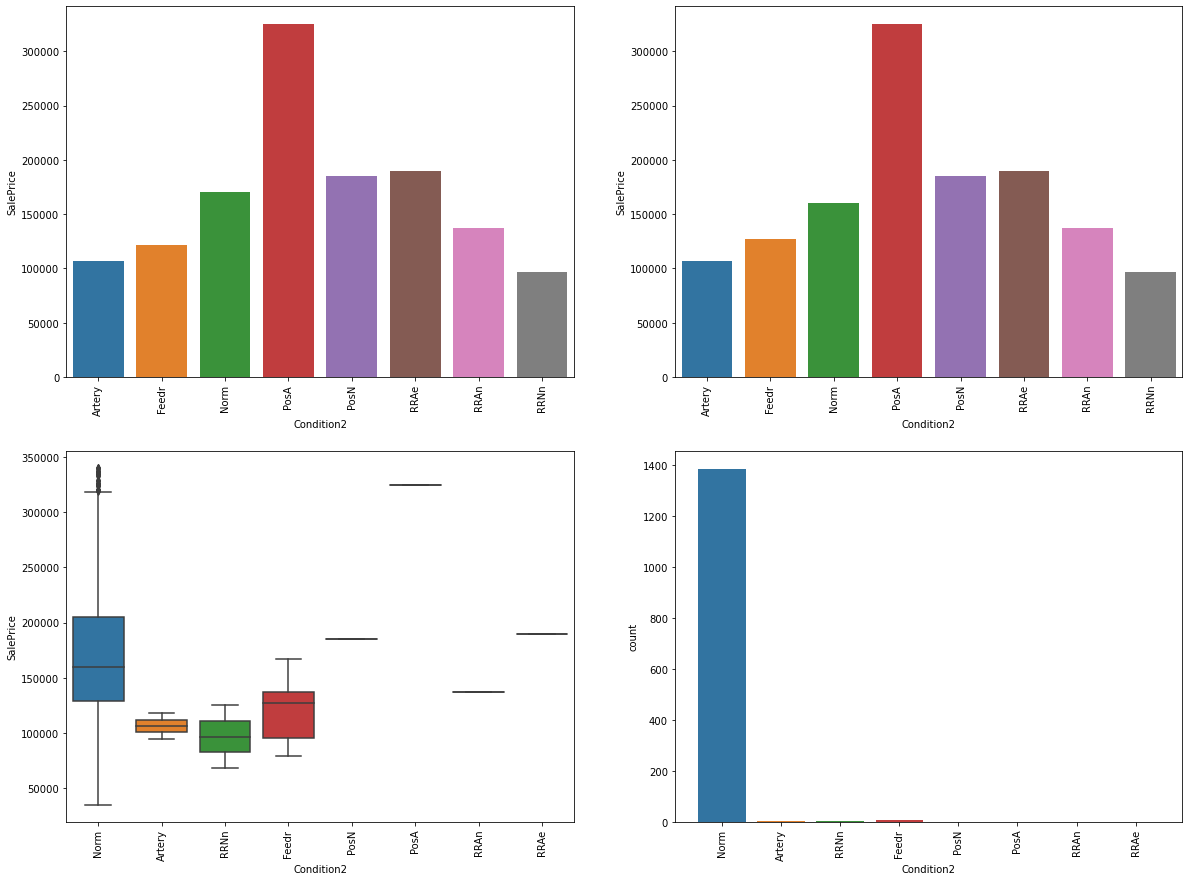

In [38]:
# Condition2: Proximity to various conditions (if more than one is present)

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('Condition2')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('Condition2')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='Condition2', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['Condition2'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['Condition2'].value_counts()
#raw_data['Condition2'].value_counts() / len(raw_data)
# Condition2 having maximun houses
    #1) Norm=Normal (1385 = 98.99%)
    #2) Feedr=Adjacent to feeder street (6)
    #3) Artery=Adjacent to arterial street (2)

# Condition2 with highest mean/median value
    #1) PosA=Adjacent to postive off-site feature
    #2) PosN=Near positive off-site feature--park, greenbelt, etc.
    #3) RRAe=Adjacent to East-West Railroad
    
#Not any conclusive evidence of any relationship as number of Condition2 other than 'Norm' are very less

[]

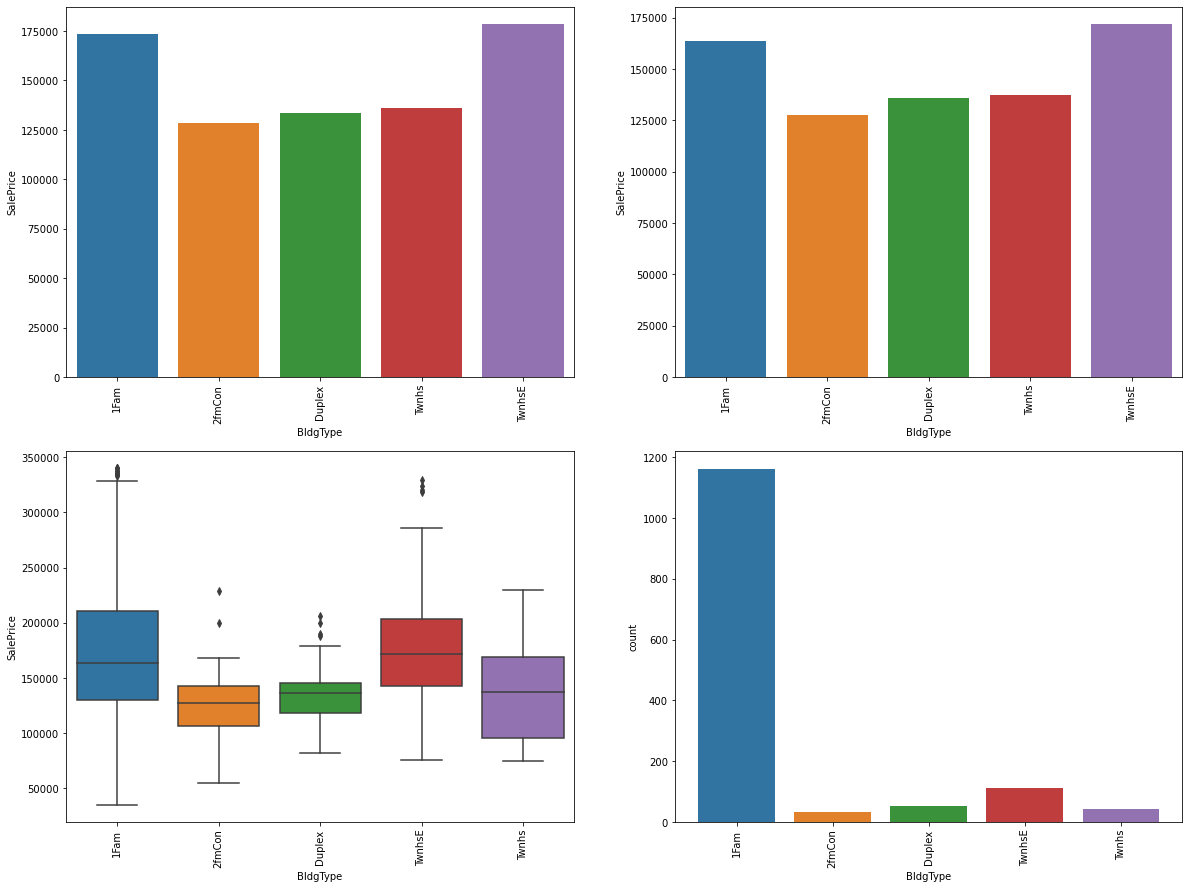

In [39]:
# BldgType: Type of dwelling

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('BldgType')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('BldgType')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='BldgType', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['BldgType'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['BldgType'].value_counts()
#raw_data['BldgType'].value_counts() / len(raw_data)
# BldgType having maximun houses
    #1) 1Fam=Single-family Detached (1161 = 82.98%)
    #2) TwnhsE=Townhouse End Unit (112 = 8%)
    #3) Duplx=Duplex (52 = 3.7%)

# BldgType with highest mean/median value
    #1) TwnhsE=Townhouse End Unit
    #2) 1Fam=Single-family Detached
    #3) TwnhsI=Townhouse Inside Unit(Twnhs)
    
# Houses with BldgType=TwnhsE are less but their sell price is high

[]

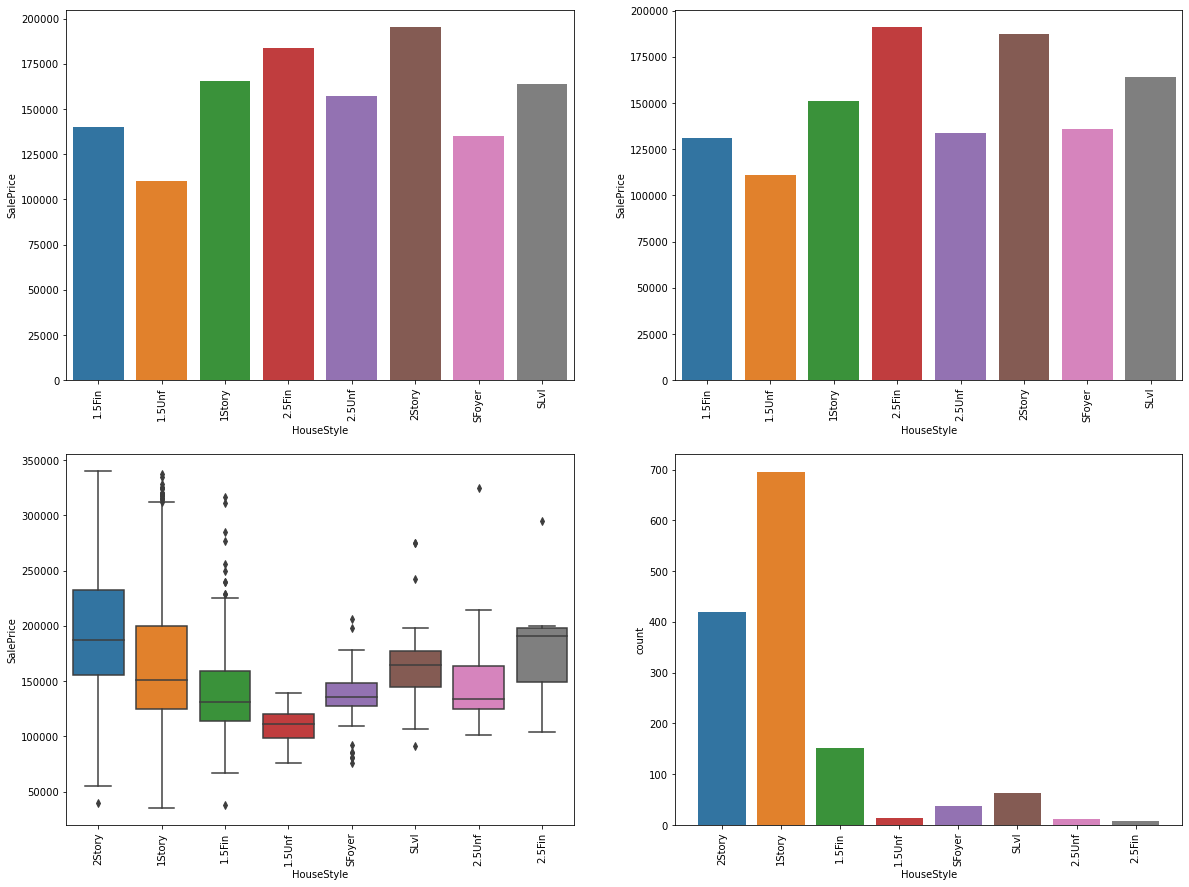

In [40]:
# HouseStyle: Style of dwelling

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('HouseStyle')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('HouseStyle')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='HouseStyle', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['HouseStyle'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['HouseStyle'].value_counts()
#raw_data['HouseStyle'].value_counts() / len(raw_data)
# HouseStyle having maximun houses
    #1) 1Story=One story (695 = 49.67%)
    #2) 2Story=Two story (419 = 29.95%)
    #3) 1.5Fin=One and one-half story: 2nd level finished (152 = 10.86%)

# HouseStyle with highest mean/median value
    #1) 2.5Fin=Two and one-half story: 2nd level finished
    #2) 2Story=Two story
    #3) SLvl=Split Level
    
# Houses with HouseStyle=2.5Fin (8) are less but their sell price is high
# HouseStyle = Finished (1.5Fin and 2.5 Fin) have higher selling price as compare to HouseStyle = Unfinished

[]

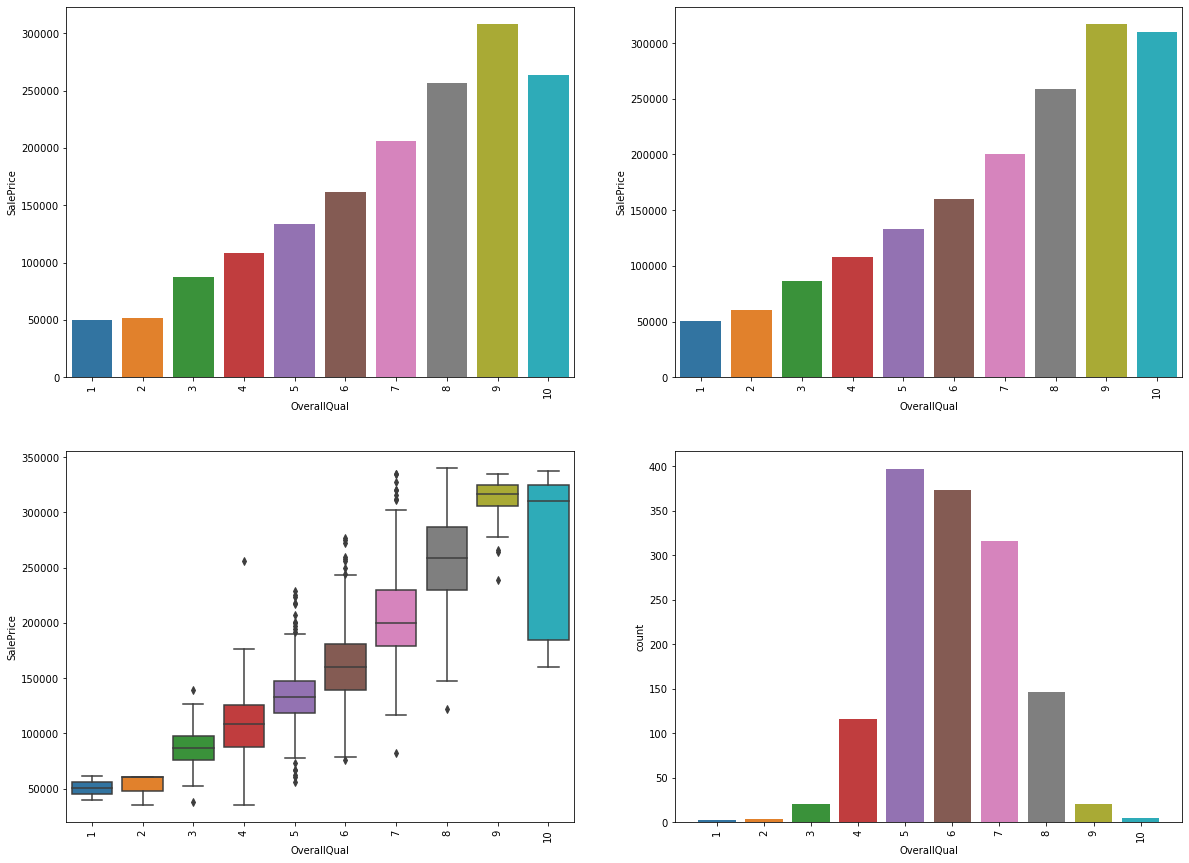

In [41]:
# OverallQual: Rates the overall material and finish of the house

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('OverallQual')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('OverallQual')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='OverallQual', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['OverallQual'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['OverallQual'].value_counts()
#raw_data['OverallQual'].value_counts() / len(raw_data)
# OverallQual having maximun houses
    #1) 5=Average (397 = 28.37%)
    #2) 6=Above Average (374 = 26.73%)
    #3) 7=Good (316 = 22.58%)
    
# As the overall material anf finish of the house increases, selling price of the house increases
# Houses with OverallQual=10 (18) are very less but their selling price is high

[]

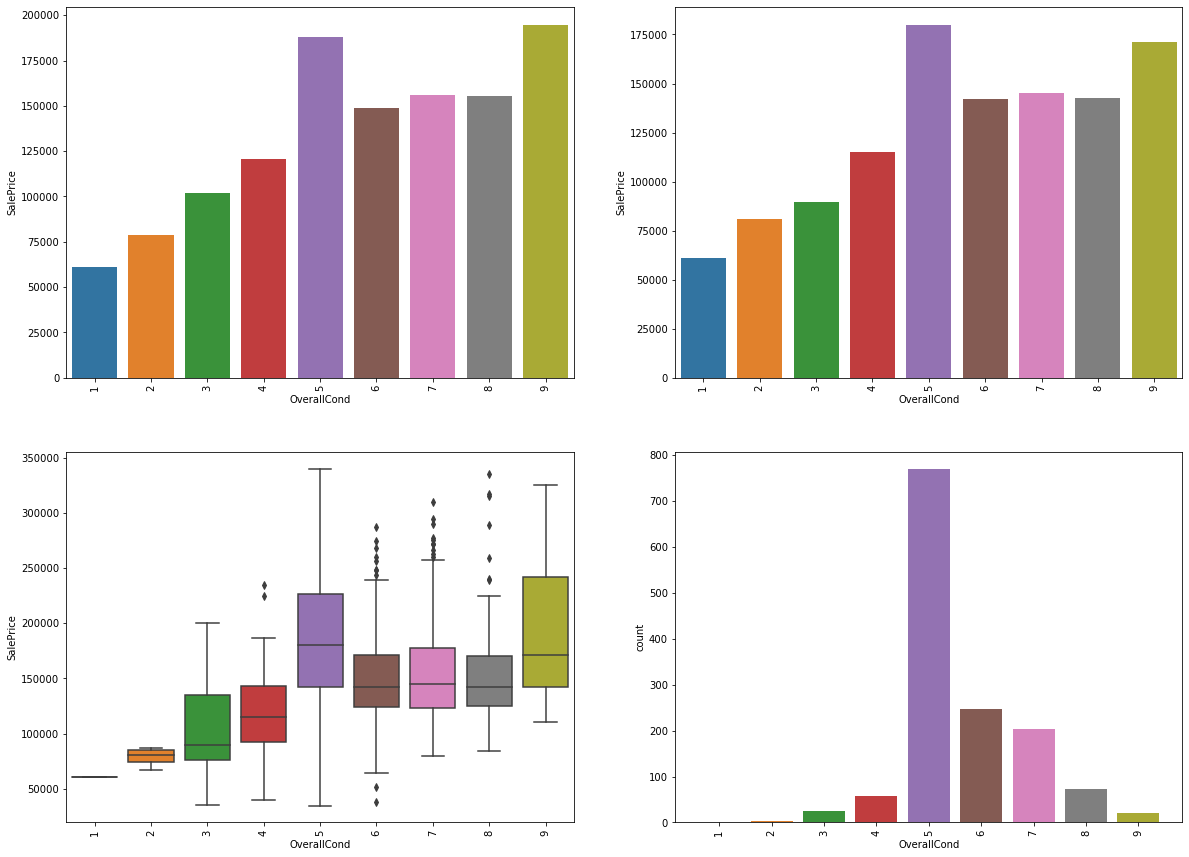

In [42]:
# OverallCond: Rates the overall condition of the house

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('OverallCond')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('OverallCond')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='OverallCond', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['OverallCond'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['OverallCond'].value_counts()
#raw_data['OverallCond'].value_counts() / len(raw_data)
# OverallCond having maximun houses
    #1) 5=Average (769 = 54.96%)
    #2) 6=Above Average (248 = 17.72%)
    #3) 7=Good (203 = 14.51%)
    
# If the overall condition of the house is good then you will get good selling price
# But here observation is that average houses are also getting good selling price

[]

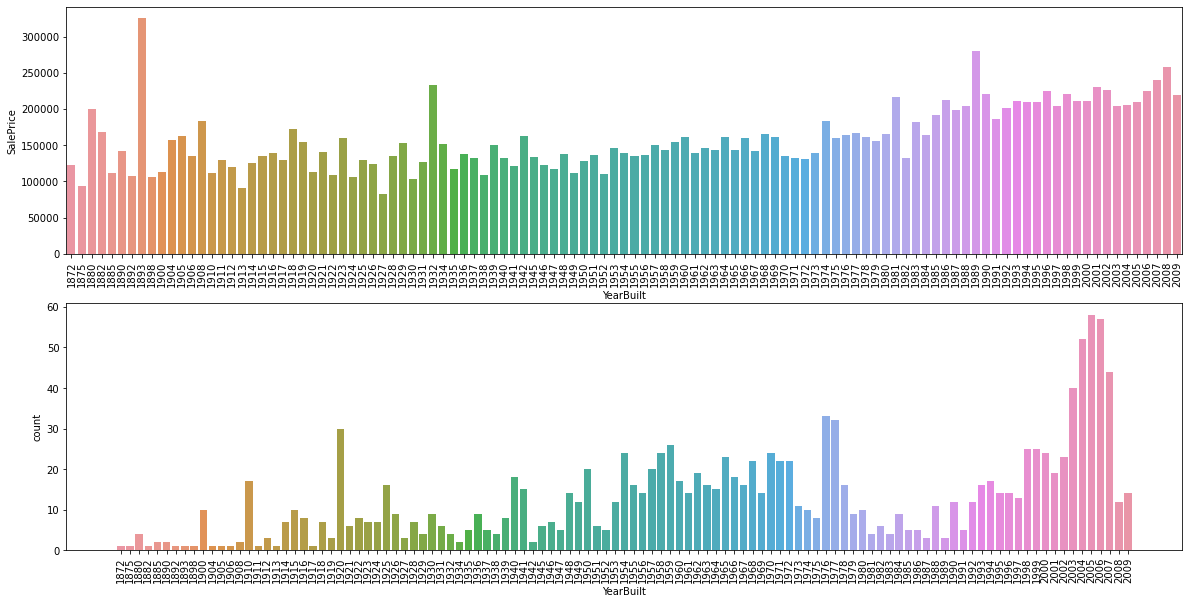

In [43]:
# YearBuilt: Original construction date

fig, axes = plt.subplots(2,1, sharex=False, figsize=(20,10), squeeze=False)

meanSalePrice = raw_data.groupby('YearBuilt')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,0], x=raw_data['YearBuilt'])
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['YearBuilt'].value_counts()
#raw_data['YearBuilt'].value_counts() / len(raw_data)
# YearBuilt having maximun houses: 2006, 2005, 2004, 2007, 2003

# In general, newer the house, higher the price of the house

#raw_data['YearBuilt'].corr(raw_data['SalePrice']) = 0.56455

[]

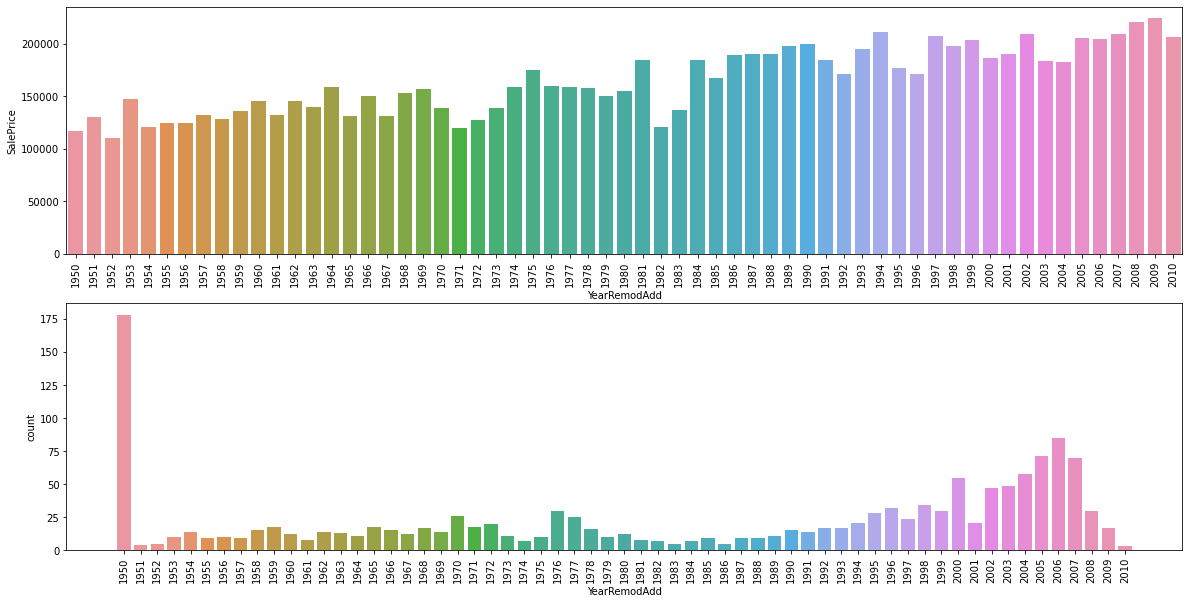

In [44]:
# YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

fig, axes = plt.subplots(2,1, sharex=False, figsize=(20,10), squeeze=False)

meanSalePrice = raw_data.groupby('YearRemodAdd')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,0], x=raw_data['YearRemodAdd'])
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['YearRemodAdd'].value_counts()
#raw_data['YearRemodAdd'].value_counts() / len(raw_data)
# YearBuilt having maximun houses: 1950 (12.19%), 2006, 2007, 2005, 2004

# In general, newer the house or more recently remodelled it, higher the price of the house

# raw_data['YearRemodAdd'].corr(raw_data['SalePrice']) = 0.54116

[]

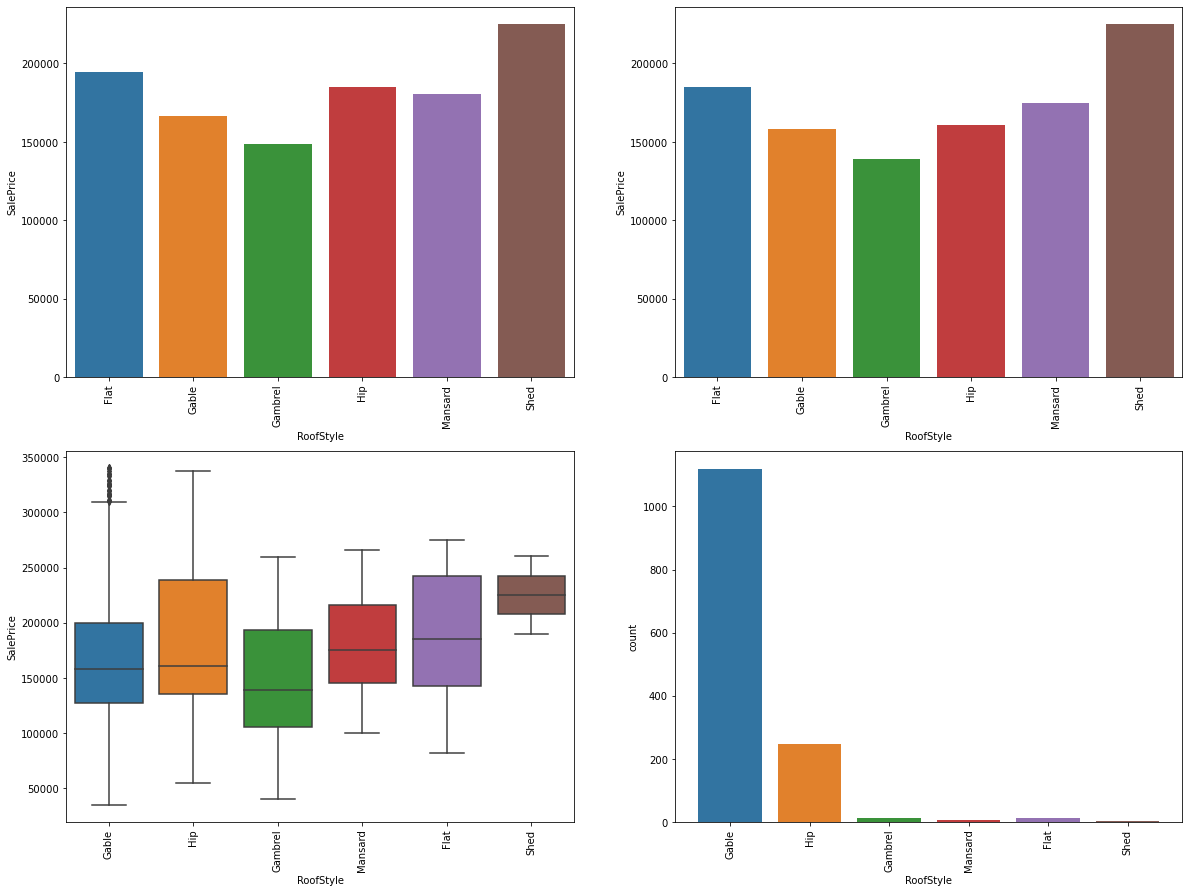

In [45]:
# RoofStyle: Type of roof

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('RoofStyle')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('RoofStyle')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='RoofStyle', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['RoofStyle'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['RoofStyle'].value_counts()
#raw_data['RoofStyle'].value_counts() / len(raw_data)
# RoofStyle having maximun houses
    #1) Gable (1119 = 79.98%)
    #2) Hip (247 = 17.65%)

# RoofStyle with highest mean/median value
    #1) Shed
    #2) Hip
    #3) Flat
    
# Houses with RoofStyle=Shed(2)/Hip/Flat(13) are less but their sell price is high

[]

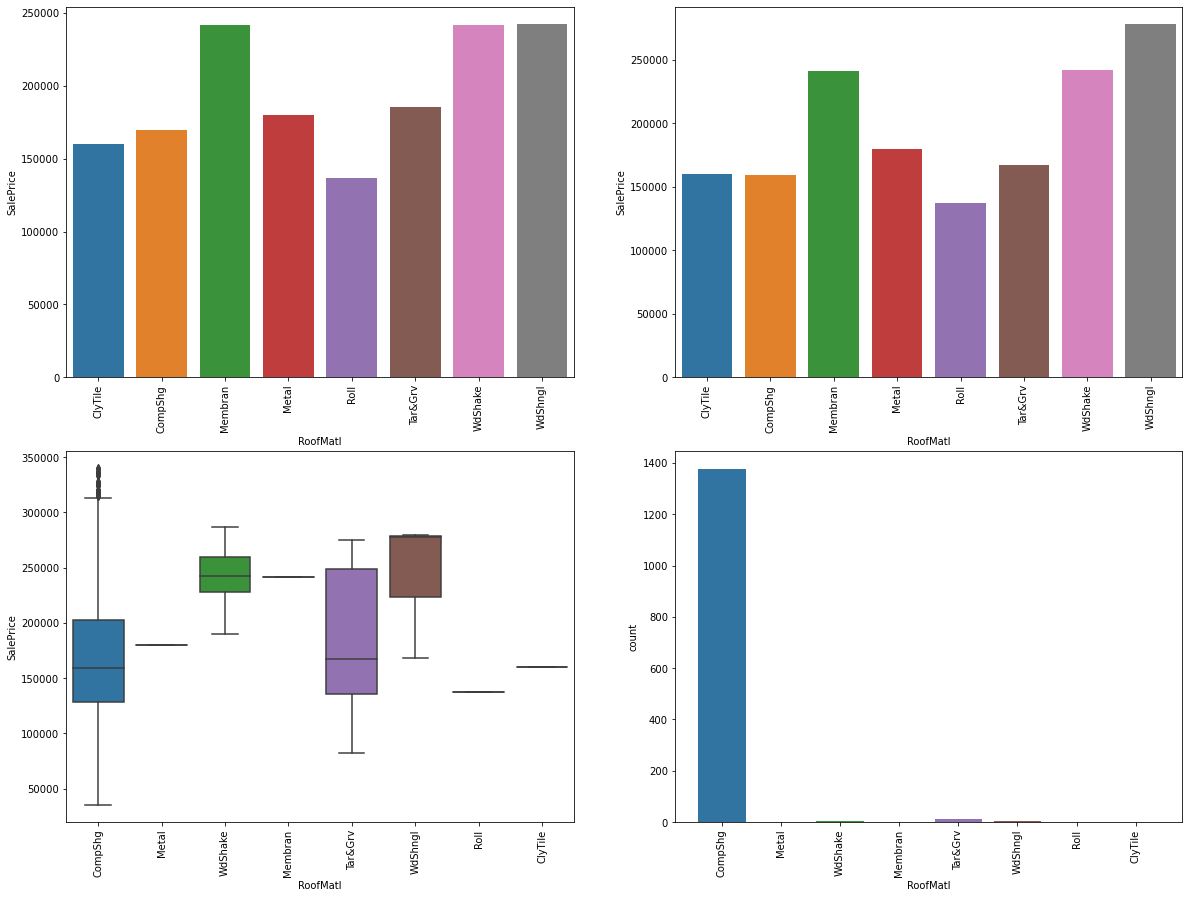

In [46]:
# RoofMatl: Roof material

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('RoofMatl')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('RoofMatl')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='RoofMatl', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['RoofMatl'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['RoofMatl'].value_counts()
#raw_data['RoofMatl'].value_counts() / len(raw_data)
# RoofMatl having maximun houses
    #1) CompShg=Standard (Composite) Shingle (1376=98.35%)

# RoofMatl with highest mean/median value
    #1) WdShngl=Wood Shingles
    #2) Membran=Membrane
    #3) WdShngl=Wood Shingles
    
# Could not make conclusive evedence as number of houses with RoofMatl other than CompShg are very less

[]

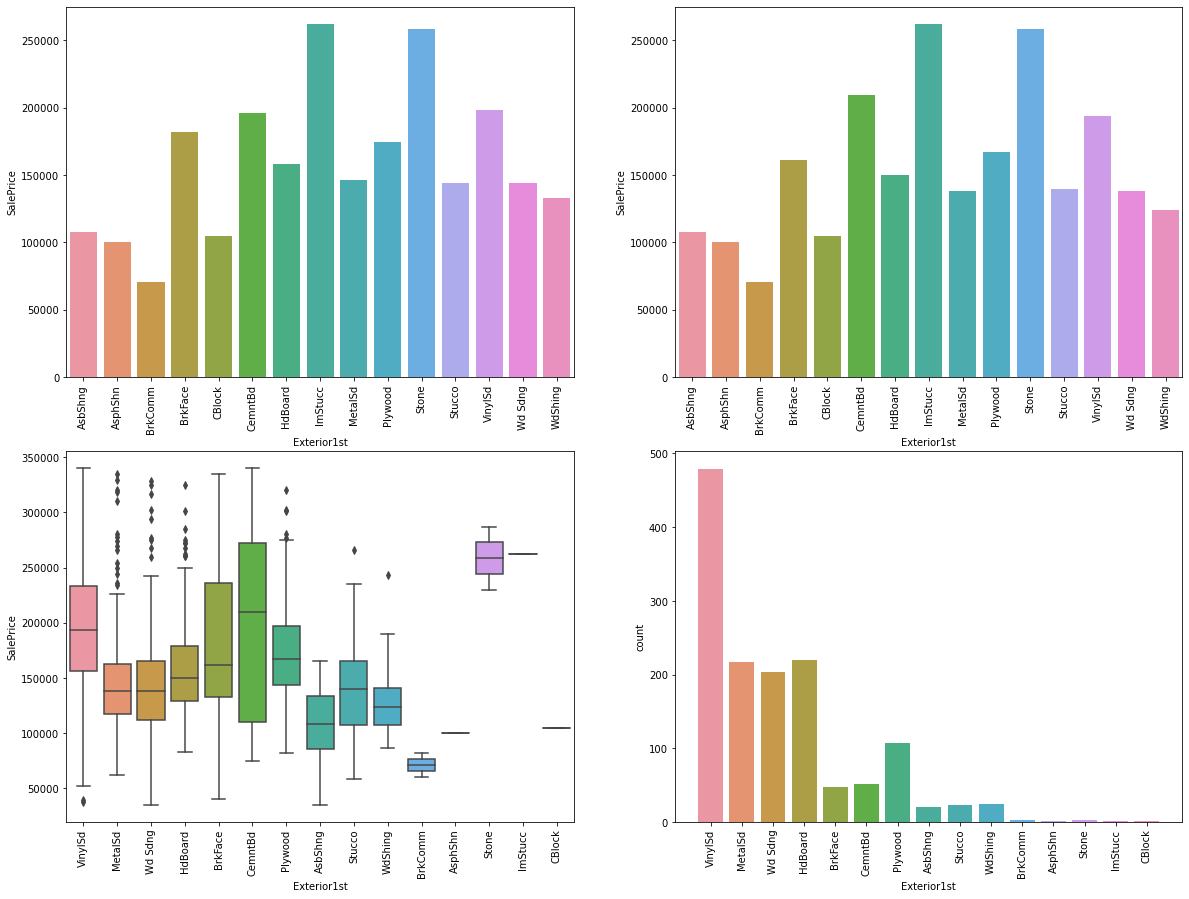

In [47]:
# Exterior1st: Exterior covering on house

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('Exterior1st')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('Exterior1st')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='Exterior1st', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['Exterior1st'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['Exterior1st'].value_counts()
#raw_data['Exterior1st'].value_counts() / len(raw_data)
# Exterior1st having maximun houses
    #1) VinylSd=Vinyl Siding (479 = 34.23%)
    #2) HdBoard=Hard Board (220 = 15.72%)
    #3) MetalSd=Metal Siding (217 = 15.51%)
    #4) Wd Sdng=Wood Siding (203 = 14.51%)

# Exterior1st with highest mean/median value
    #1) ImStucc=Imitation Stucco
    #2) Stone
    #3) CemntBd=Cement Board
    #4) VinylSd=Vinyl Siding
    
# Houses with Exterior1st=ImStucc/Stone/CemntBd/Wd Sdng are less but their sell price is high

[]

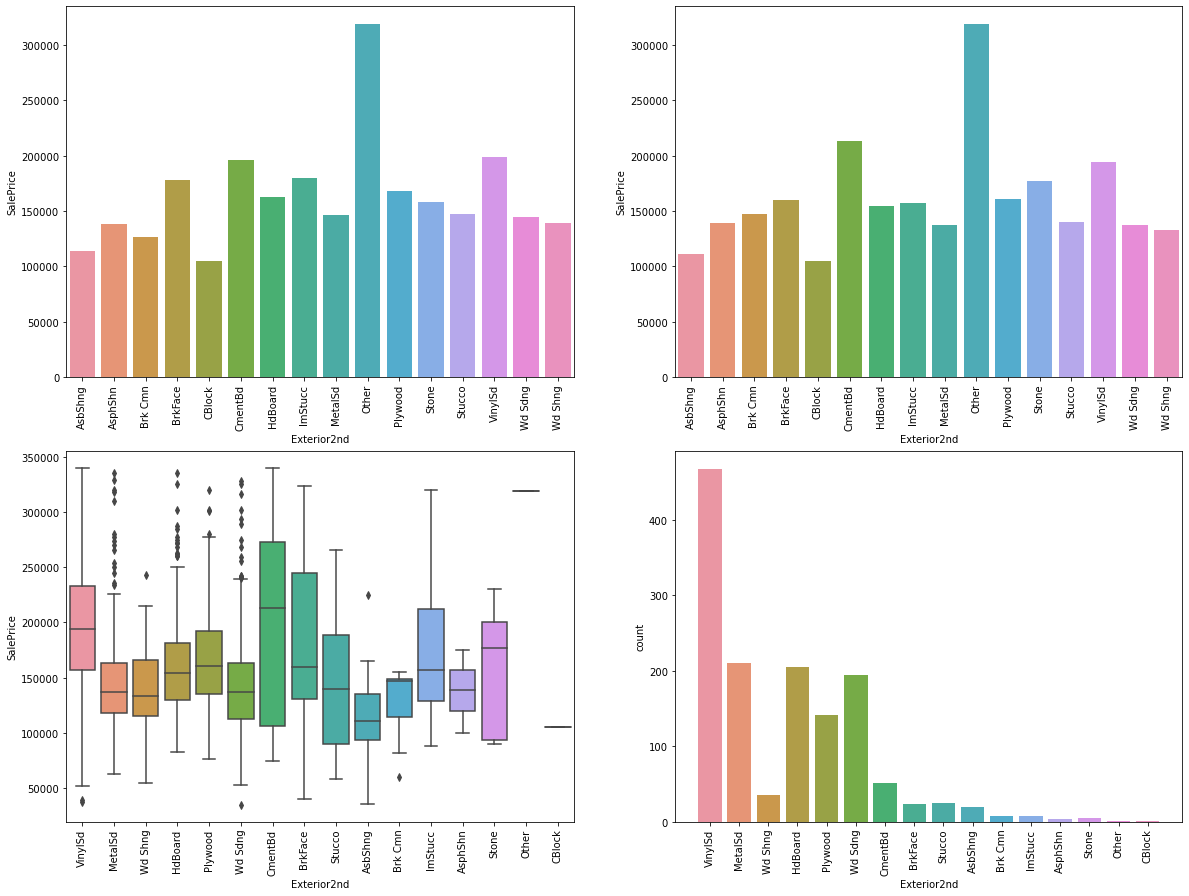

In [48]:
# Exterior2nd: Exterior covering on house (if more than one material)

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('Exterior2nd')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('Exterior2nd')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='Exterior2nd', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['Exterior2nd'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['Exterior2nd'].value_counts()
#raw_data['Exterior2nd'].value_counts() / len(raw_data)
# Exterior2nd having maximun houses
    #1) VinylSd=Vinyl Siding (468 = 33.45%)
    #2) MetalSd=Metal Siding (211 = 15.08%)
    #3) HdBoard=Hard Board (205 = 14.65%)
    #4) Wd Sdng=Wood Siding (194 = 13.86%)

# Exterior2nd with highest mean/median value
    #1) Other
    #2) ImStucc=Imitation Stucco
    #3) CemntBd=Cement Board
    #4) VinylSd=Vinyl Siding
    
# Houses with Exterior2nd=ImStucc/CemntBd Sdng are less but their sell price is high
# Houses with Exterior2nd=VinylSd have large number and their selling price is good

[]

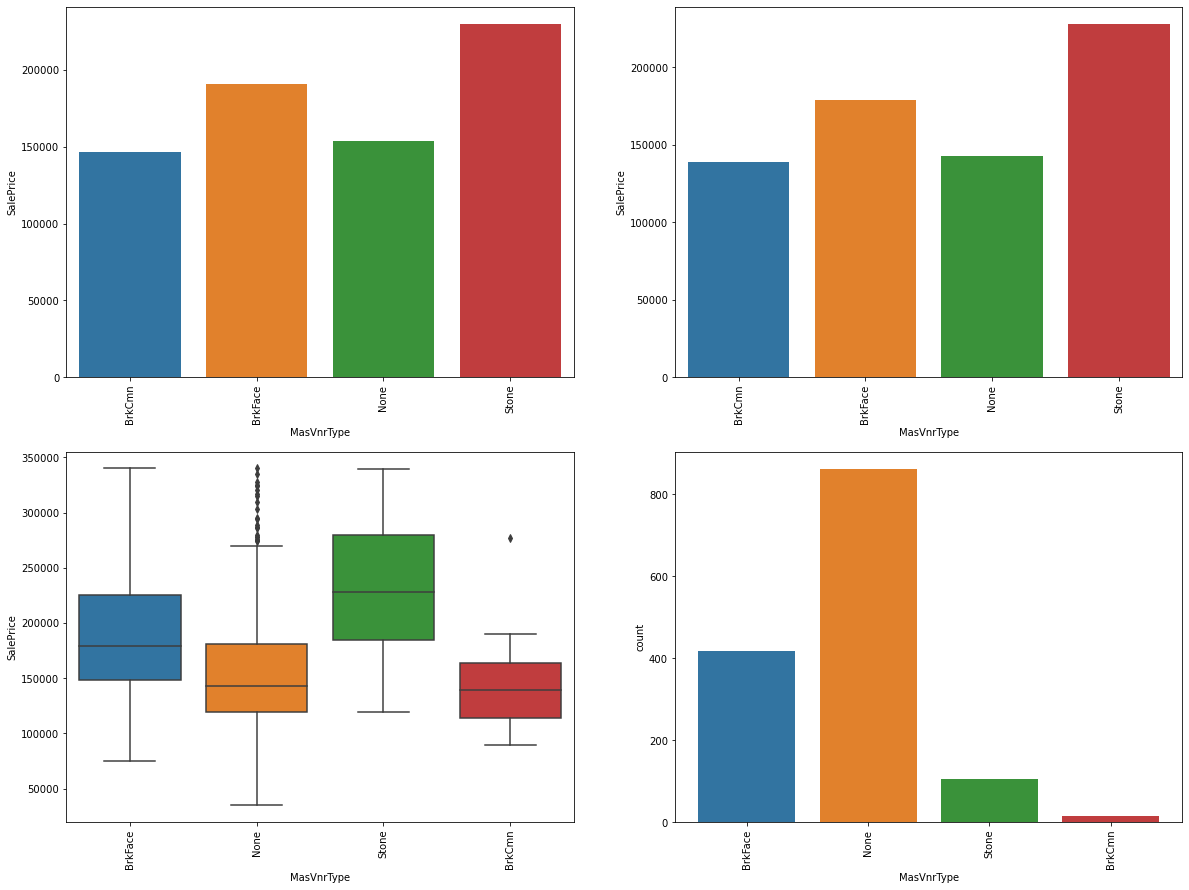

In [49]:
# MasVnrType: Masonry veneer type

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('MasVnrType')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('MasVnrType')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='MasVnrType', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['MasVnrType'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['MasVnrType'].value_counts()
#raw_data['MasVnrType'].value_counts() / len(raw_data)
# MasVnrType having maximun houses
    #1) None (861=61.54%)
    #2) BrkFace=Brick Face (418 = 29.87%)
    #3) Stone (105 = 7.5%)

# MasVnrType with highest mean/median value
    #1) Stone
    #2) BrkFace=Brick Face
    
# Houses with MasVnrType=Stone are less but their selling price is high
# Houses with MasVnrType=BrkFace are around 30.47% and there selling price is good

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

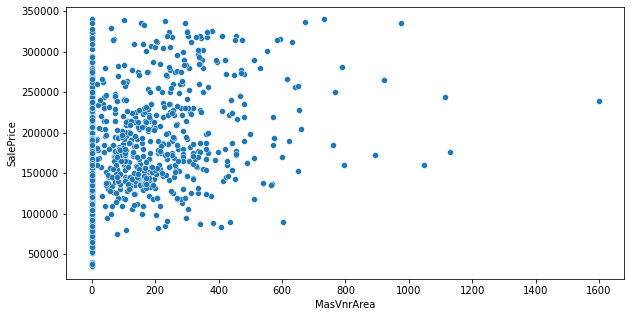

In [50]:
# MasVnrArea: Masonry veneer area in square feet
# raw_data['MasVnrArea'].corr(raw_data['SalePrice']) = 0.3505

#Fill missing value with median value
raw_data['MasVnrArea'] = raw_data['MasVnrArea'].fillna(0)

plt.figure(figsize=(10,5))
sns.scatterplot(x='MasVnrArea', y='SalePrice', data=raw_data)

[]

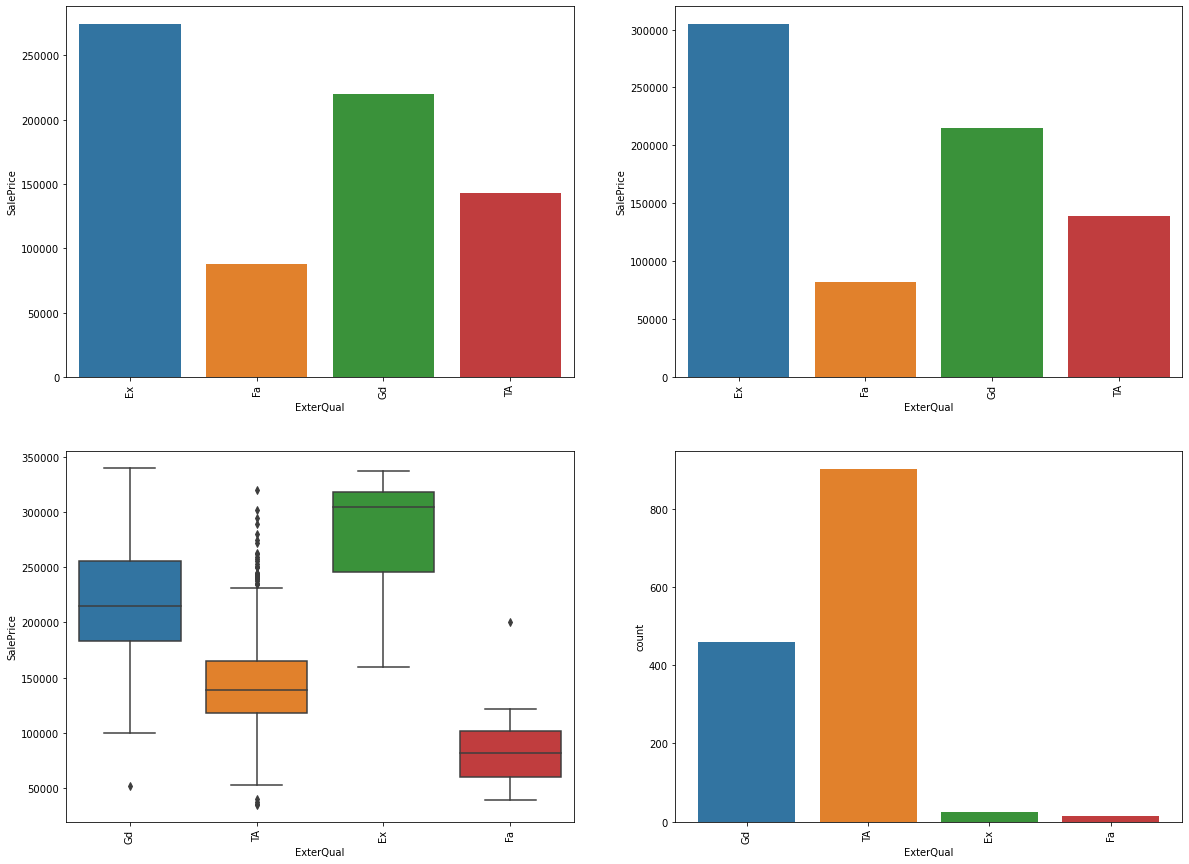

In [51]:
# ExterQual: Evaluates the quality of the material on the exterior

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('ExterQual')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('ExterQual')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='ExterQual', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['ExterQual'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['ExterQual'].value_counts()
#raw_data['ExterQual'].value_counts() / len(raw_data)
# ExterQual having maximun houses
    #1) TA=Average/Typical (902 = 64.47%)
    #2) Gd=Good (459 = 32.80%)
    #3) Ex=Excellent (24 = 1.71%)

# ExterQual with highest mean/median value
    #1) Ex=Excellent
    #2) Gd=Good
    
# Better the external quality of the house, higher the selling price

[]

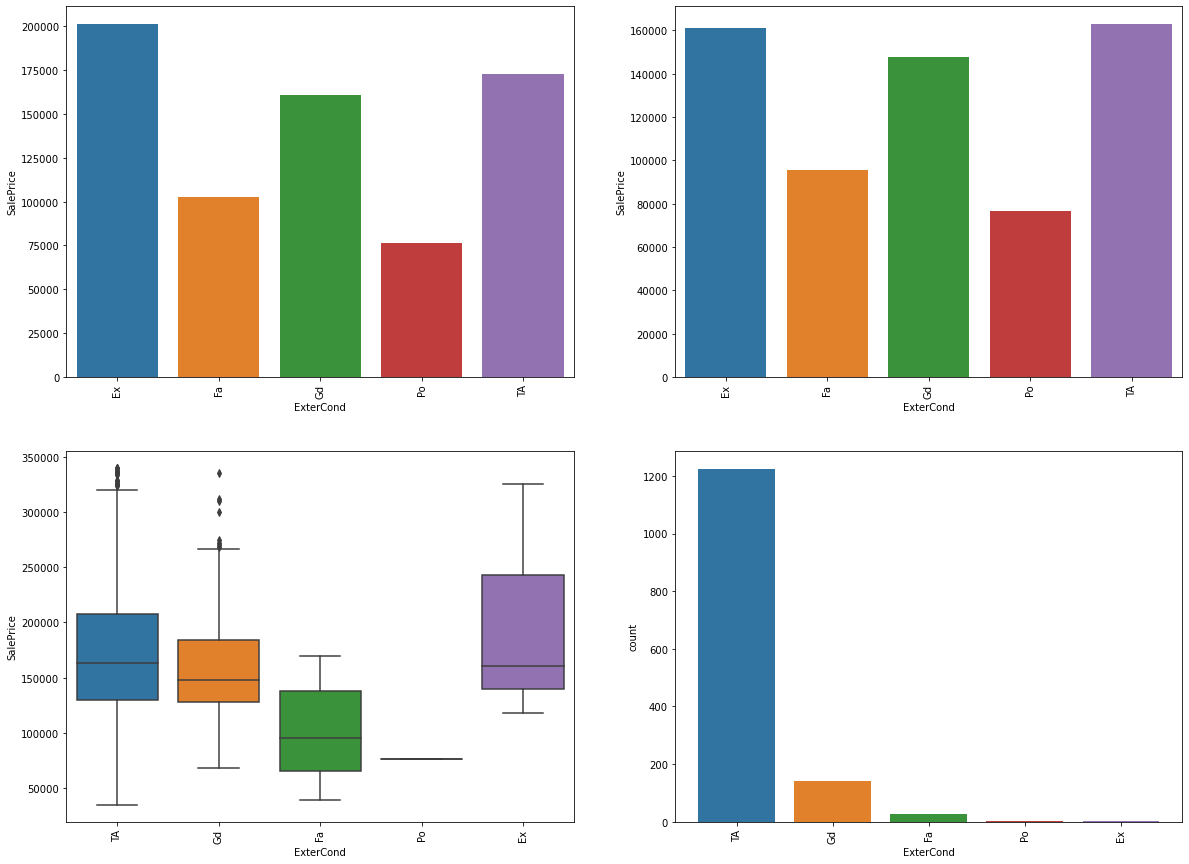

In [52]:
# ExterCond: Evaluates the present condition of the material on the exterior

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('ExterCond')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('ExterCond')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='ExterCond', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['ExterCond'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['ExterCond'].value_counts()
#raw_data['ExterCond'].value_counts() / len(raw_data)
# ExterCond having maximun houses
    #1) TA=Average/Typical (1225=87.56%)
    #2) Gd=Good (142 = 10.15%)
    #3) Fa=Fair (28 = 2%)

# ExterCond with highest mean/median value
    #1) Ex=Excellent
    #2) Gd=Good
    
# In general, better the external condition of the house, higher the selling price

[]

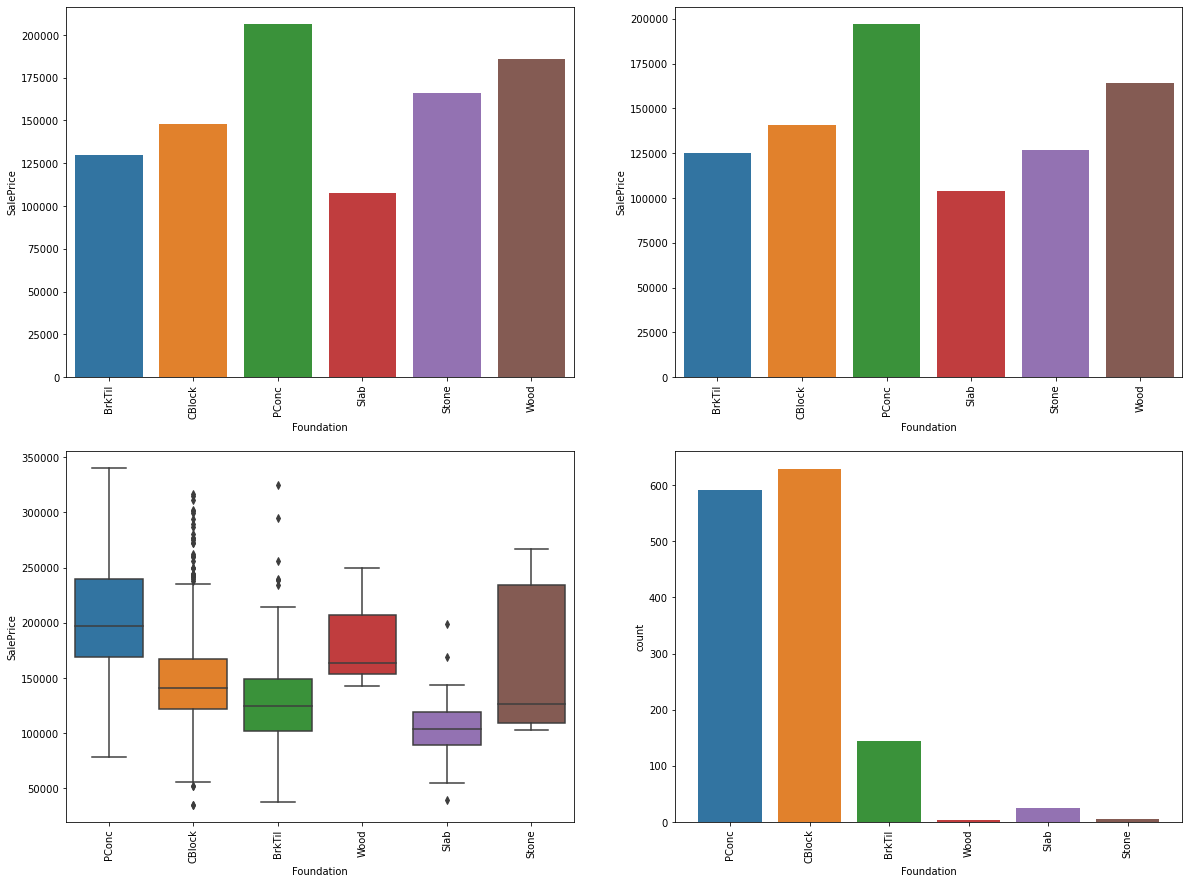

In [53]:
# Foundation: Type of foundation

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('Foundation')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('Foundation')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='Foundation', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['Foundation'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['Foundation'].value_counts()
#raw_data['Foundation'].value_counts() / len(raw_data)
# Foundation having maximun houses
    #1) CBlock=Cinder Block (629 = 44.96%)
    #2) PConc=Poured Contrete (592 = 42.31%)
    #3) BrkTil=Brick & Tile (145 = 10.36%)

# Foundation with highest mean/median value
    #1) PConc=Poured Contrete
    #2) Wood
    #3) Stone
    
# Houses with Foundation=Wood/Stone are less but their selling price is high

[]

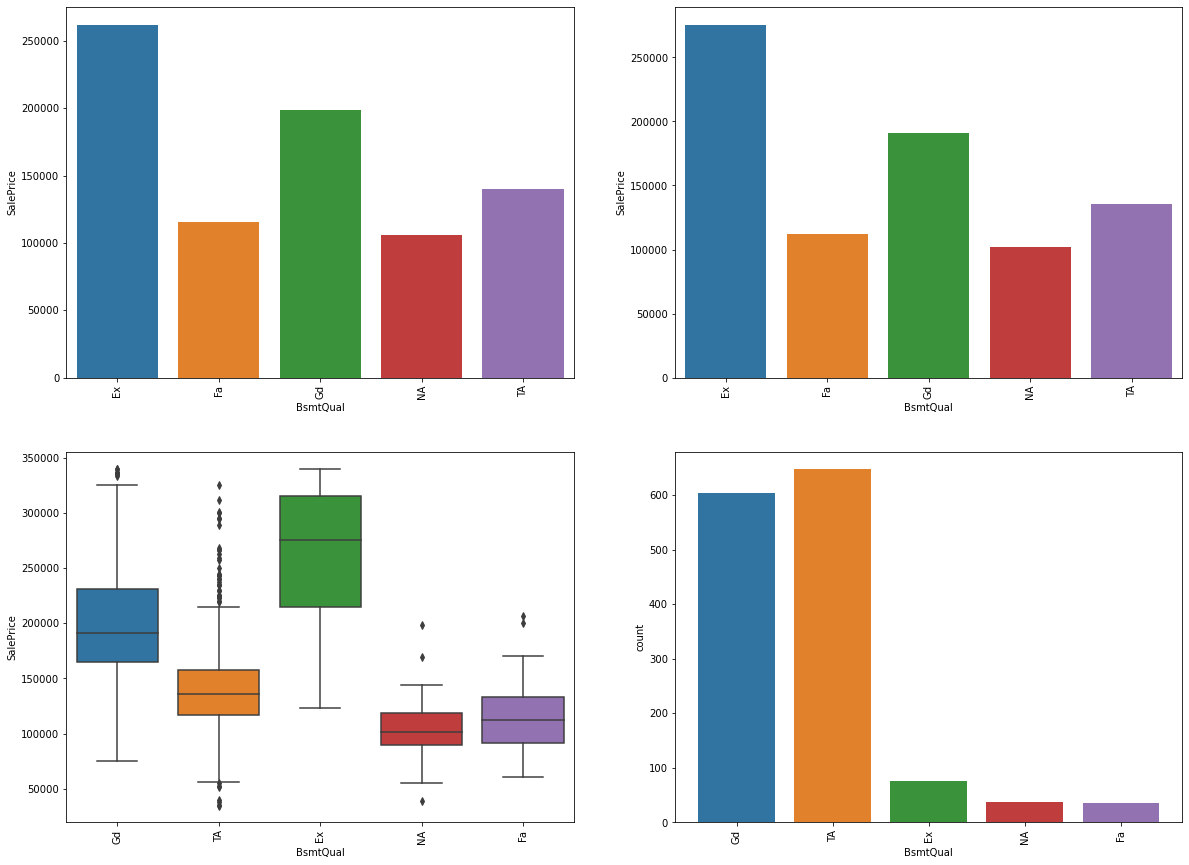

In [54]:
# BsmtQual: Evaluates the height of the basement

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('BsmtQual')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('BsmtQual')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='BsmtQual', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['BsmtQual'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['BsmtQual'].value_counts()
#raw_data['BsmtQual'].value_counts() / len(raw_data)
# BsmtQual having maximun houses
    #1) TA=Typical (647 = 46.24%)
    #2) Gd=Goodk (604 = 43.17%)
    #3) Ex=Excellent (76 = 5.43%)

# In general, more the height of the basement, more the selling price of house

[]

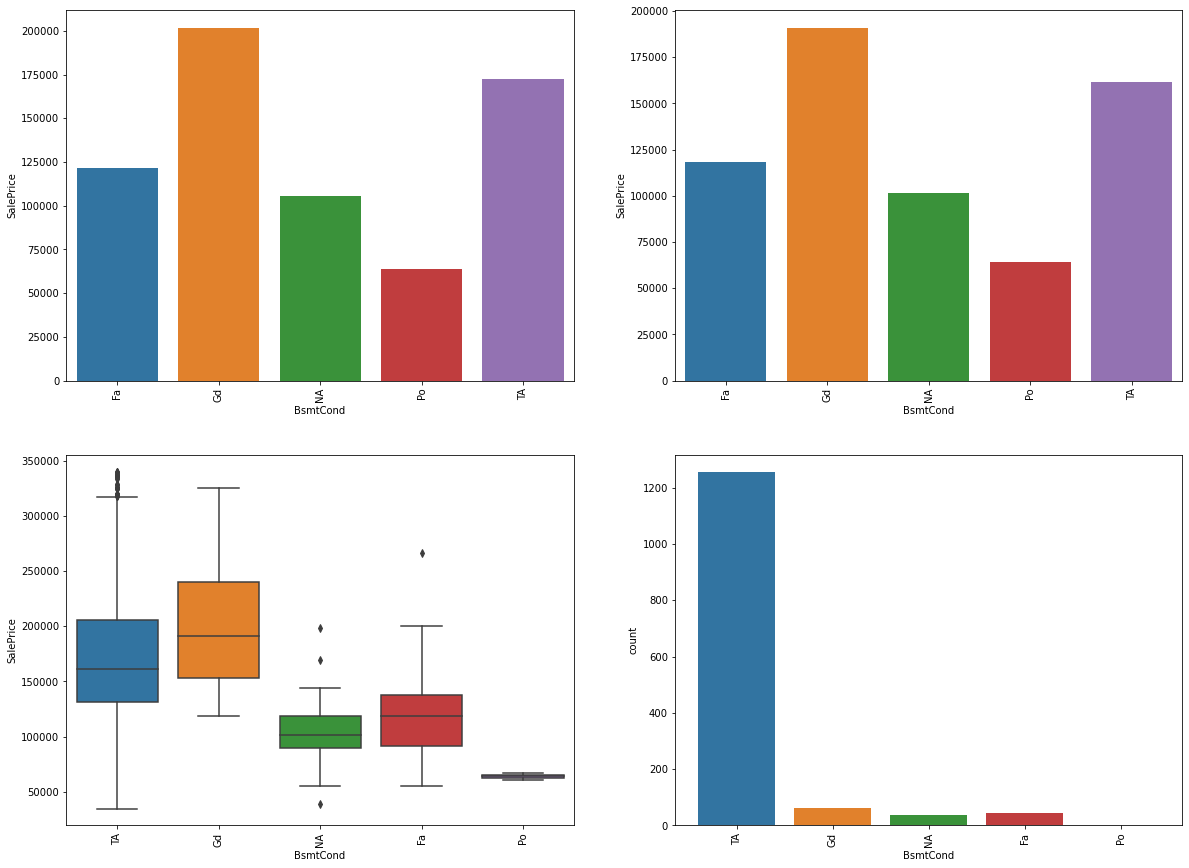

In [55]:
# BsmtCond: Evaluates the general condition of the basement

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('BsmtCond')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('BsmtCond')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='BsmtCond', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['BsmtCond'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['BsmtCond'].value_counts()
#raw_data['BsmtCond'].value_counts() / len(raw_data)
# BsmtCond having maximun houses
    #1) TA=Typical (1254 = 89.63%)
    #2) Gd=Goodk (61 = 4.36%)
    #3) Fa=Fair (45 = 3.21%)

# In general, better the condition of the basement, more the selling price of house

[]

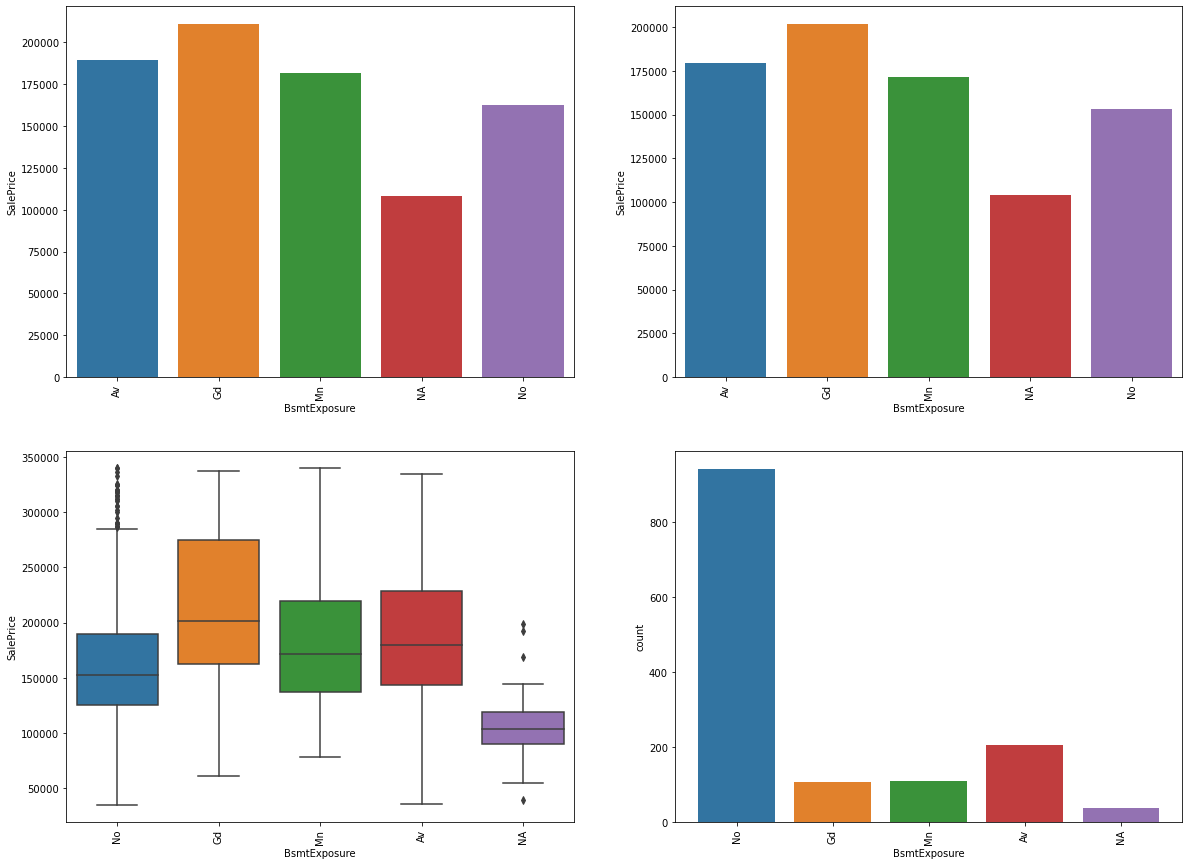

In [56]:
# BsmtExposure: Refers to walkout or garden level walls

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('BsmtExposure')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('BsmtExposure')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='BsmtExposure', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['BsmtExposure'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['BsmtExposure'].value_counts()
#raw_data['BsmtExposure'].value_counts() / len(raw_data)
# BsmtExposure having maximun houses
    #1) No=No Exposure (941 = 67.26%)
    #2) Av=Average Exposure  (221 = 15.13%)
    #3) Gd=Good Exposure (134 = 9.2%)

# BsmtExposure with highest mean/median value
    #1) Gd=Good Exposure
    #2) Av=Average Exposure
    #3) Mimimum Exposure
    
# More the exposure of the basement, more the selling price of house

[]

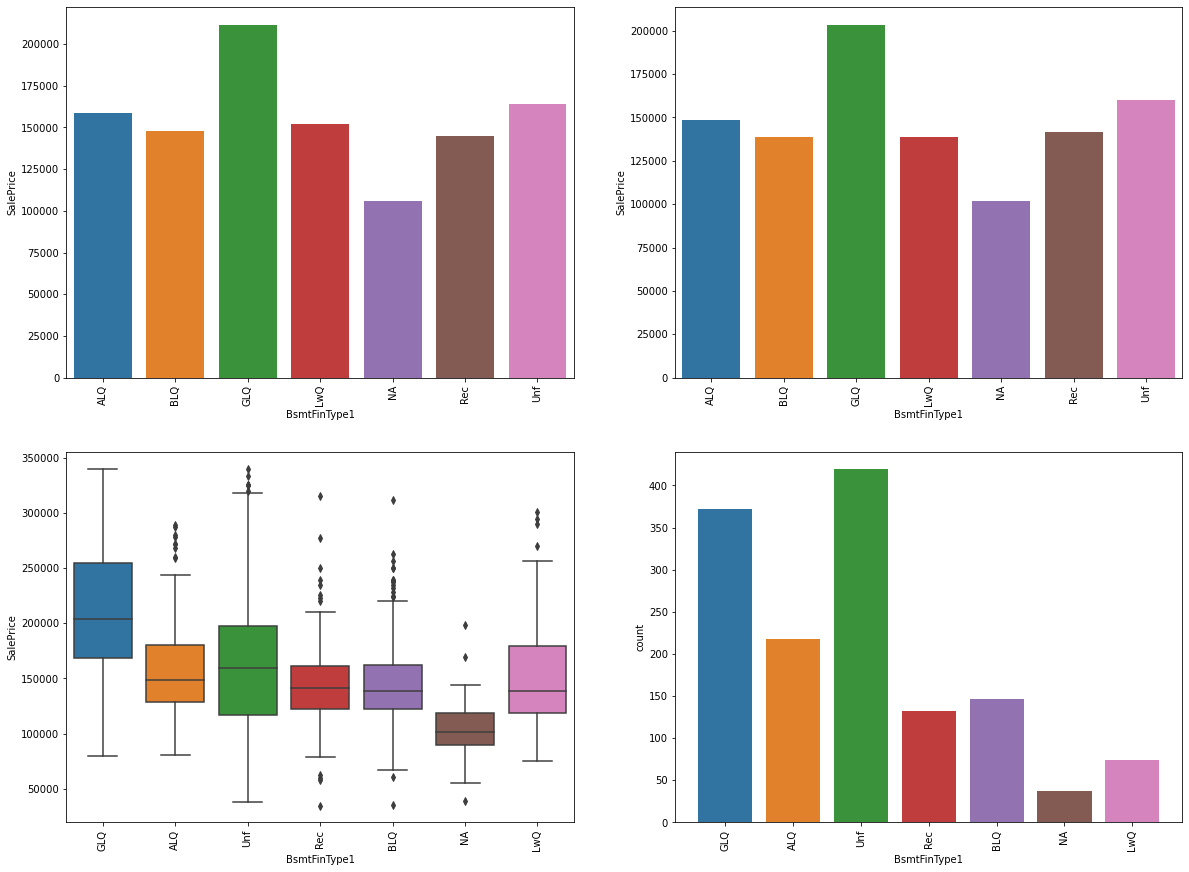

In [57]:
# BsmtFinType1: Rating of basement finished area

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('BsmtFinType1')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('BsmtFinType1')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='BsmtFinType1', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['BsmtFinType1'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['BsmtFinType1'].value_counts()
#raw_data['BsmtFinType1'].value_counts() / len(raw_data)
# BsmtFinType1 having maximun houses
    #1) Unf=Unfinshed (419 = 29.95%)
    #2) GLQ=Good Living Quarters (372 = 26.59%)
    #3) ALQ=Average Living Quarters (218 = 15.58%)

# BsmtFinType1 with highest mean/median value
    #1) GLQ=Good Living Quarters
    #2) ALQ=Average Living Quarters
    
# Better the finishing of the basement, more the selling price of the house

[]

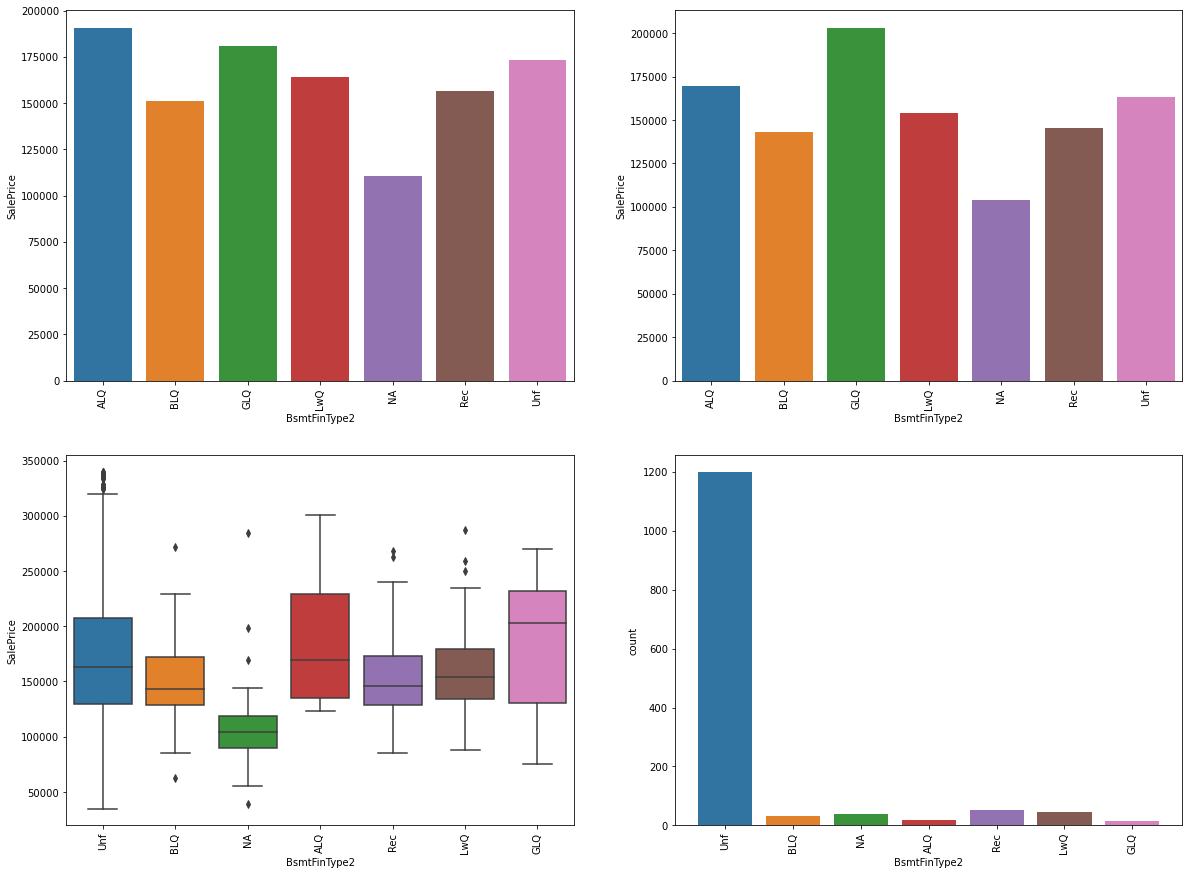

In [58]:
# BsmtFinType2: Rating of basement finished area (if multiple types)

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('BsmtFinType2')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('BsmtFinType2')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='BsmtFinType2', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['BsmtFinType2'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['BsmtFinType2'].value_counts()
#raw_data['BsmtFinType2'].value_counts() / len(raw_data)
# BsmtFinType2 having maximun houses
    #1) Unf=Unfinshed (1198 = 85.63%)
    #2) Rec=Average Rec Room  (52 = 3.71%)
    #3) LwQ=Low Quality (46 = 3.28%)

# BsmtFinType2 with highest mean/median value
    #1) GLQ=Good Living Quarters
    #2) ALQ=Average Living Quarters
    
# Better the finishing of the basement, more the selling price of the house

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

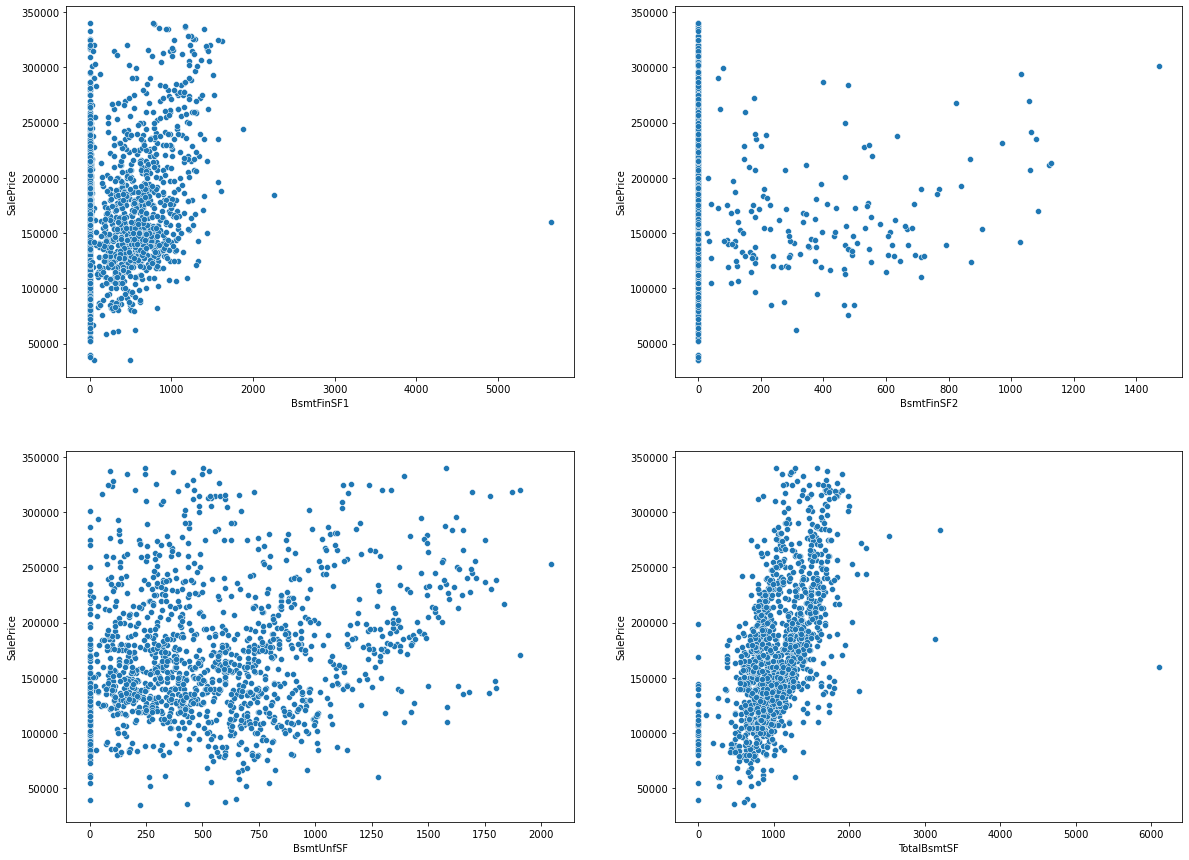

In [59]:
fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

# BsmtFinSF1: Type 2 finished square feet
# raw_data['BsmtFinSF1'].corr(raw_data['SalePrice']) = 0.29037
sns.scatterplot(ax=axes[0,0], x='BsmtFinSF1', y='SalePrice', data=raw_data)

# BsmtFinSF2: Type 2 finished square feet
# raw_data['BsmtFinSF2'].corr(raw_data['SalePrice']) = 0.00715
sns.scatterplot(ax=axes[0,1], x='BsmtFinSF2', y='SalePrice', data=raw_data)

# BsmtUnfSF: Unfinished square feet of basement area
# raw_data['BsmtUnfSF'].corr(raw_data['SalePrice']) = 0.22279
sns.scatterplot(ax=axes[1,0], x='BsmtUnfSF', y='SalePrice', data=raw_data)

# TotalBsmtSF: Total square feet of basement area
# raw_data['TotalBsmtSF'].corr(raw_data['SalePrice']) = 0.5435
sns.scatterplot(ax=axes[1,1], x='TotalBsmtSF', y='SalePrice', data=raw_data)

[]

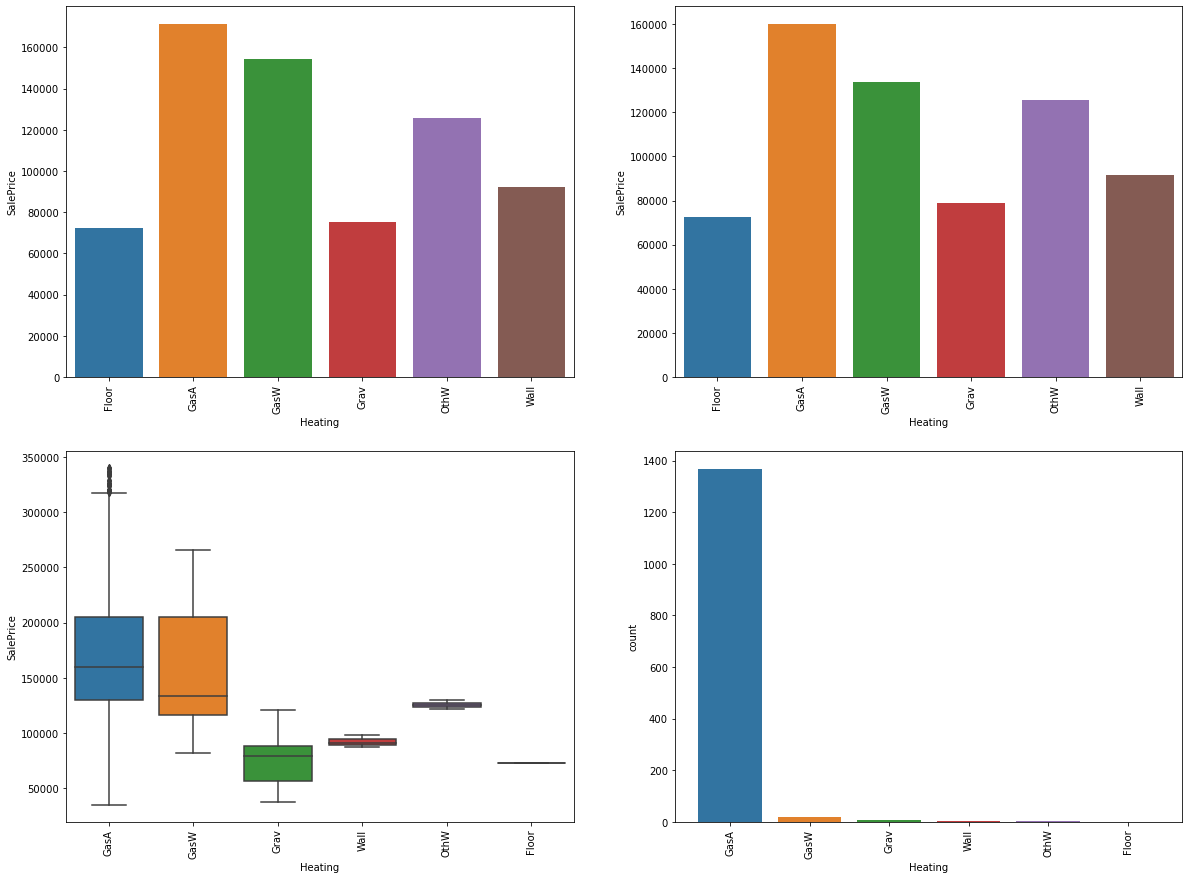

In [60]:
# Heating: Type of heating

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('Heating')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('Heating')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='Heating', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['Heating'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['Heating'].value_counts()
#raw_data['Heating'].value_counts() / len(raw_data)
# Heating having maximun houses
    #1) GasA=Gas forced warm air furnace (1368 = 97.78%)
    #2) GasW=Gas hot water or steam heat  (17 = 1.21%)
    #3) Grav=Gravity furnace (7)

# Heating with highest mean/median value
    #1) GasA
    #2) GasW
    
# Mean/Median price for Heating=GasA/GasW slightly higher than other types

[]

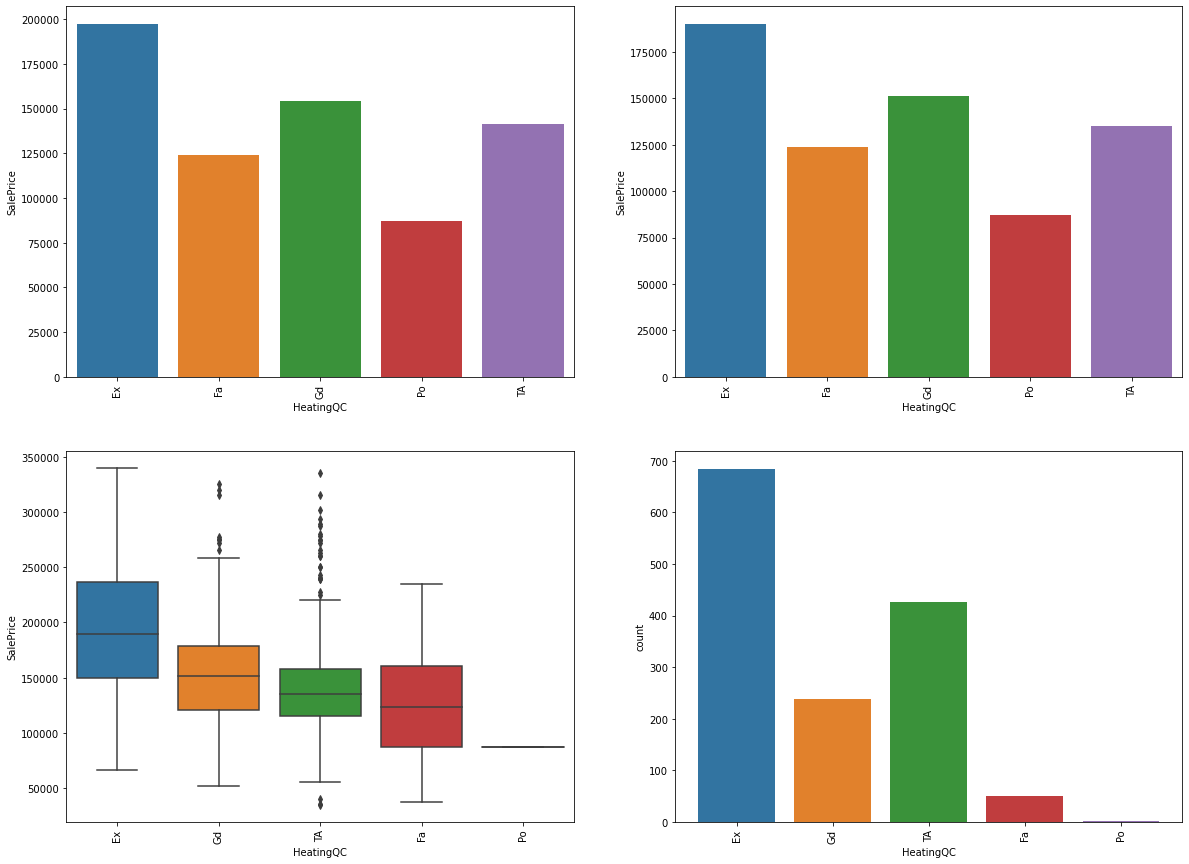

In [61]:
# HeatingQC: Heating quality and condition

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('HeatingQC')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('HeatingQC')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='HeatingQC', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['HeatingQC'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['HeatingQC'].value_counts()
#raw_data['HeatingQC'].value_counts() / len(raw_data)
# HeatingQC having maximun houses
    #1) Ex=Excellent (685 = 48.96%)
    #2) TA=Average/Typical  (426 = 30.45%)
    #3) Gd=Good (238 = 17.01%)
    
# Better the heating quality and condition, more the house selling price

[]

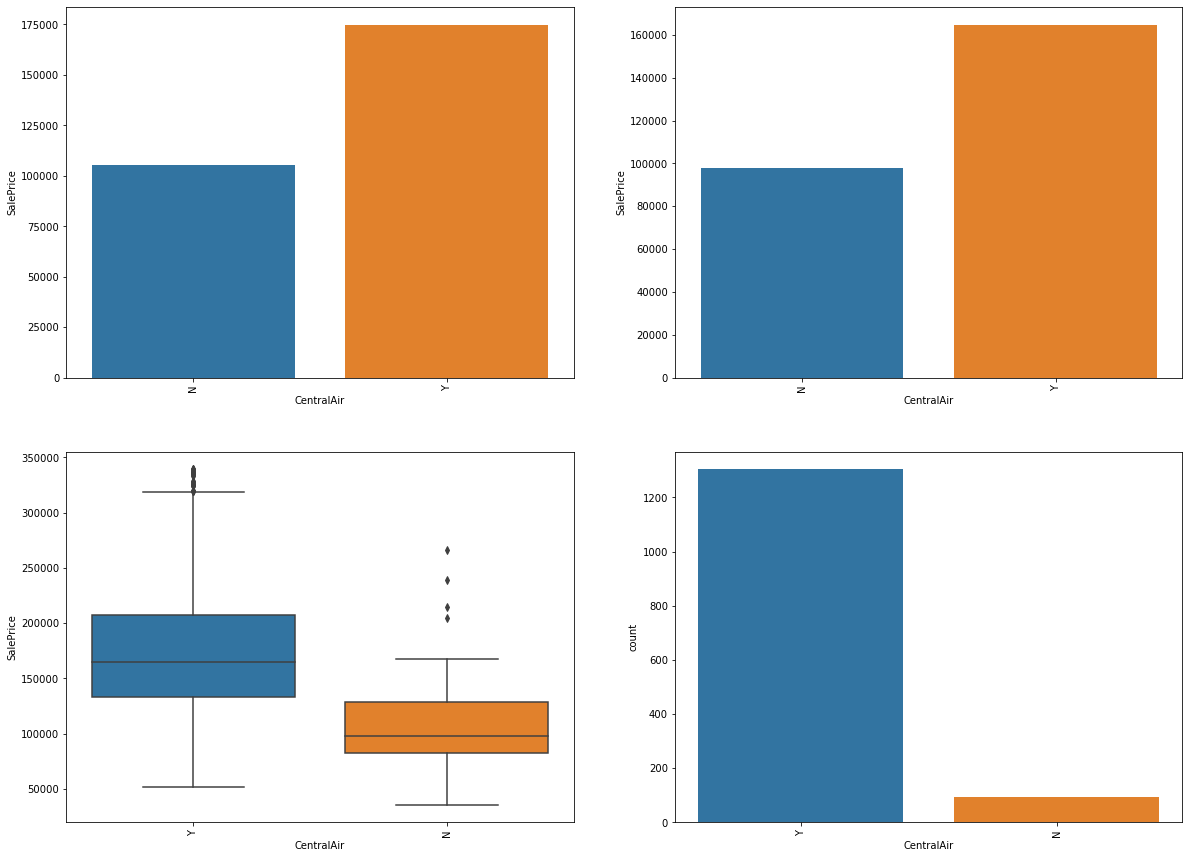

In [62]:
# CentralAir: Central air conditioning

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('CentralAir')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('CentralAir')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='CentralAir', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['CentralAir'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['CentralAir'].value_counts()
#raw_data['CentralAir'].value_counts() / len(raw_data)
# CentralAir having maximun houses
    #1) Y=Yes (1304 = 93.20%)
    #2) N=No  (95 = 6.79%)
    
# Mean/Median price of housing with Central air conditioning is higher than without Central AC

[]

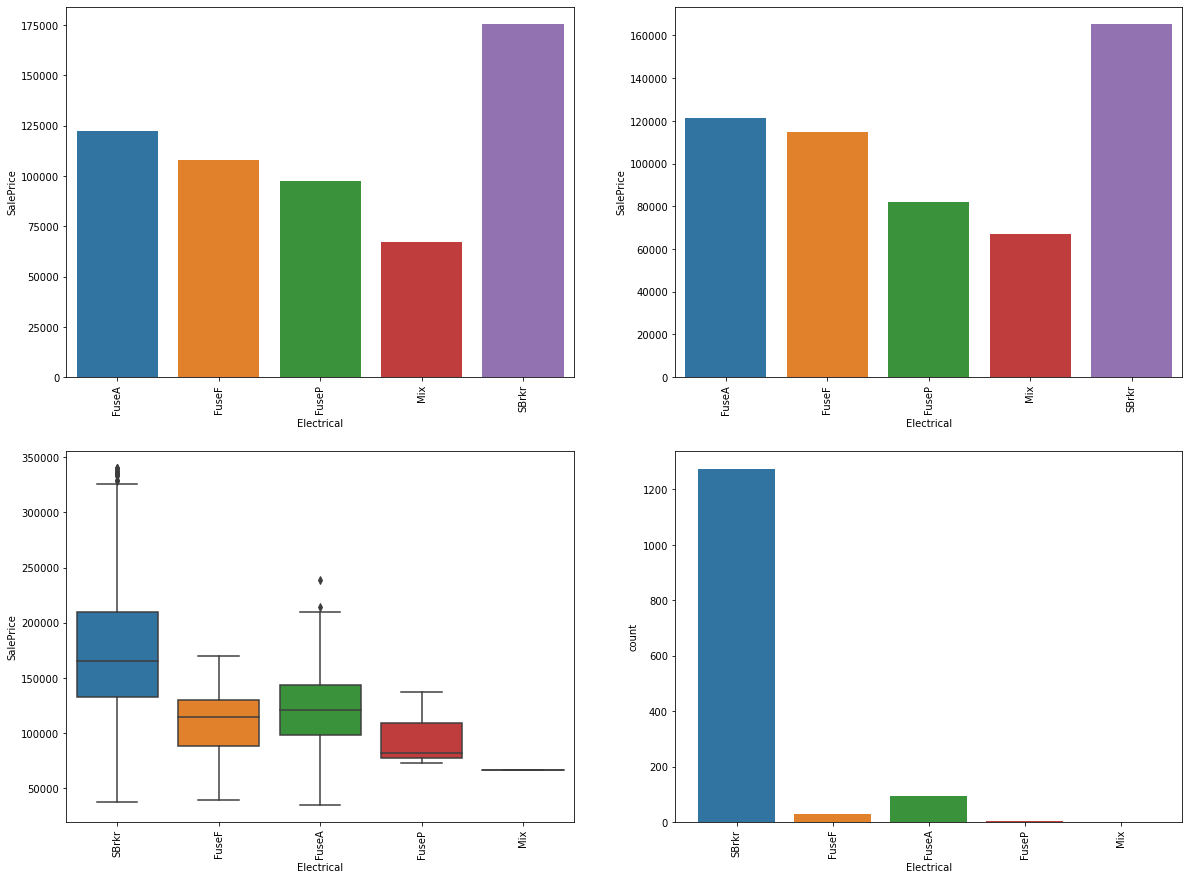

In [63]:
# Electrical: Electrical system

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('Electrical')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('Electrical')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='Electrical', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['Electrical'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['Electrical'].value_counts()
#raw_data['Electrical'].value_counts() / len(raw_data)
# Electrical having maximun houses
    #1) SBrkr=Standard Circuit Breakers & Romex (1274 = 91.06%)
    #2) FuseA=Fuse Box over 60 AMP and all Romex wiring (Average)  (94 = 6.7%)
    #3) FuseF=60 AMP Fuse Box and mostly Romex wiring (Fair) (27 = 1.92%)

# Better the type of Electrical system, more the house selling price

In [64]:
raw_data['GrLivArea'].corr(raw_data['SalePrice'])

0.6613245737771352

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

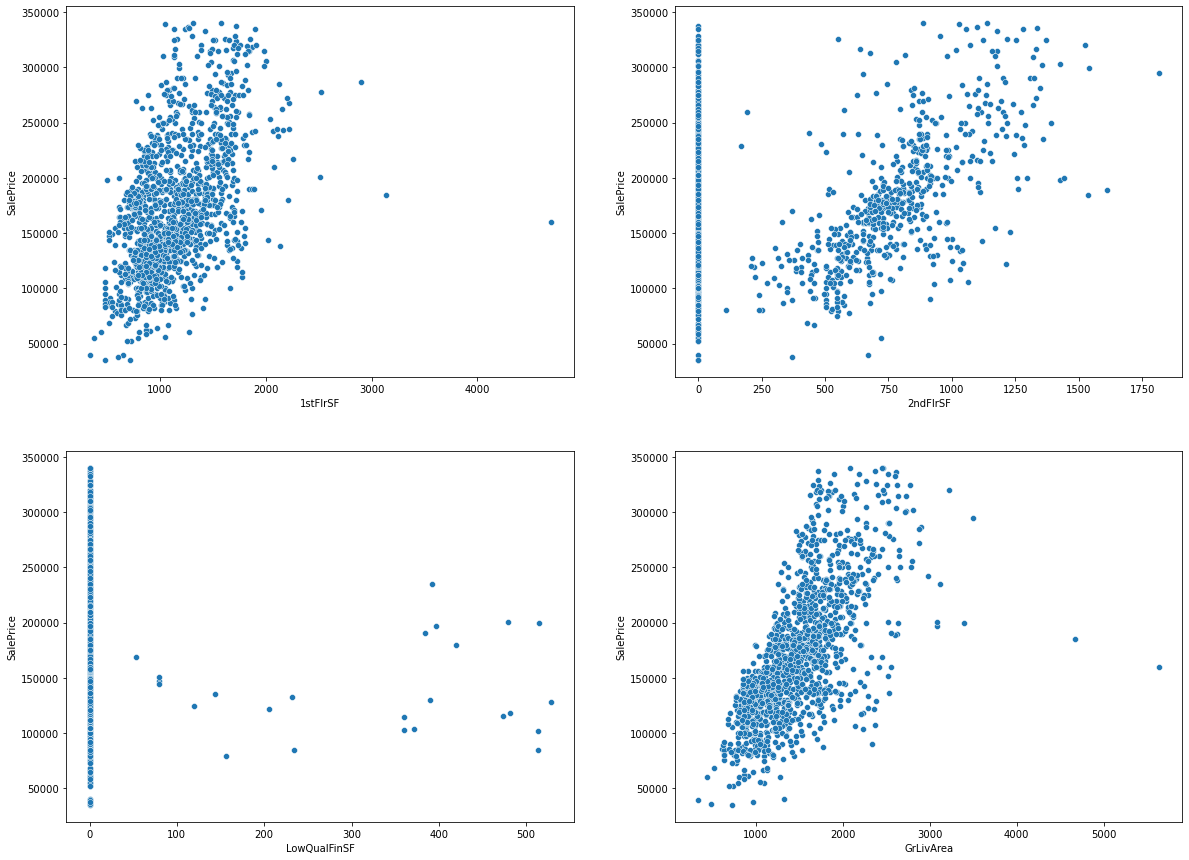

In [65]:
fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

# 1stFlrSF: First Floor square feet
# raw_data['1stFlrSF'].corr(raw_data['SalePrice']) = 0.52278
sns.scatterplot(ax=axes[0,0], x='1stFlrSF', y='SalePrice', data=raw_data)

# 2ndFlrSF: Second floor square feet
# raw_data['2ndFlrSF'].corr(raw_data['SalePrice']) = 0.3173
sns.scatterplot(ax=axes[0,1], x='2ndFlrSF', y='SalePrice', data=raw_data)

# LowQualFinSF: Low quality finished square feet (all floors)
# raw_data['LowQualFinSF'].corr(raw_data['SalePrice']) = -0.05808
sns.scatterplot(ax=axes[1,0], x='LowQualFinSF', y='SalePrice', data=raw_data)

# GrLivArea: Above grade (ground) living area square feet
# raw_data['GrLivArea'].corr(raw_data['SalePrice']) = 0.6613
sns.scatterplot(ax=axes[1,1], x='GrLivArea', y='SalePrice', data=raw_data)

[]

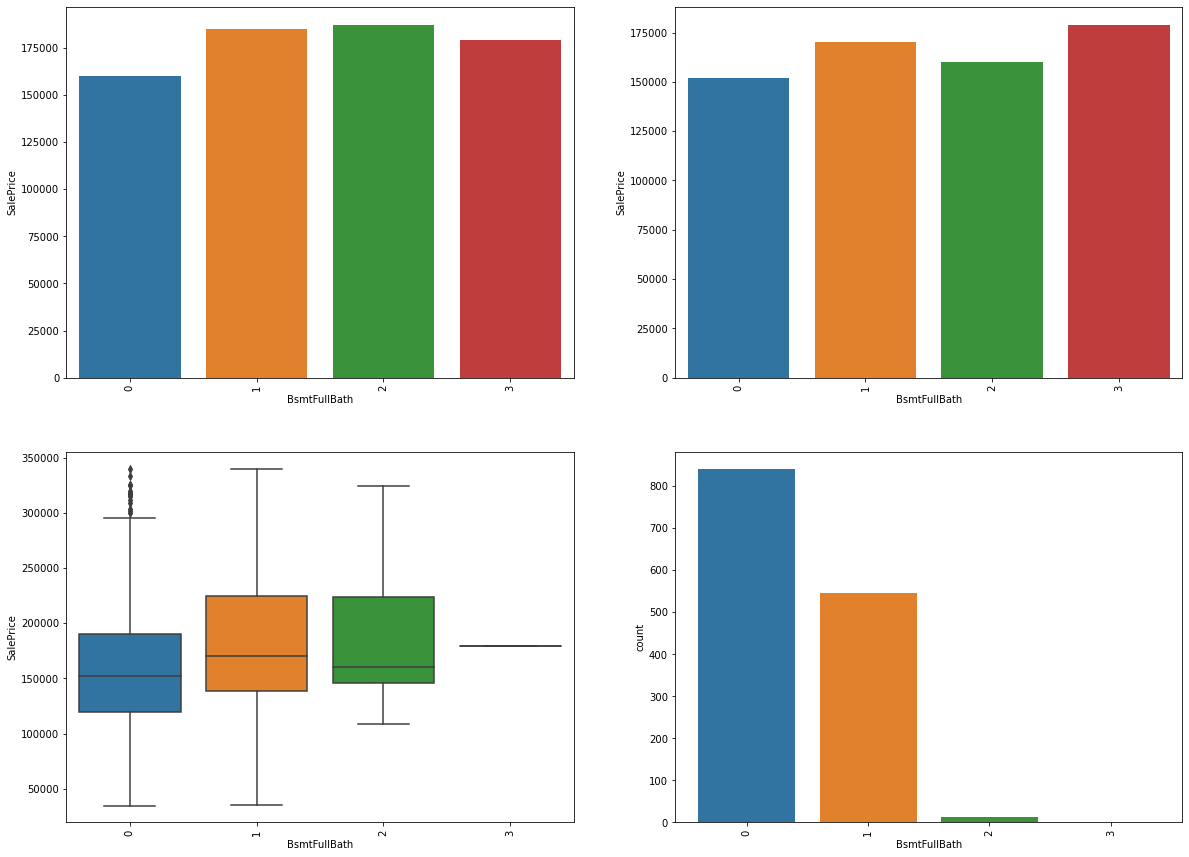

In [66]:
# BsmtFullBath: Basement full bathrooms

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('BsmtFullBath')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('BsmtFullBath')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='BsmtFullBath', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['BsmtFullBath'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['BsmtFullBath'].value_counts()
#raw_data['BsmtFullBath'].value_counts() / len(raw_data)
# BsmtFullBath having maximun houses
    #1) 0 (840 = 60%)
    #2) 1  (545 = 38.95%)

# More the number of basement bathrooms more the selling price. Only 1 house have 3 basement bathrooms.

[]

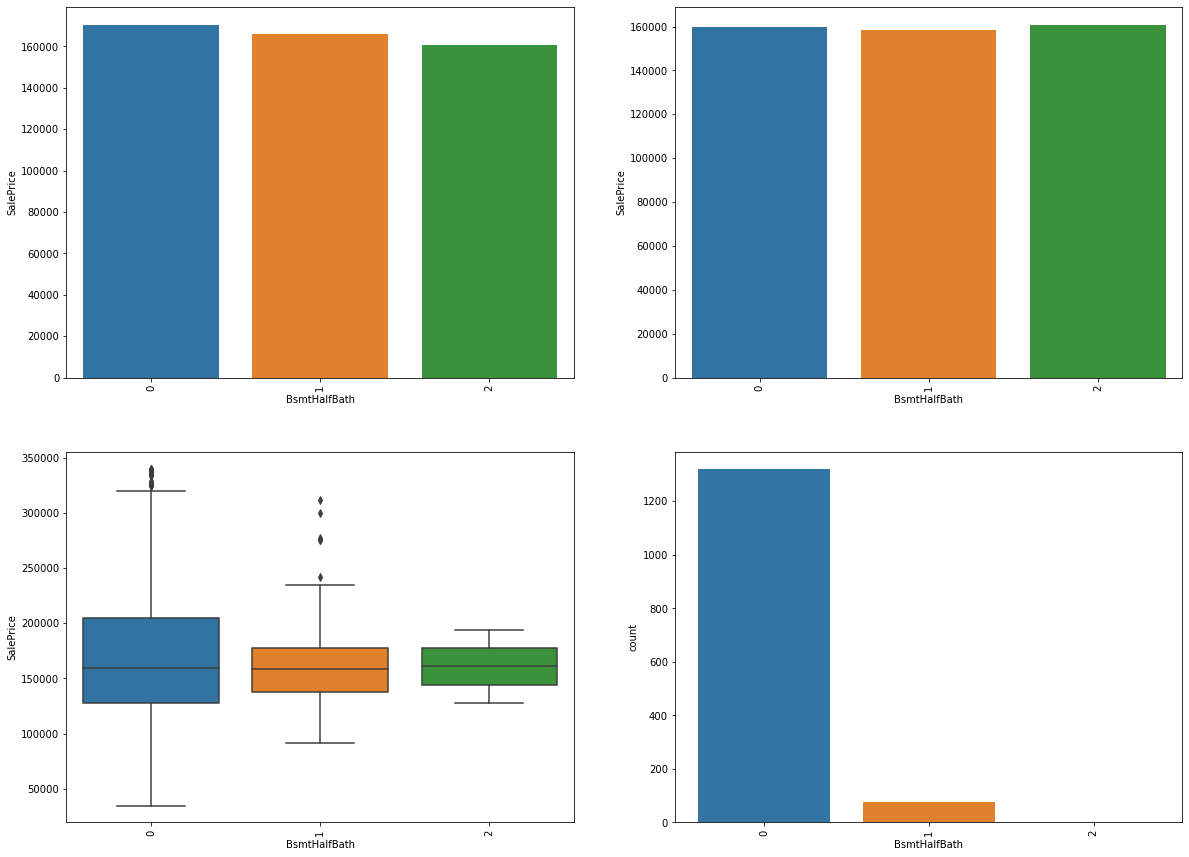

In [67]:
# BsmtHalfBath: Basement half bathrooms

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('BsmtHalfBath')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('BsmtHalfBath')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='BsmtHalfBath', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['BsmtHalfBath'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['BsmtHalfBath'].value_counts()
#raw_data['BsmtHalfBath'].value_counts() / len(raw_data)
# BsmtHalfBath having maximun houses
    #1) 0 (1319 = 94.28%)
    #2) 1  (78 = 5.57%)

# Does not seems to be any relationship between BsmtHalfBath and selling price

[]

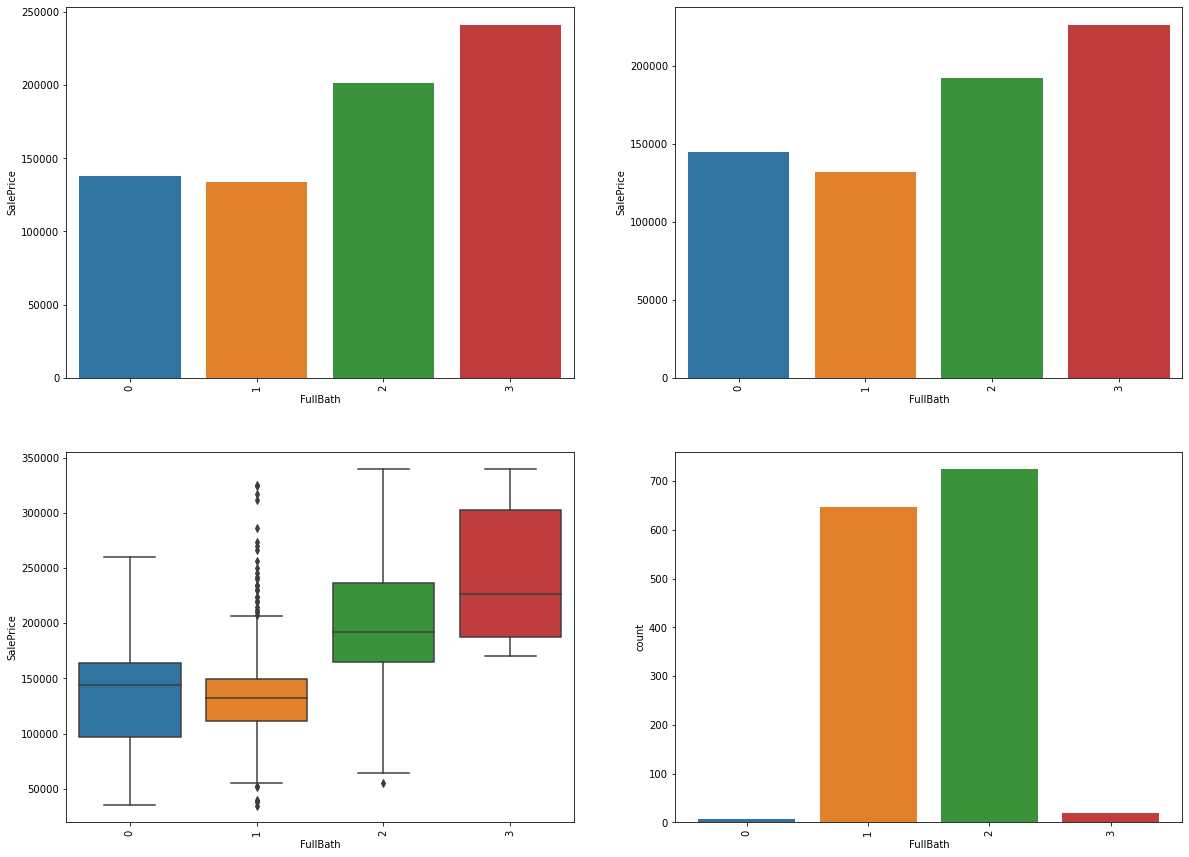

In [68]:
# FullBath: Full bathrooms above grade

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('FullBath')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('FullBath')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='FullBath', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['FullBath'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['FullBath'].value_counts()
#raw_data['FullBath'].value_counts() / len(raw_data)
# FullBath having maximun houses
    #1) 2 (724 = 51.75%)
    #2) 1  (47 = 46.24%)
    #3) 3  (20 = 1.42%)

# In general, as the number of full bathrooms increases, selling price increases

[]

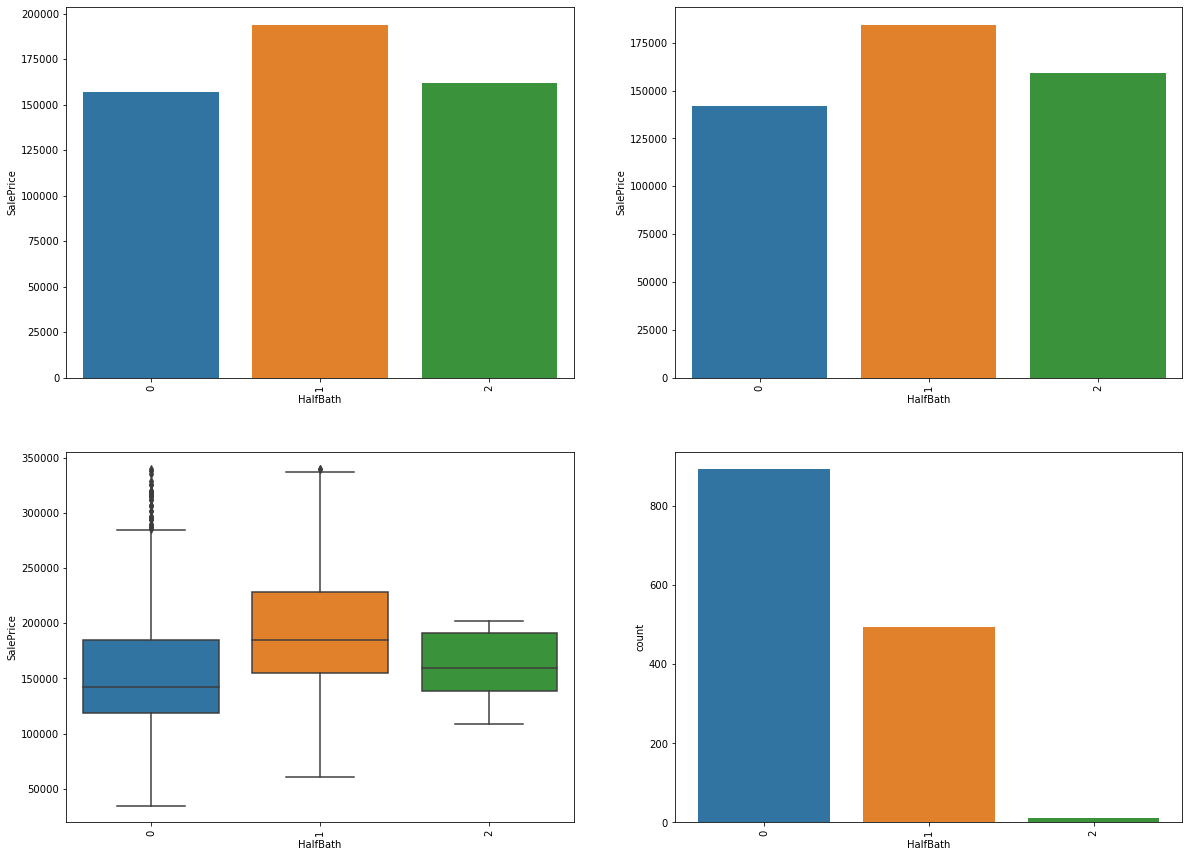

In [69]:
# HalfBath: Half baths above grade

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('HalfBath')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('HalfBath')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='HalfBath', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['HalfBath'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['HalfBath'].value_counts()
#raw_data['HalfBath'].value_counts() / len(raw_data)
# HalfBath having maximun houses
    #1) 0 (893 = 63.83%)
    #2) 1  (494 = 35.31%)
    #3) 2  (12)

# In general, as the number of half bathrooms increases, selling price increases, but not concrete relationship

[]

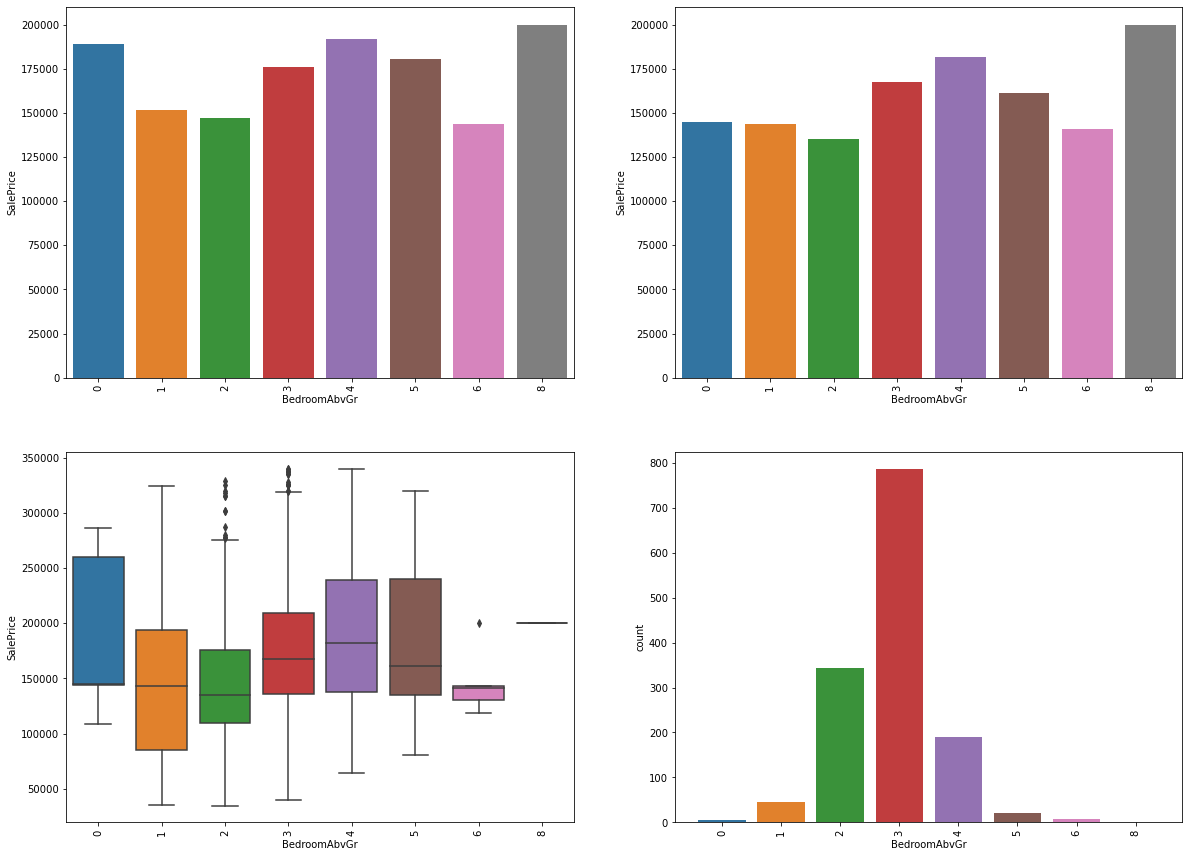

In [70]:
# BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('BedroomAbvGr')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('BedroomAbvGr')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='BedroomAbvGr', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['BedroomAbvGr'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['BedroomAbvGr'].value_counts()
#raw_data['BedroomAbvGr'].value_counts() / len(raw_data)
# BedroomAbvGr having maximun houses
    #1) 3 (785 = 56.11%)
    #2) 2  (344 = 24.58%)
    #3) 4  (190 = 13.58%)
    #4) 1  (46 = 3.28%)

# Initially from 1 to 4 as number of bedrooms increases, selling price increases but afterwards not constant relationship

[]

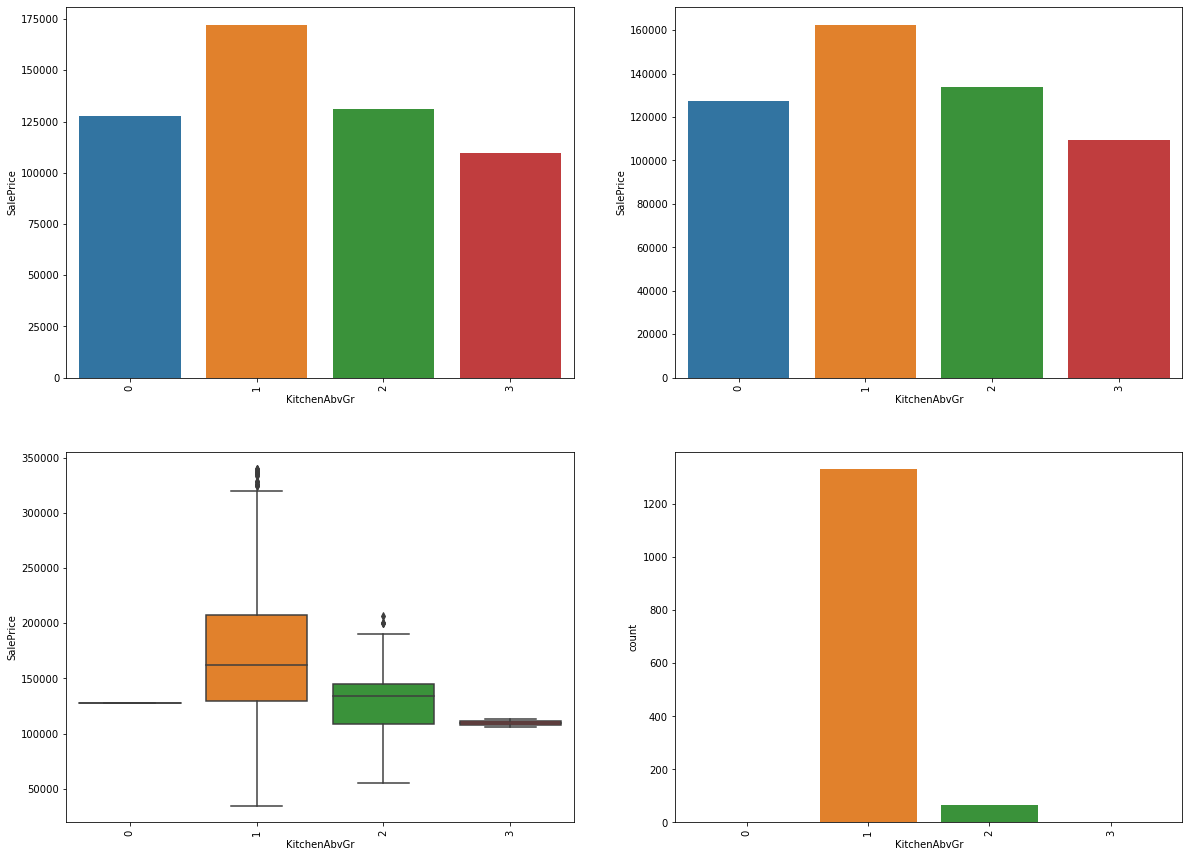

In [71]:
# KitchenAbvGr: Kitchens above grade

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('KitchenAbvGr')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('KitchenAbvGr')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='KitchenAbvGr', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['KitchenAbvGr'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['KitchenAbvGr'].value_counts()
#raw_data['KitchenAbvGr'].value_counts() / len(raw_data)
# KitchenAbvGr having maximun houses
    #1) 1 (1331 = 95.13%)
    #2) 2  (65 = 4.64%)

# As number of kitchen increases, selling price of the house decreases 

[]

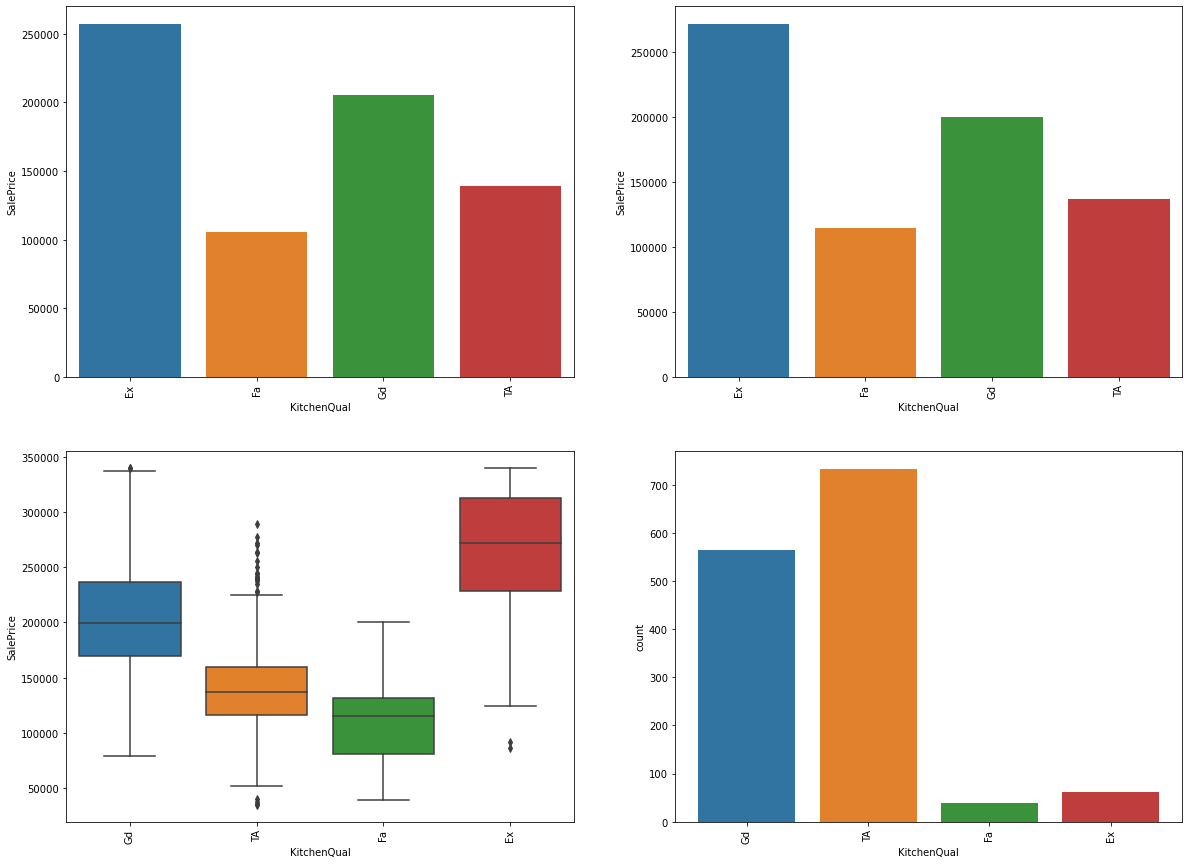

In [72]:
# KitchenQual: Kitchen quality

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('KitchenQual')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('KitchenQual')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='KitchenQual', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['KitchenQual'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['KitchenQual'].value_counts()
#raw_data['KitchenQual'].value_counts() / len(raw_data)
# KitchenQual having maximun houses
    #1) TA=Typical/Average (733 = 52.39%)
    #2) Gd=Good  (565 = 40.38%)
    #3) Ex=Excellent (62 = 4.43%)
    
# Better the quality of kitchen, higher the house selling price

[]

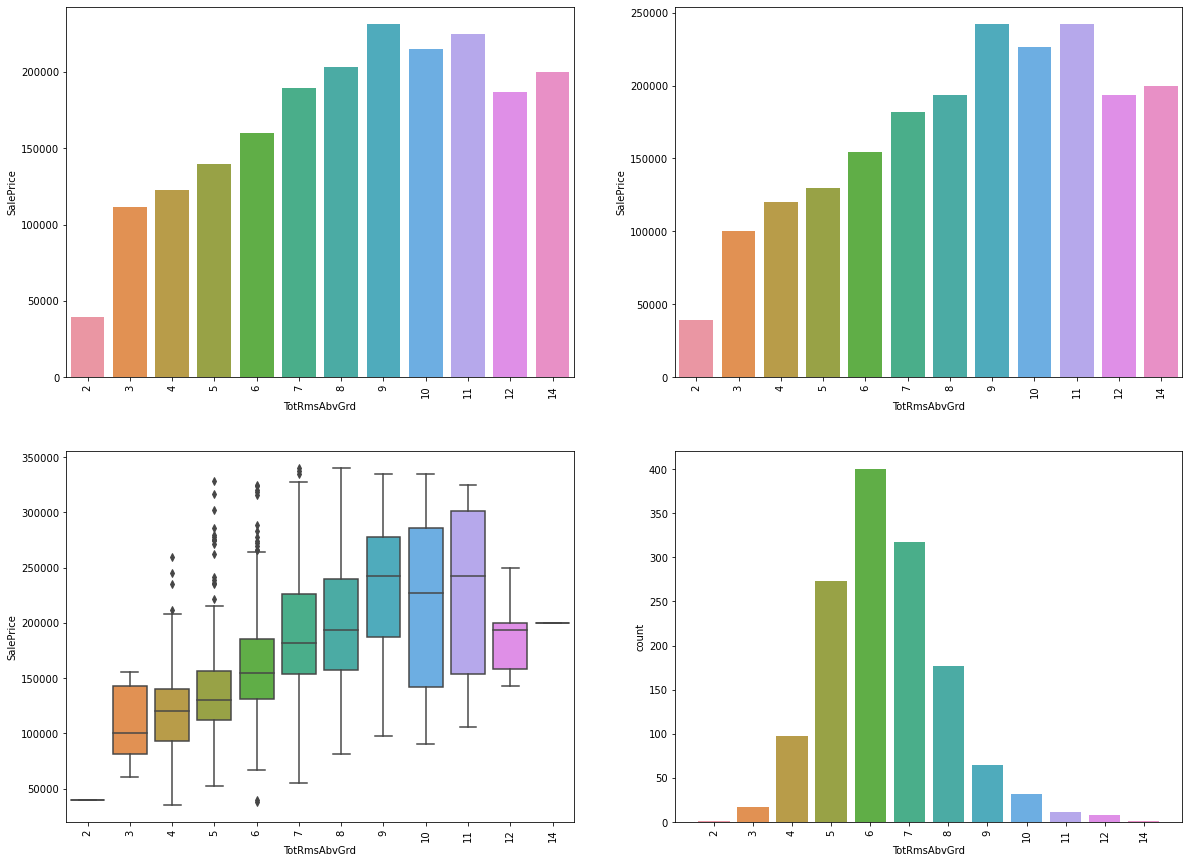

In [73]:
# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('TotRmsAbvGrd')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('TotRmsAbvGrd')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='TotRmsAbvGrd', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['TotRmsAbvGrd'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['TotRmsAbvGrd'].value_counts()
#raw_data['TotRmsAbvGrd'].value_counts() / len(raw_data)
# TotRmsAbvGrd having maximun houses
    #1) 6 (400 = 28.59%)
    #2) 7 (317 = 22.65%)
    #3) 5 (273 = 19.51%)

# As number of total rooms increases mean/median selling price of house increases
# But surprisingly for 12 and 14 price is less

[]

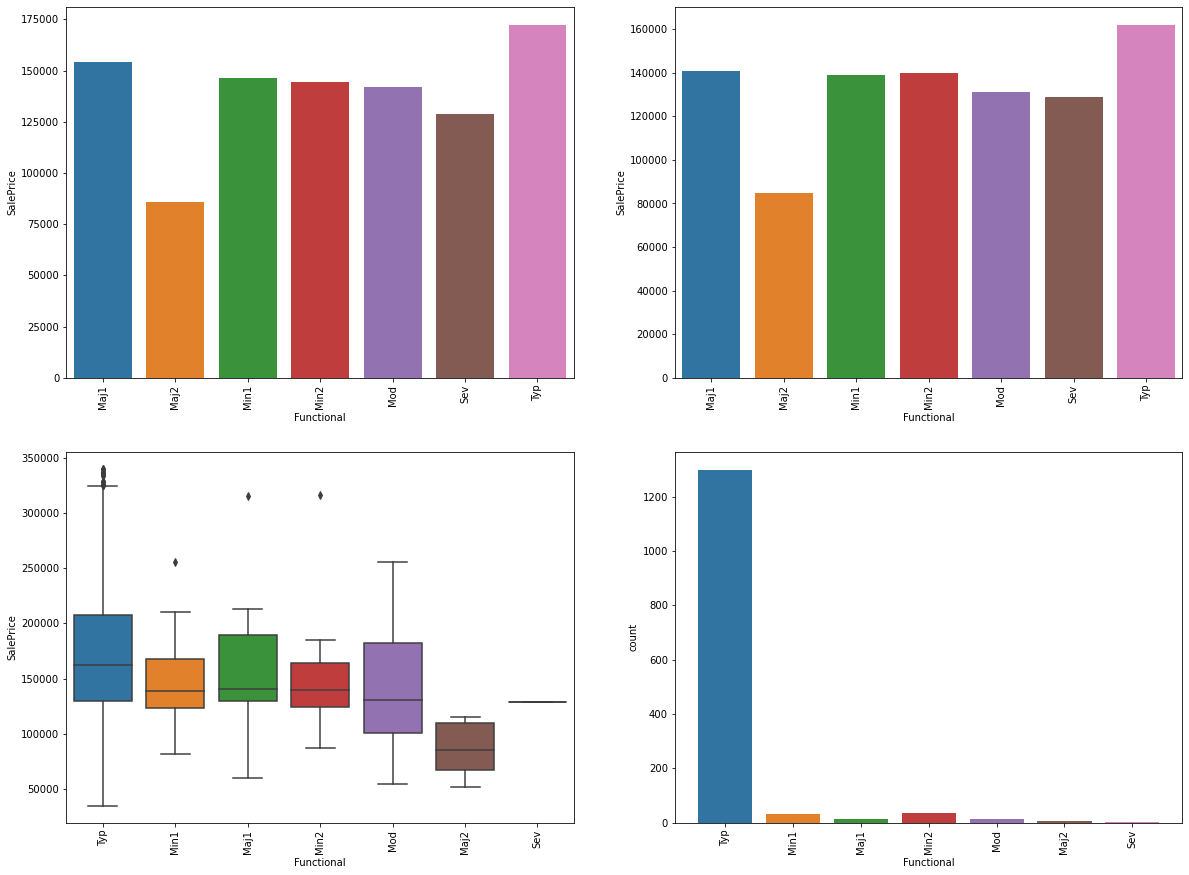

In [74]:
# Functional: Home functionality (Assume typical unless deductions are warranted)

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('Functional')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('Functional')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='Functional', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['Functional'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['Functional'].value_counts()
#raw_data['Functional'].value_counts() / len(raw_data)
# Functional having maximun houses
    #1) Typ=Typical Functionality (1300 = 92.92%)
    #2) Min2=Minor Deductions 2 (34 = 2.43%)
    #3) Min1=Minor Deductions 1 (31 = 2.21%)

# Does not seems to be considerable relationship

[]

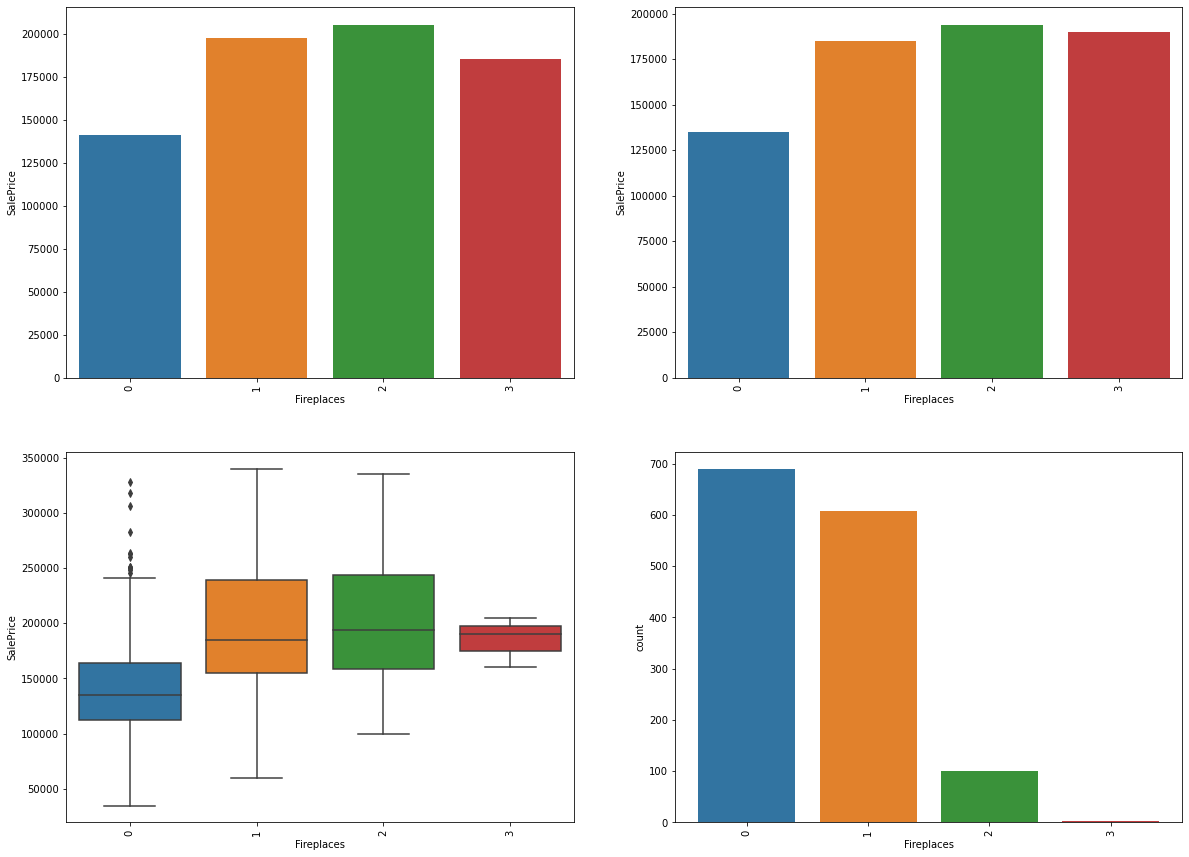

In [75]:
# Fireplaces: Number of fireplaces

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('Fireplaces')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('Fireplaces')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='Fireplaces', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['Fireplaces'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['Fireplaces'].value_counts()
#raw_data['Fireplaces'].value_counts() / len(raw_data)
# Fireplaces having maximun houses
    #1) 0 (689 = 49.24%)
    #2) 1 (607 = 43.38%)
    #3) 2 (100 = 7.15%)

# As the number of fireplaces increases, mean/median selling price of house increases

[]

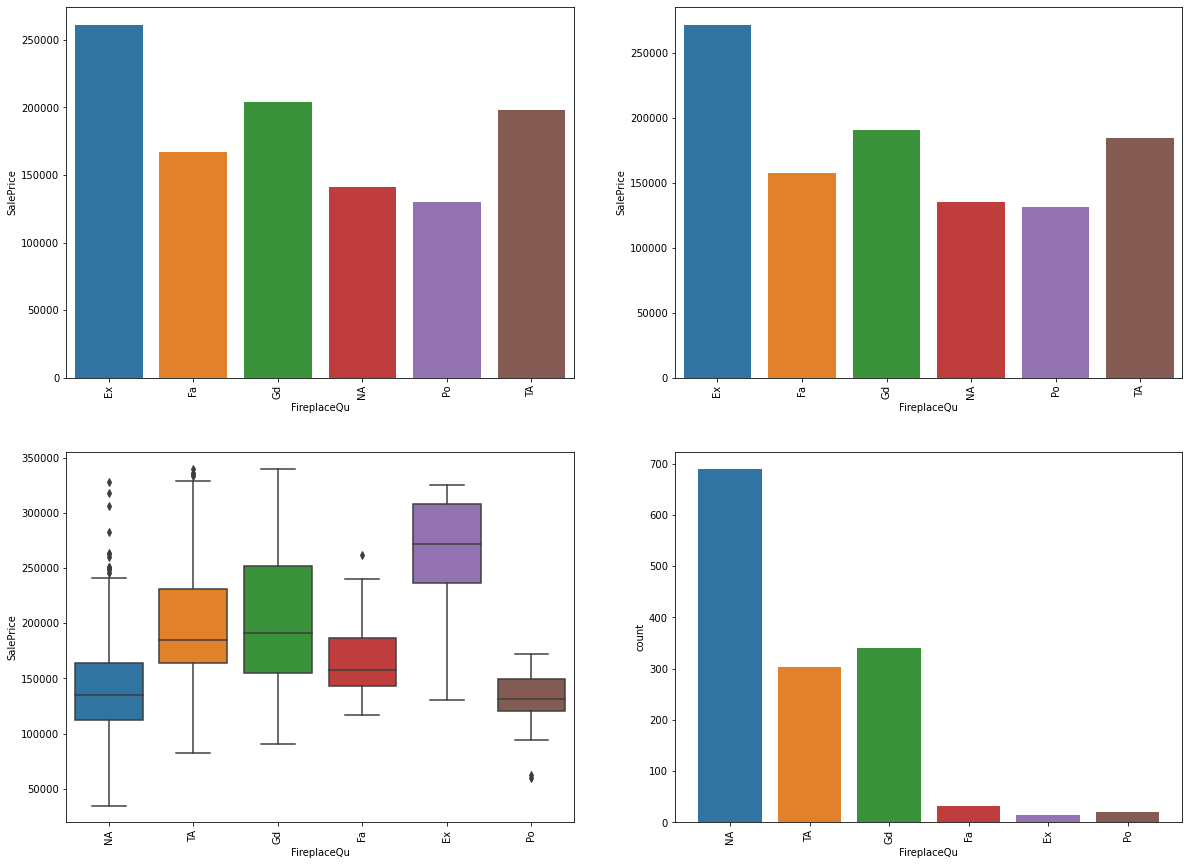

In [76]:
# FireplaceQu: Fireplace quality

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('FireplaceQu')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('FireplaceQu')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='FireplaceQu', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['FireplaceQu'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['FireplaceQu'].value_counts()
#raw_data['FireplaceQu'].value_counts() / len(raw_data)
# FireplaceQu having maximun houses
    #1) NA=No Fireplace (689 = 49.24%)
    #2) Gd=Good - Masonry Fireplace in main level (340 = 24.30%)
    #3) TA=Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement (303 = 21.65%)

# As the quality of fireplaces increases, mean/median selling price of house increases

[]

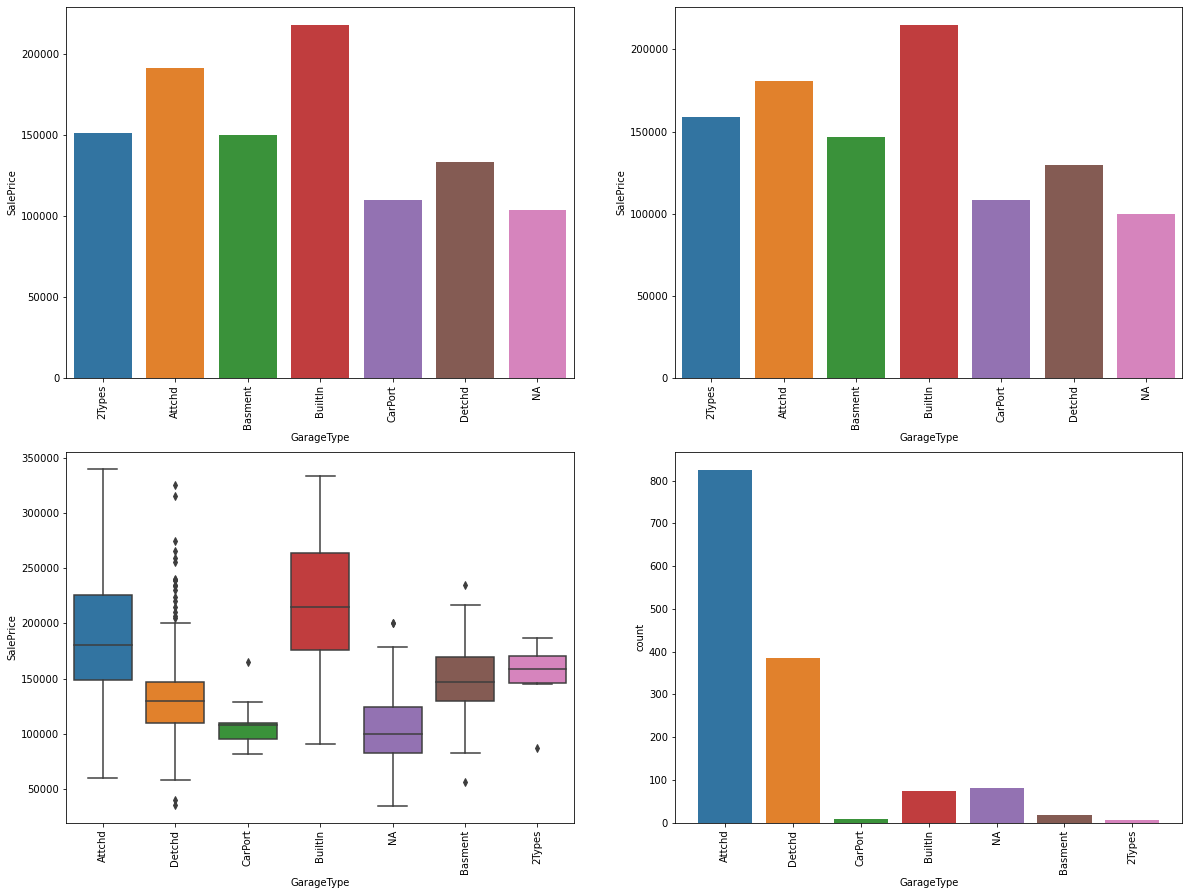

In [77]:
# GarageType: Garage location

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('GarageType')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('GarageType')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='GarageType', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['GarageType'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['GarageType'].value_counts()
#raw_data['GarageType'].value_counts() / len(raw_data)
# GarageType having maximun houses
    #1) Attchd=Attached to home (826 = 59.04%)
    #2) Detchd=Detached from home (386 = 27.59%)
    #3) BuiltIn=Built-In (Garage part of house - typically has room above garage) (81 = 5.78%)

# GarageType with highest mean/median value
    #1) BuiltIn
    #2) Attchd
    #3) Basment

[]

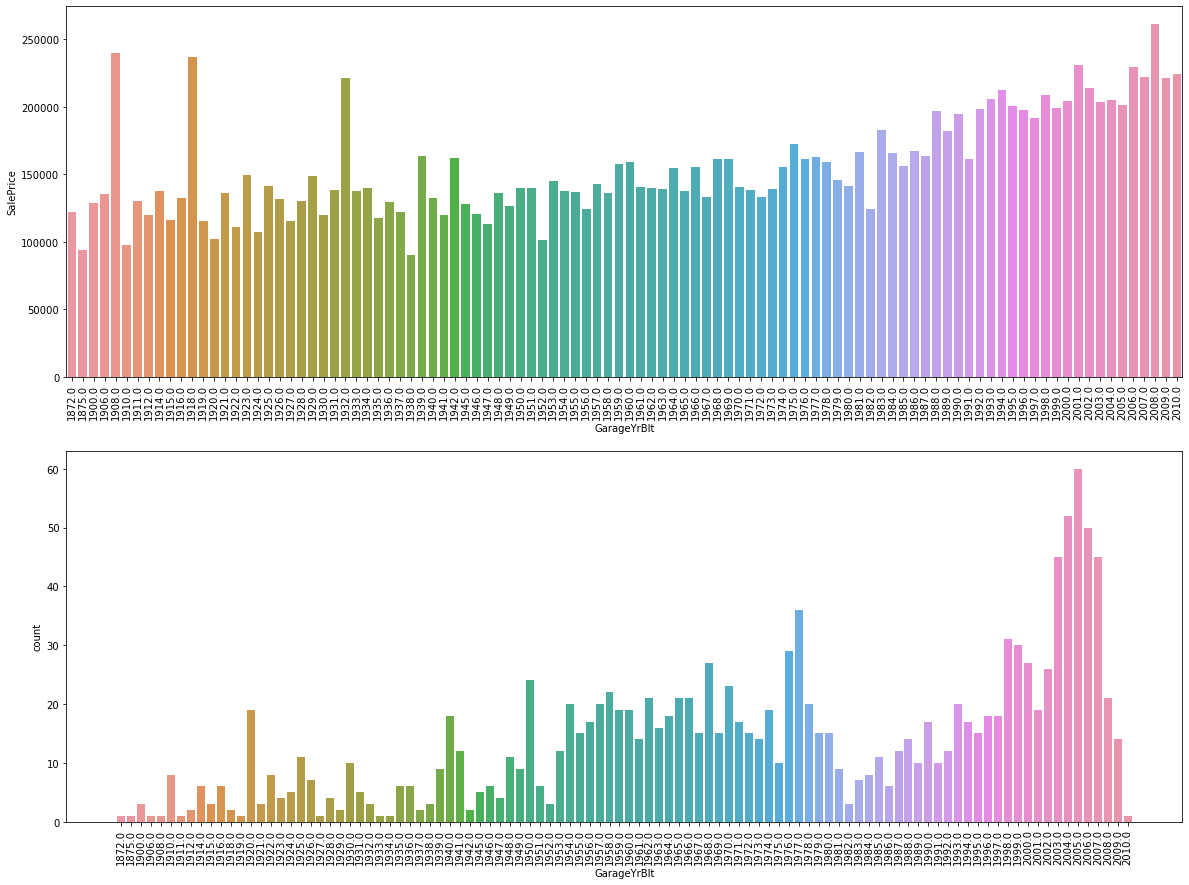

In [78]:
# GarageYrBlt: Year garage was built

fig, axes = plt.subplots(2,1, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('GarageYrBlt')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,0], x=raw_data['GarageYrBlt'])
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['GarageYrBlt'].value_counts()
#raw_data['GarageYrBlt'].value_counts() / len(raw_data)
# More recent the Garage, more its selling price

# raw_data['GarageYrBlt'].corr(raw_data['SalePrice']) = 0.53406

[]

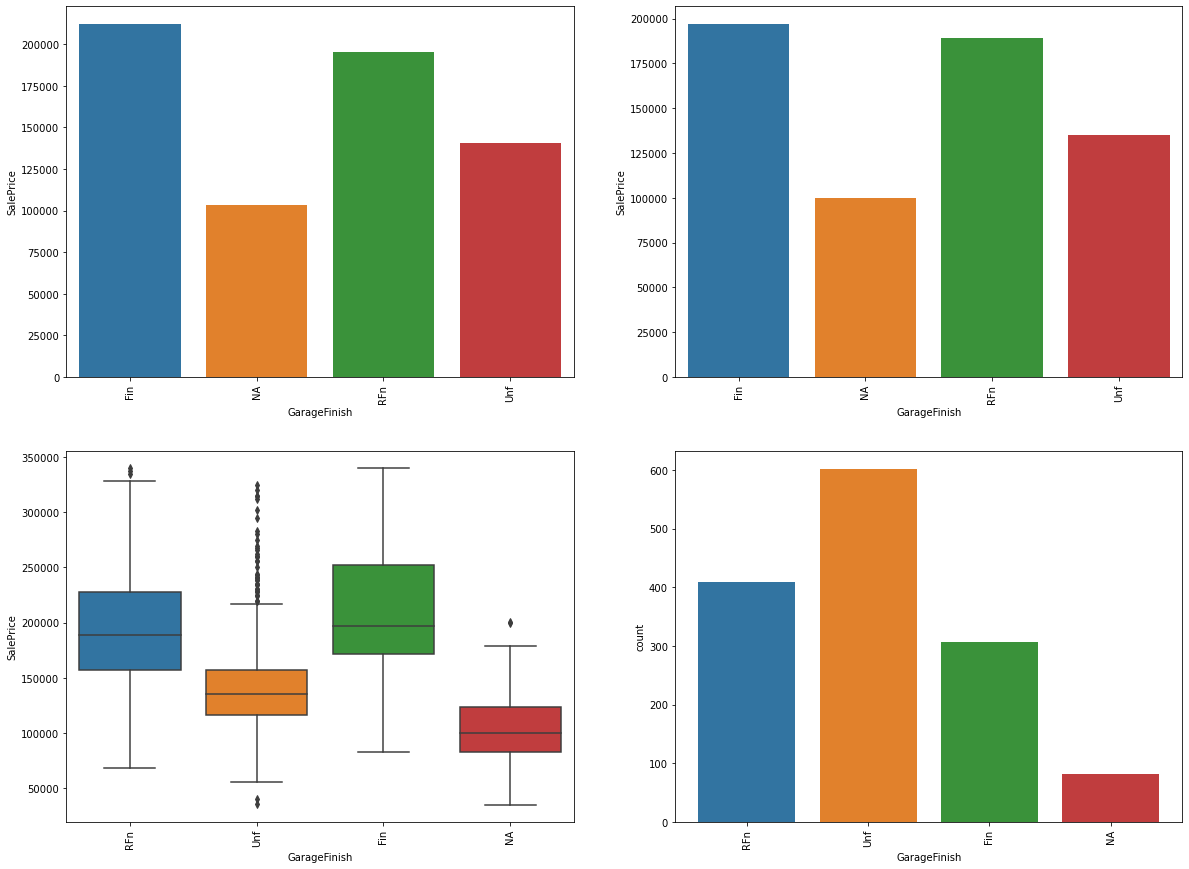

In [79]:
# GarageFinish: Interior finish of the garage

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('GarageFinish')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('GarageFinish')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='GarageFinish', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['GarageFinish'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['GarageFinish'].value_counts()
#raw_data['GarageFinish'].value_counts() / len(raw_data)
# GarageType having maximun houses
    #1) Unf=Unfinished (602 = 43.03%)
    #2) RFn=Rough Finished (409 = 29.23%)
    #3) Fin=Finished (307 = 21.94%)

# Better the finishing of the garage, more the selling price of house

[]

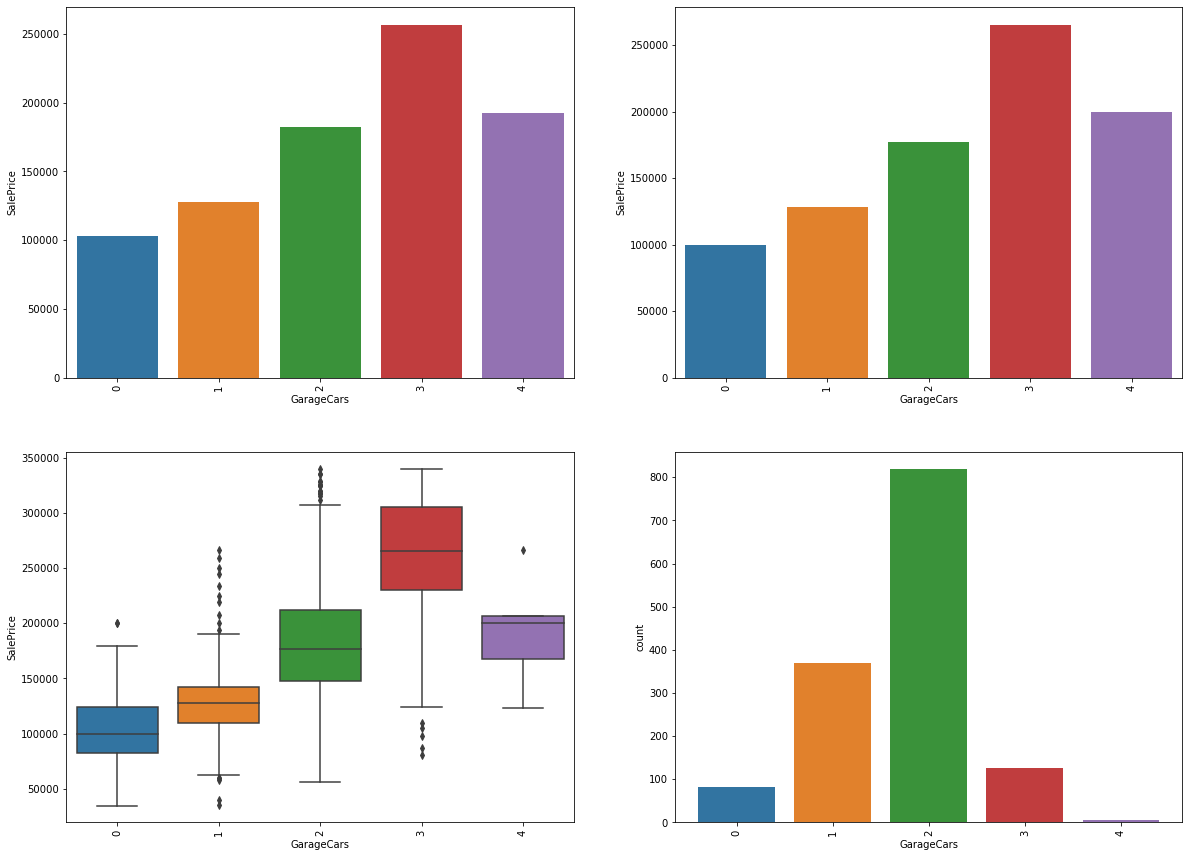

In [80]:
# GarageCars: Size of garage in car capacity

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('GarageCars')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('GarageCars')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='GarageCars', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['GarageCars'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['GarageCars'].value_counts()
#raw_data['GarageCars'].value_counts() / len(raw_data)
# GarageCars having maximun houses
    #1) 2 (818 = 58.47%)
    #2) 1 (369 = 26.37%)
    #3) 3 (126 = 9%)

# As the number of car capacity increases, Selling price increases, 
# except capacity=4 (only 5 houses) where price decreases slightly

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

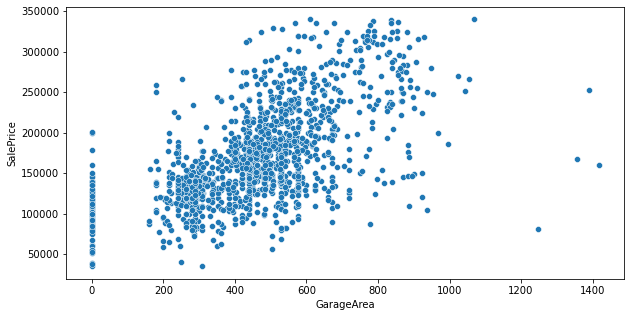

In [81]:
# GarageArea: Size of garage in square feet
# raw_data['GarageArea'].corr(raw_data['SalePrice']) = 0.6072

plt.figure(figsize=(10,5))
sns.scatterplot(x='GarageArea', y='SalePrice', data=raw_data)

[]

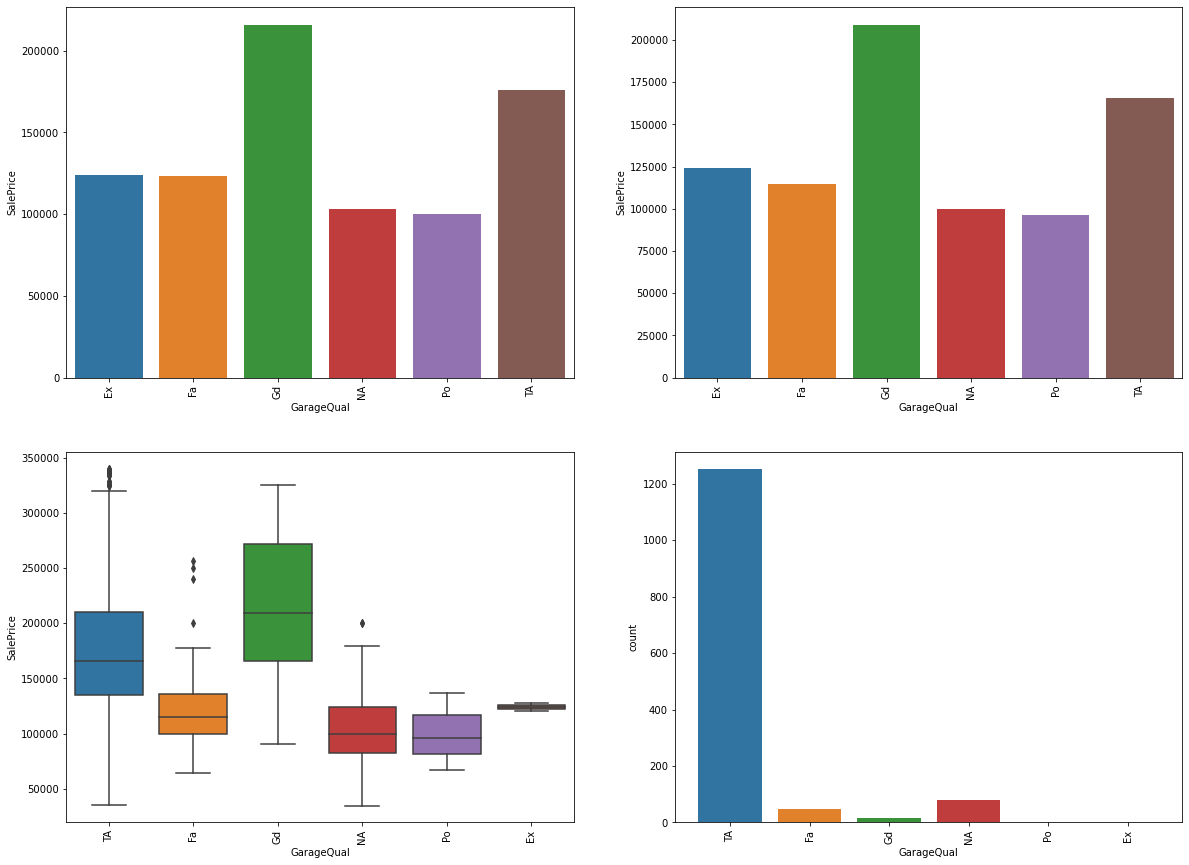

In [82]:
# GarageQual: Garage quality

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('GarageQual')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('GarageQual')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='GarageQual', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['GarageQual'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['GarageQual'].value_counts()
#raw_data['GarageQual'].value_counts() / len(raw_data)
# GarageQual having maximun houses
    #1) TA=Typical/Average (1251 = 89.42%)
    #2) NA=No Garage (81 = 5.78%)
    #3) Fa=Fair (48 = 3.43%)

# Better the quality of guarage, higher the selling price

[]

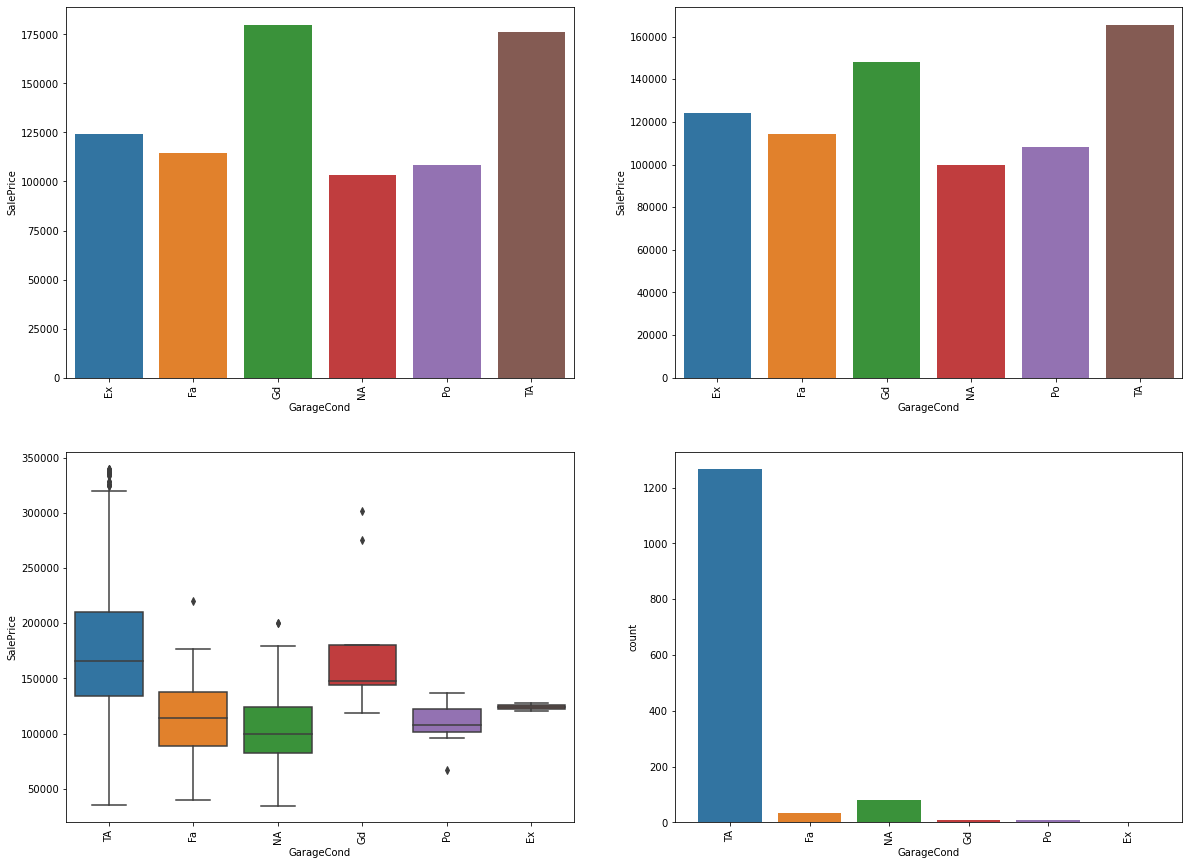

In [83]:
# GarageCond: Garage condition

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('GarageCond')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('GarageCond')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='GarageCond', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['GarageCond'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['GarageCond'].value_counts()
#raw_data['GarageCond'].value_counts() / len(raw_data)
# GarageCond having maximun houses
    #1) TA=Typical/Average (1265 = 90.42%)
    #2) NA=No Garage (81 = 5.78%)
    #3) Fa=Fair (35 = 2.5%)

# Better the condition of guarage, higher the selling price, only 2 guarage condition is excellent so we can ignore them

[]

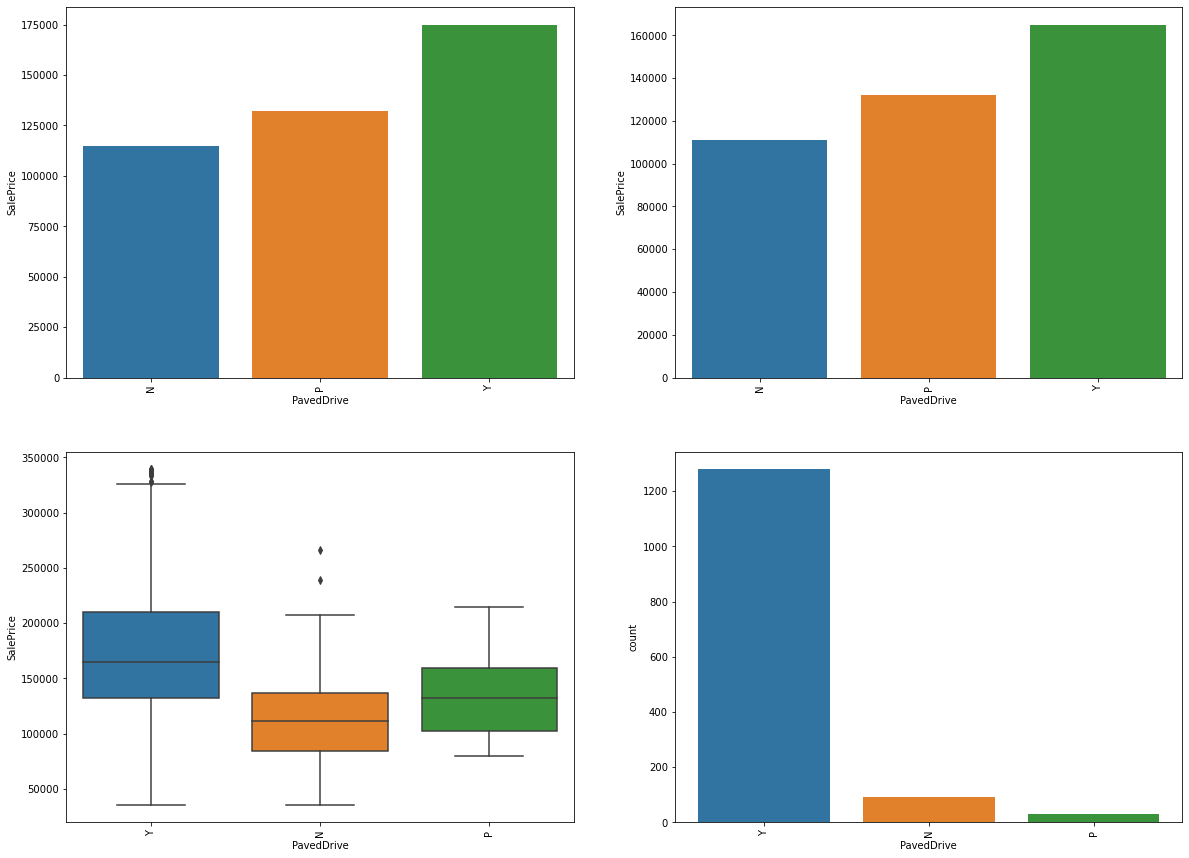

In [84]:
# PavedDrive: Paved driveway

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('PavedDrive')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('PavedDrive')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='PavedDrive', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['PavedDrive'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['PavedDrive'].value_counts()
#raw_data['PavedDrive'].value_counts() / len(raw_data)
# PavedDrive having maximun houses
    #1) Y=Paved (1279 = 91.42%)
    #2) N=Dirt/Gravel (90 = 6.43%)
    #3) P=Partial Pavement (30 = 2.14%)

# Houses with Paved driveway have better mean/median selling price that without paved driveway

<AxesSubplot:xlabel='PoolArea', ylabel='SalePrice'>

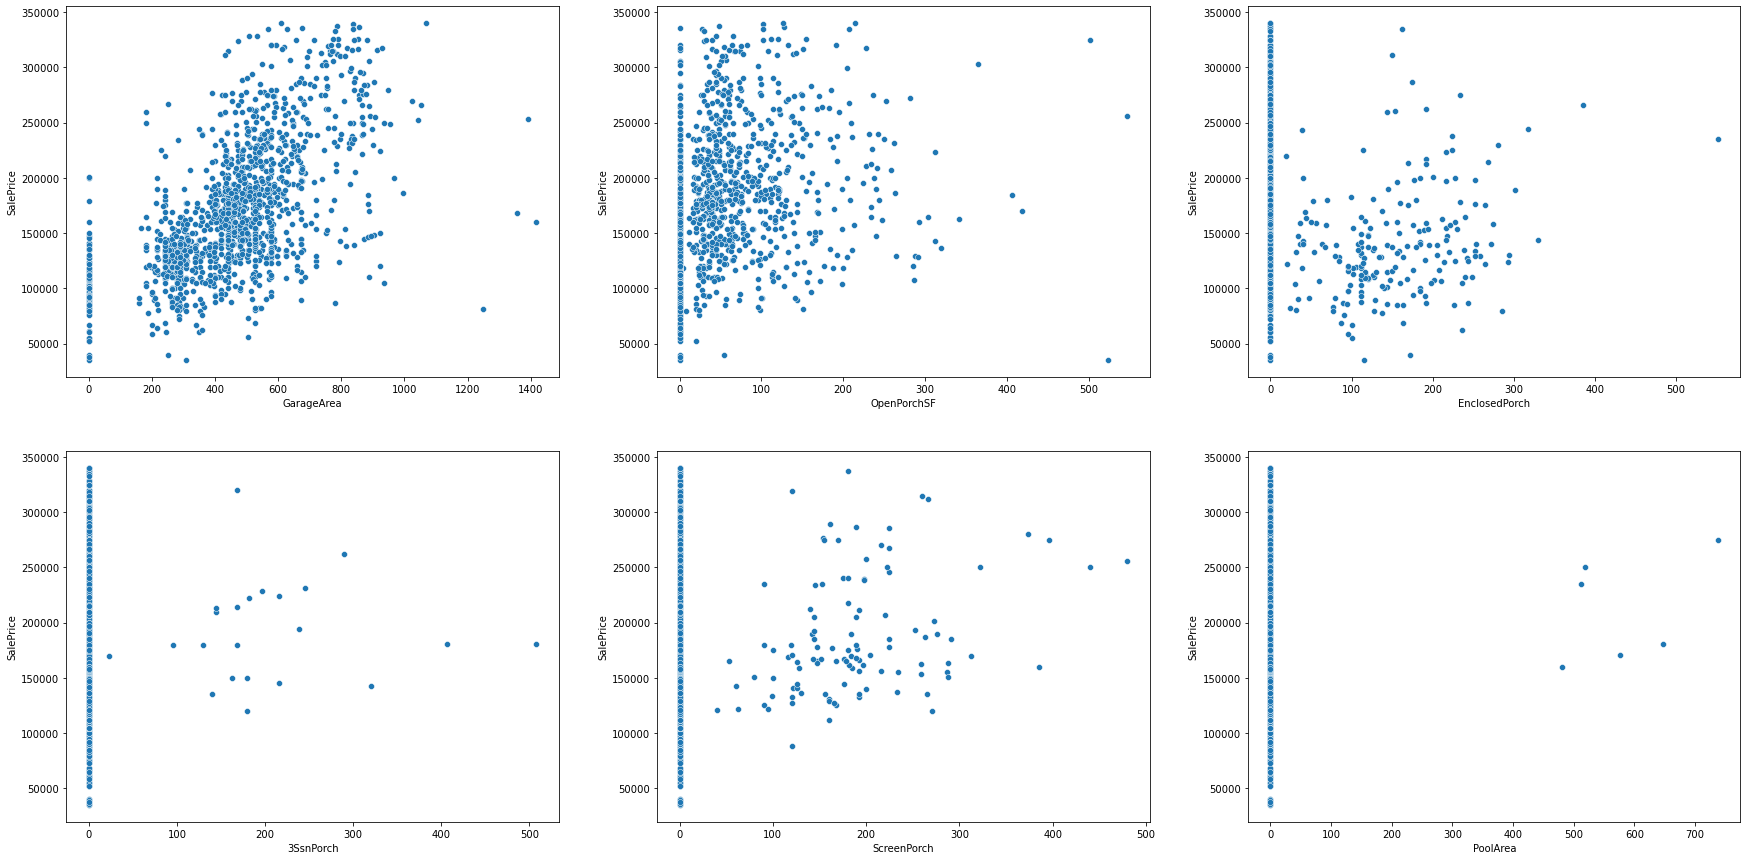

In [85]:
fig, axes = plt.subplots(2,3, sharex=False, figsize=(30,15), squeeze=False)

# WoodDeckSF: Wood deck area in square feet
# raw_data['WoodDeckSF'].corr(raw_data['SalePrice']) = 0.3023
sns.scatterplot(ax=axes[0,0], x='GarageArea', y='SalePrice', data=raw_data)

# OpenPorchSF: Open porch area in square feet
# raw_data['OpenPorchSF'].corr(raw_data['SalePrice']) = 0.32579
sns.scatterplot(ax=axes[0,1], x='OpenPorchSF', y='SalePrice', data=raw_data)

# EnclosedPorch: Enclosed porch area in square feet
# raw_data['EnclosedPorch'].corr(raw_data['SalePrice']) = -0.14499
sns.scatterplot(ax=axes[0,2], x='EnclosedPorch', y='SalePrice', data=raw_data)

# 3SsnPorch: Three season porch area in square feet
# raw_data['3SsnPorch'].corr(raw_data['SalePrice']) = 0.04332
sns.scatterplot(ax=axes[1,0], x='3SsnPorch', y='SalePrice', data=raw_data)

# ScreenPorch: Screen porch area in square feet
# raw_data['ScreenPorch'].corr(raw_data['SalePrice']) = 0.10885
sns.scatterplot(ax=axes[1,1], x='ScreenPorch', y='SalePrice', data=raw_data)

# PoolArea: Pool area in square feet
# raw_data['PoolArea'].corr(raw_data['SalePrice']) = .04868
sns.scatterplot(ax=axes[1,2], x='PoolArea', y='SalePrice', data=raw_data)

[]

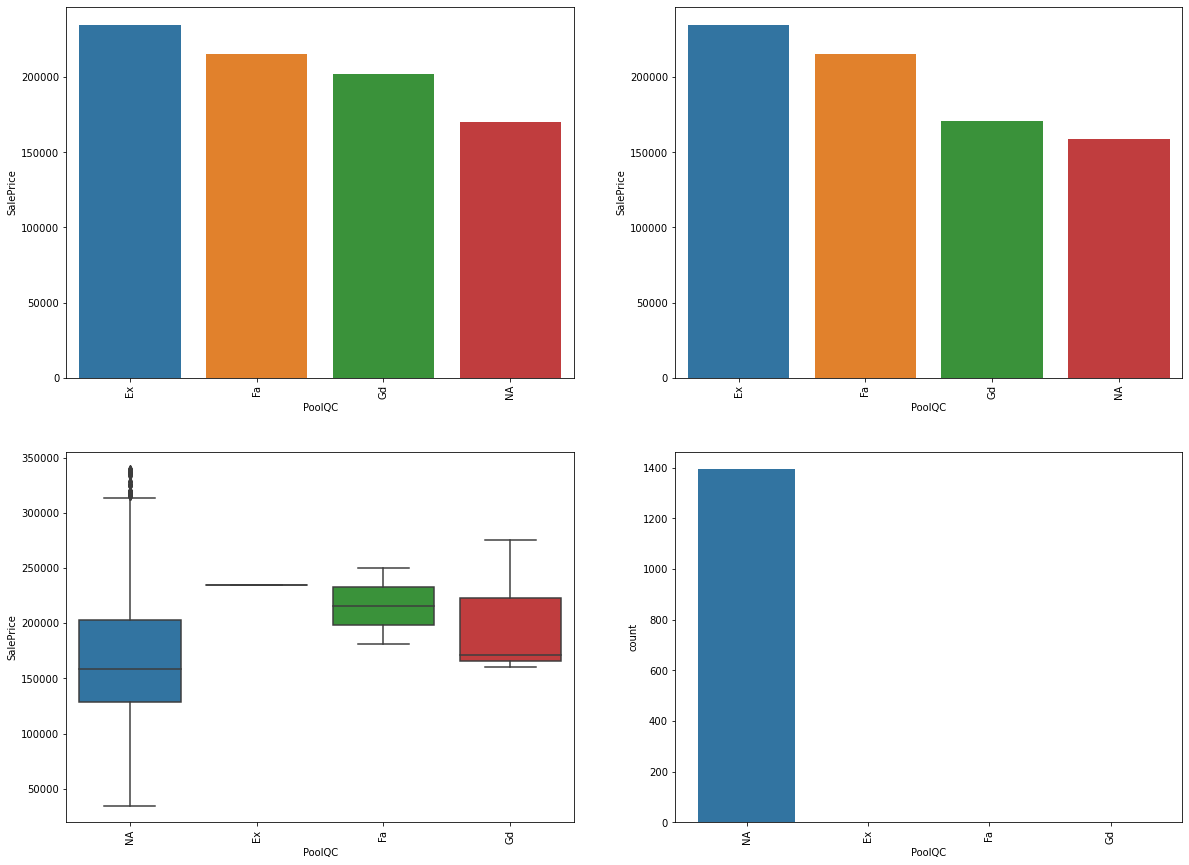

In [86]:
# PoolQC: Pool quality

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('PoolQC')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('PoolQC')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='PoolQC', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['PoolQC'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['PoolQC'].value_counts()
#raw_data['PoolQC'].value_counts() / len(raw_data)
# PoolQC is provided only to 6 houses
# Better the pool quality, better the house selling price

[]

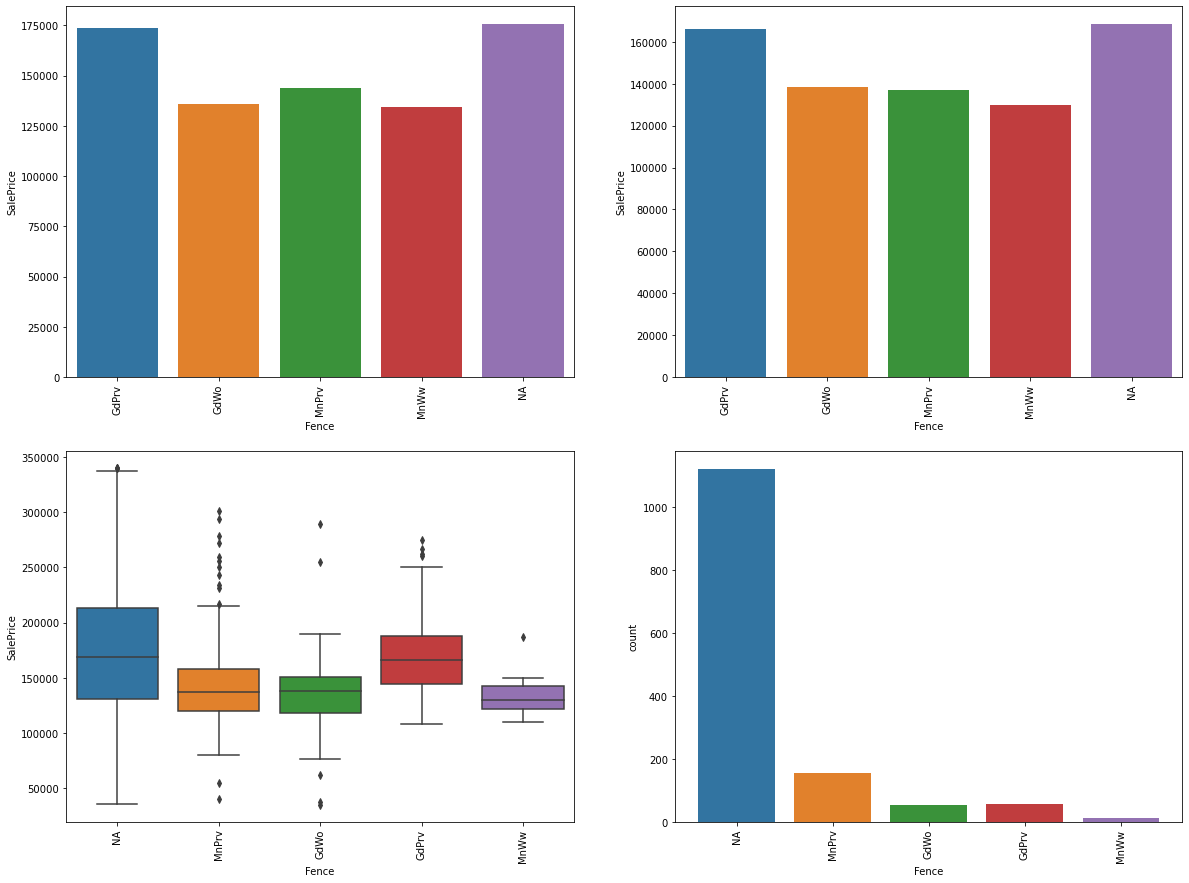

In [87]:
# Fence: Fence quality

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('Fence')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('Fence')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='Fence', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['Fence'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['Fence'].value_counts()
#raw_data['Fence'].value_counts() / len(raw_data)
# Fence having maximun houses
    #1) NA=No Fence (1122 = 80.20%)
    #2) MnPrv=Minimum Privacy (155 = 11.07%)
    #3) GdPrv=Good Privacy (58 = 4.14%)

# Among the houses who have fence, better the fence quality, better the house selling price

[]

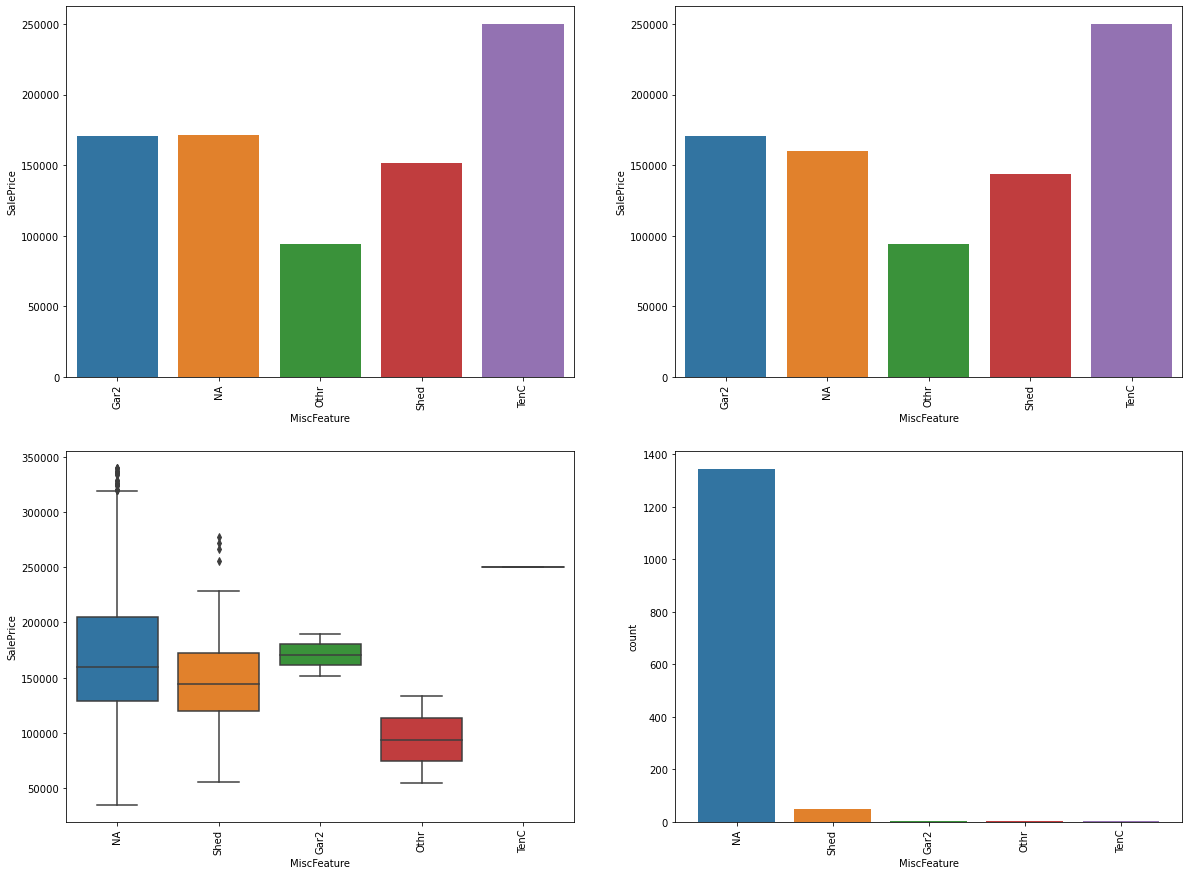

In [88]:
# MiscFeature: Miscellaneous feature not covered in other categories

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('MiscFeature')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('MiscFeature')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='MiscFeature', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['MiscFeature'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['MiscFeature'].value_counts()
#raw_data['MiscFeature'].value_counts() / len(raw_data)
# MiscFeature having maximun houses
    #1) NA=No Fence (1345 = 96.14%)
    #2) Shed=Shed (over 100 SF) (49 = 3.5%)

# Does not find any significant relationship

<AxesSubplot:xlabel='MiscVal', ylabel='SalePrice'>

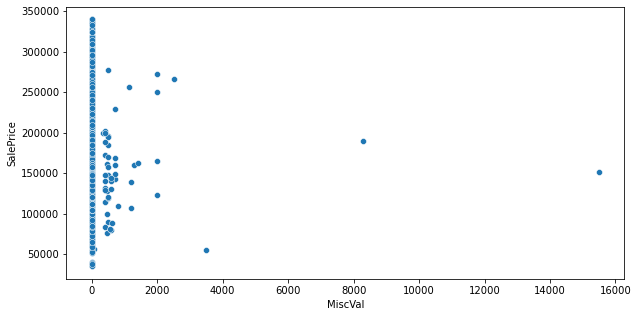

In [89]:
# MiscVal: $Value of miscellaneous feature
# raw_data['MiscVal'].corr(raw_data['SalePrice']) = -0.01287

plt.figure(figsize=(10,5))
sns.scatterplot(x='MiscVal', y='SalePrice', data=raw_data)

[]

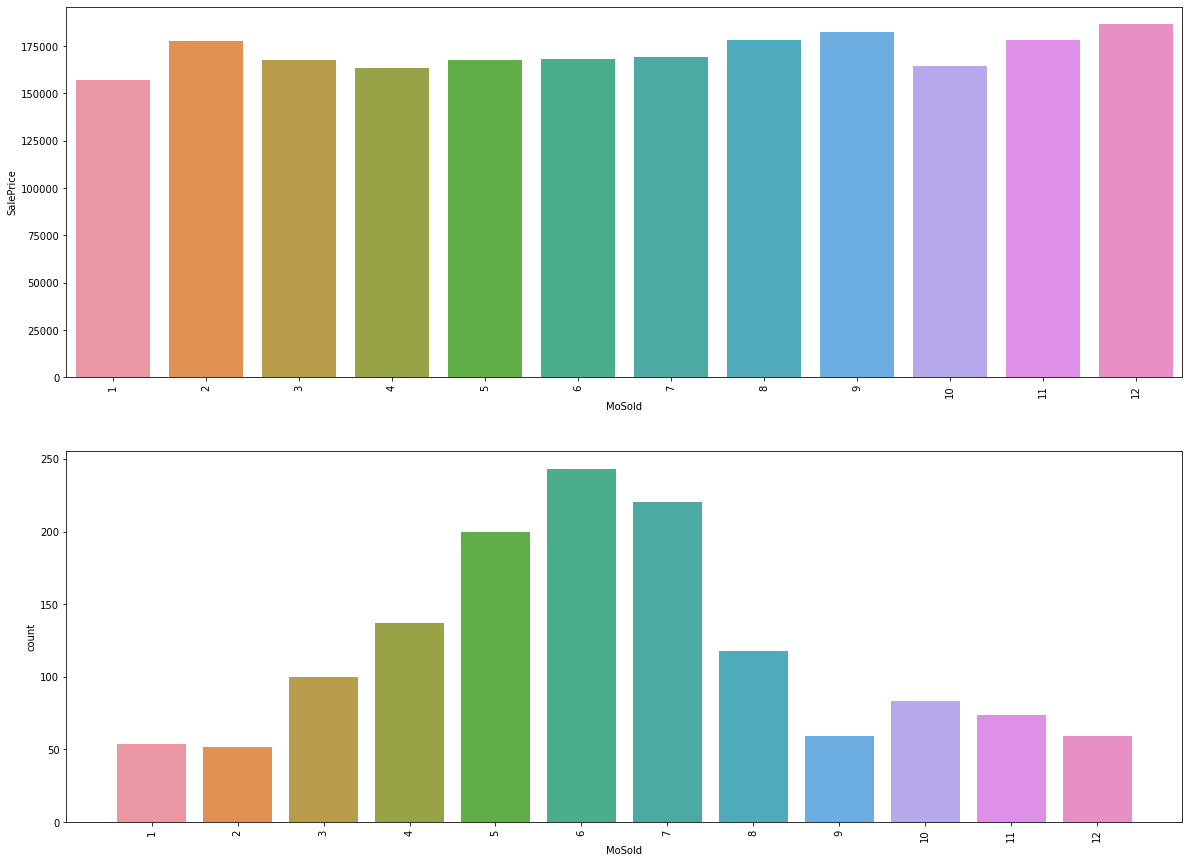

In [90]:
# MoSold: Month Sold (MM)

fig, axes = plt.subplots(2,1, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('MoSold')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,0], x=raw_data['MoSold'])
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['MoSold'].value_counts()
#raw_data['MoSold'].value_counts() / len(raw_data)

# Most of the houses are sold from Month=4 to Month=8
# Price don't have any correlation

[]

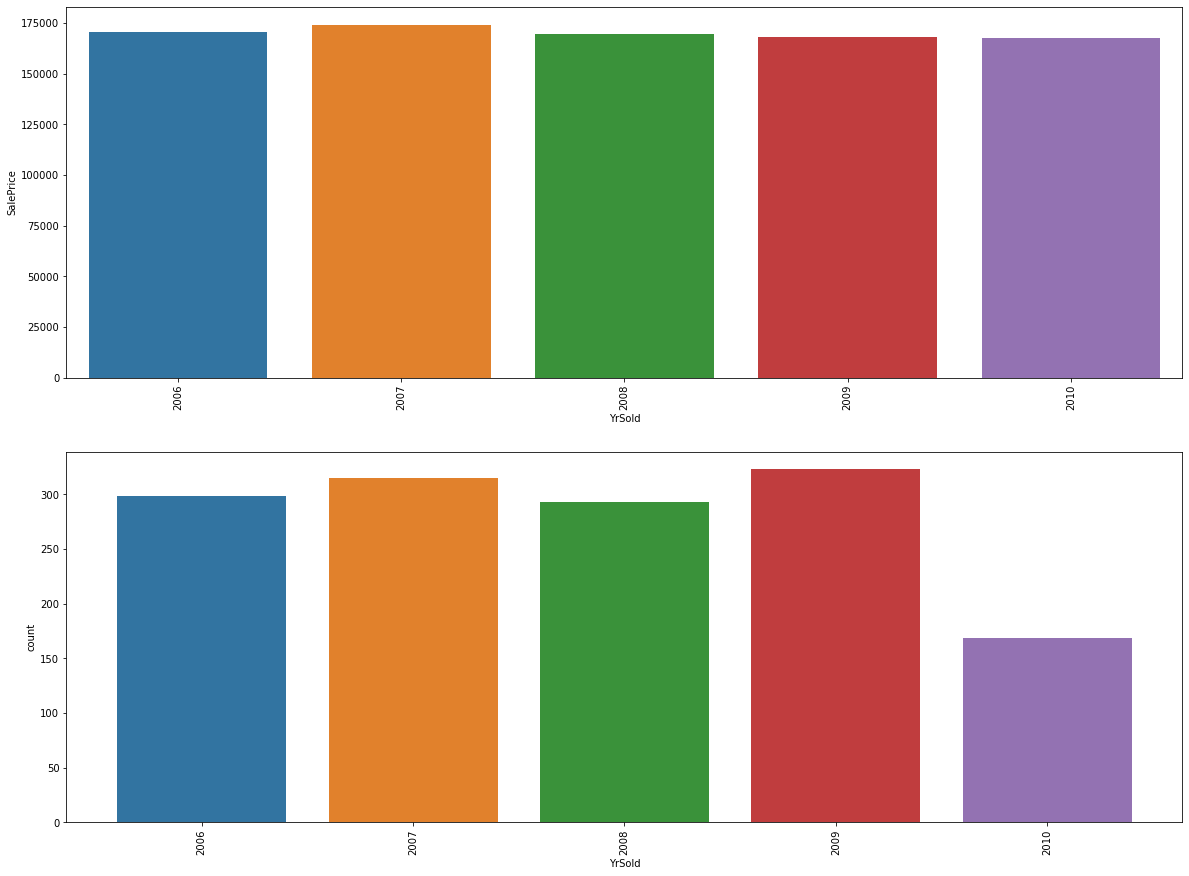

In [91]:
# YrSold: Year Sold (YYYY)

fig, axes = plt.subplots(2,1, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('YrSold')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,0], x=raw_data['YrSold'])
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['YrSold'].value_counts()
#raw_data['YrSold'].value_counts() / len(raw_data)

# Does not seems to have any relationship

[]

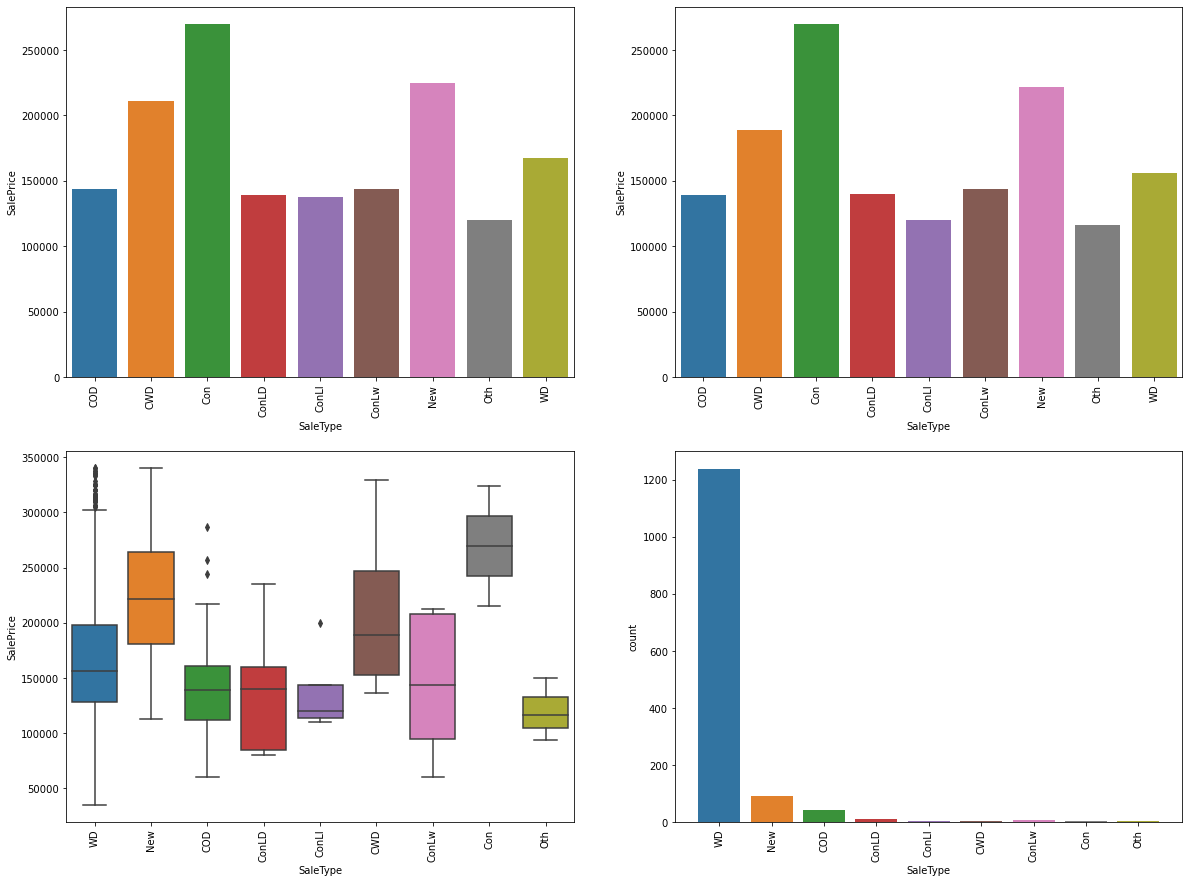

In [92]:
# SaleType: Type of sale

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('SaleType')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('SaleType')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='SaleType', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['SaleType'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['SaleType'].value_counts()
#raw_data['SaleType'].value_counts() / len(raw_data)
# SaleType having maximun houses
    #1) WD=Warranty Deed - Conventional (1238 = 88.49%)
    #2) New=Home just constructed and sold (91 = 6.50%)
    #3) COD=Court Officer Deed/Estate (43 = 3%)

# New and "Contract 15% Down payment regular terms" houses seems to have more selling price than other type of sale

[]

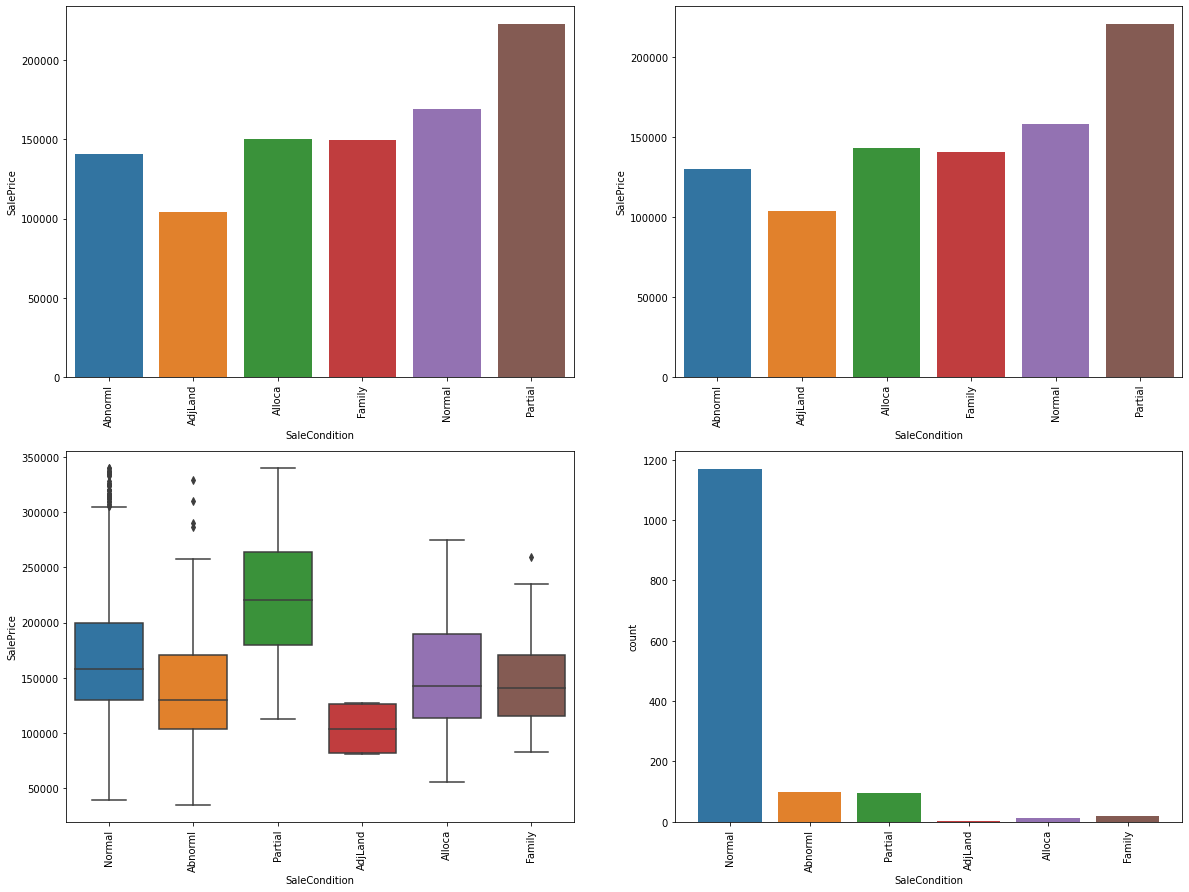

In [93]:
# SaleCondition: Condition of sale

fig, axes = plt.subplots(2,2, sharex=False, figsize=(20,15), squeeze=False)

meanSalePrice = raw_data.groupby('SaleCondition')[['SalePrice']].mean()
sns.barplot(ax=axes[0,0], x=meanSalePrice.index, y=meanSalePrice['SalePrice'])
axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=90)

medianSalePrice = raw_data.groupby('SaleCondition')[['SalePrice']].median()
sns.barplot(ax=axes[0,1], x=medianSalePrice.index, y=medianSalePrice['SalePrice'])
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=90)

sns.boxplot(ax=axes[1,0], data=raw_data, x='SaleCondition', y='SalePrice')
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=90)

sns.countplot(ax=axes[1,1], x=raw_data['SaleCondition'])
axes[1,1].set_xticklabels(labels=axes[1,1].get_xticklabels(), rotation=90)

plt.plot()

#raw_data['SaleCondition'].value_counts()
#raw_data['SaleCondition'].value_counts() / len(raw_data)
# SaleCondition having maximun houses
    #1) Normal=Normal Sale (1170 = 83.63%)
    #2) Abnorml=Abnormal Sale -  trade, foreclosure, short sale (100 = 7.14%)
    #3) Partial=Home was not completed when last assessed (associated with New Homes) (94 = 6.71%)

# New (under construction) homes have higher selling price

<AxesSubplot:xlabel='garageAge', ylabel='SalePrice'>

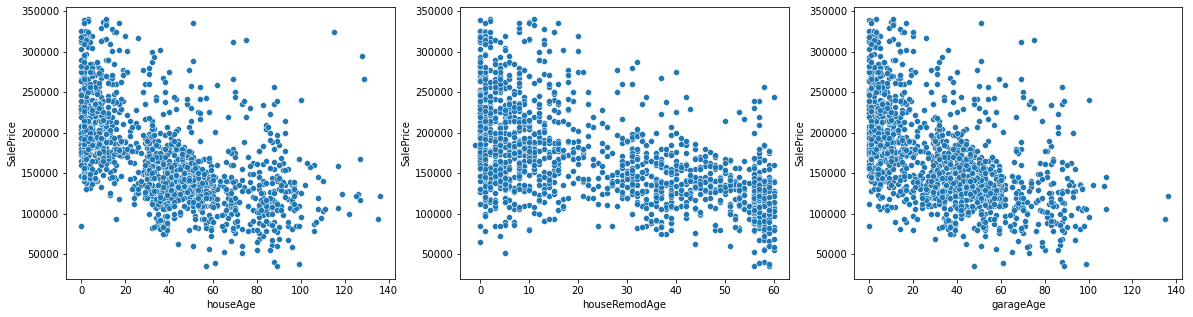

In [94]:
# New variable addition, houseAge, houseRemodAge, garageAge based on YrSold, YearBuilt, YearRemodAdd, GarageYrBlt

fig, axes = plt.subplots(1,3, sharex=False, figsize=(20,5), squeeze=False)

# House Age
raw_data['houseAge'] =raw_data['YrSold']-raw_data['YearBuilt']
# raw_data['houseAge'].corr(raw_data['SalePrice']) = -0.56486
sns.scatterplot(ax=axes[0,0], x='houseAge', y='SalePrice', data=raw_data)
# As the age of the house increase, selling price of the house decreases

# House Remodification Age
raw_data['houseRemodAge'] =raw_data['YrSold']-raw_data['YearRemodAdd']
# raw_data['houseRemodAge'].corr(raw_data['SalePrice']) = -0.54319
sns.scatterplot(ax=axes[0,1], x='houseRemodAge', y='SalePrice', data=raw_data)
# As the age of the house increase, selling price of the house decreases

# Garage Age
raw_data['garageAge'] =raw_data['YrSold']-raw_data['GarageYrBlt']
# raw_data['garageAge'].corr(raw_data['SalePrice']) = -0.53456749
sns.scatterplot(ax=axes[0,2], x='garageAge', y='SalePrice', data=raw_data)
# As the age of the garage increase, selling price of the house decreases

In [95]:
# Drop variables containing year
raw_data = raw_data.drop(['YrSold', 'YearBuilt', 'GarageYrBlt', 'YearRemodAdd'], axis=1)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

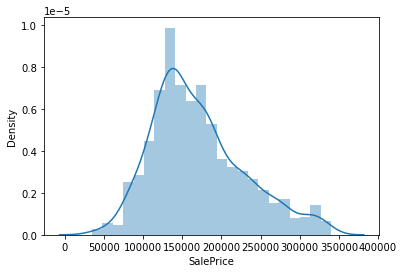

In [96]:
sns.distplot(a=raw_data['SalePrice'])

In [97]:
raw_data.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual       object
OverallCond       object
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object


In [98]:
cor = raw_data.corr()
cor

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
LotFrontage       1.000000  0.310615    0.135240    0.194962    0.039418   
LotArea           0.310615  1.000000    0.090614    0.203555    0.057139   
MasVnrArea        0.135240  0.090614    1.000000    0.213219   -0.060459   
BsmtFinSF1        0.194962  0.203555    0.213219    1.000000   -0.052980   
BsmtFinSF2        0.039418  0.057139   -0.060459   -0.052980    1.000000   
BsmtUnfSF         0.108742  0.014446    0.084789   -0.520300   -0.213893   
TotalBsmtSF       0.335661  0.252314    0.289698    0.482465    0.118198   
1stFlrSF          0.396428  0.307689    0.261206    0.395753    0.115401   
2ndFlrSF          0.046727  0.047520    0.125750   -0.167881   -0.094992   
LowQualFinSF      0.037617 -0.001544   -0.067856   -0.057332    0.017546   
GrLivArea         0.339448  0.270307    0.297826    0.141392    0.004227   
GarageCars        0.234365  0.147864    0.291880    0.158081   -0.027568   
GarageArea        0.296700  0.183981    0.297762    0.237109   -0.003431   
WoodDeckSF        0.061563  0.174801    0.106240    0.178227    0.085290   
OpenPorchSF       0.117176  0.102608    0.111861    0.090669    0.012380   
EnclosedPorch     0.010524 -0.009359   -0.113757   -0.102079    0.038022   
3SsnPorch         0.064002  0.031653    0.015367    0.011991   -0.029238   
ScreenPorch       0.037779  0.042003    0.069776    0.073321    0.090460   
PoolArea          0.161694  0.098440    0.026999    0.127790    0.047898   
MiscVal           0.003130  0.050528   -0.026690    0.009389    0.004494   
MoSold            0.014703  0.001886    0.006562   -0.024259   -0.012446   
SalePrice         0.295796  0.249812    0.350541    0.290377    0.007154   
houseAge         -0.089536 -0.002821   -0.279995   -0.210848    0.043424   
houseRemodAge    -0.057877 -0.014667   -0.127454   -0.085693    0.060318   
garageAge        -0.058779  0.008554   -0.227019   -0.143897    0.055764   

               BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
LotFrontage     0.108742     0.335661  0.396428  0.046727      0.037617   
LotArea         0.014446     0.252314  0.307689  0.047520     -0.001544   
MasVnrArea      0.084789     0.289698  0.261206  0.125750     -0.067856   
BsmtFinSF1     -0.520300     0.482465  0.395753 -0.167881     -0.057332   
BsmtFinSF2     -0.213893     0.118198  0.115401 -0.094992      0.017546   
BsmtUnfSF       1.000000     0.421814  0.307856 -0.001955      0.022407   
TotalBsmtSF     0.421814     1.000000  0.787402 -0.216716     -0.029693   
1stFlrSF        0.307856     0.787402  1.000000 -0.259180     -0.014899   
2ndFlrSF       -0.001955    -0.216716 -0.259180  1.000000      0.049376   
LowQualFinSF    0.022407    -0.029693 -0.014899  0.049376      1.000000   
GrLivArea       0.229399     0.392498  0.514792  0.689136      0.130638   
GarageCars      0.206804     0.373523  0.377347  0.161293     -0.111552   
GarageArea      0.180340     0.438428  0.438573  0.115121     -0.083114   
WoodDeckSF     -0.028587     0.191509  0.192433  0.072912     -0.016829   
OpenPorchSF     0.121763     0.228824  0.189767  0.206577     -0.005102   
EnclosedPorch  -0.006626    -0.099234 -0.065531  0.067539      0.067442   
3SsnPorch       0.028421     0.030918  0.053007 -0.014778     -0.002948   
ScreenPorch    -0.023958     0.088045  0.093582  0.024205     -0.032183   
PoolArea       -0.031918     0.119968  0.125121  0.051782      0.071475   
MiscVal        -0.023440    -0.013049 -0.015700  0.019378     -0.003693   
MoSold          0.050629     0.022903  0.043572  0.041249     -0.022337   
SalePrice       0.222795     0.543508  0.522785  0.317358     -0.058086   
houseAge       -0.143279    -0.355712 -0.240601 -0.002415      0.169705   
houseRemodAge  -0.177330    -0.253156 -0.195245 -0.133764      0.064394   
garageAge      -0.168732    -0.307165 -0.220887 -0.048546      0.113300   

               GrLivArea  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
LotFrontag

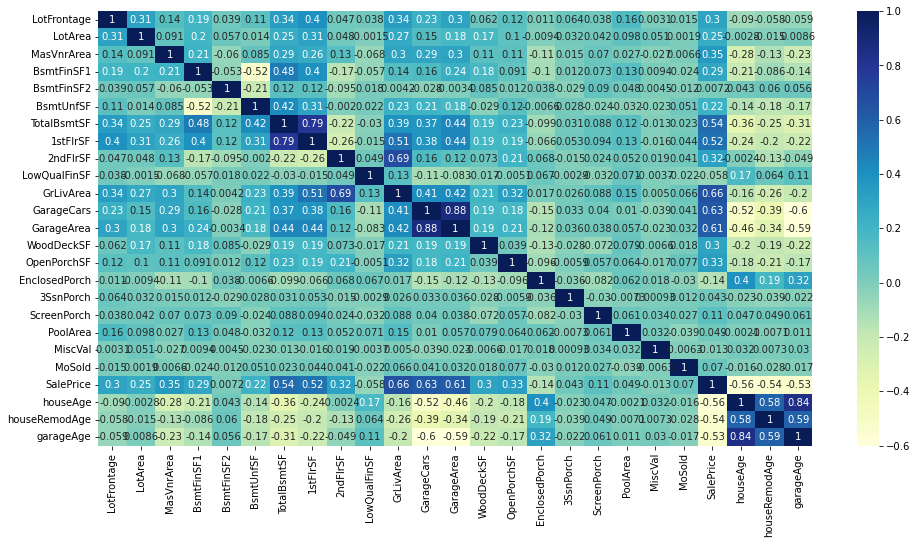

In [99]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#### SalePrice is highly correlated with TotalBsmtSF, GrLivArea, GarageArea
#### Also better the quality and condition of the house, basement, kitchen, garage, pool; more the selling price of the house

## Data Preparation

In [100]:
housing = raw_data

In [101]:
# creating dummy variables for categorical variables

# subset all categorical variables
housing_categorical =housing.select_dtypes(include=['object'])
housing_categorical.head()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave    NA      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave    NA      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave    NA      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave    NA      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave    NA      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

  OverallQual OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0           7           5     Gable  CompShg     VinylSd     VinylSd   
1           6           8     Gable  CompShg     MetalSd     MetalSd   
2           7           5     Gable  CompShg     VinylSd     VinylSd   
3           7           5     Gable  CompShg     Wd Sdng     Wd Shng   
4           8           5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0    BrkFace        Gd        TA      PConc       Gd       TA           No   
1       None        TA        TA     CBlock       Gd       TA           Gd   
2    BrkFace        Gd        TA      PConc       Gd       TA           Mn   
3       None        TA        TA     BrkTil       TA       Gd           No   
4    BrkFace        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
0          GLQ          Unf    GasA        Ex          Y      SBrkr   
1          ALQ          Unf    GasA        Ex          Y      SBrkr   
2          GLQ          Unf    GasA        Ex          Y      SBrkr   
3          ALQ          Unf    GasA        Gd          Y      SBrkr   
4          GLQ          Unf    GasA        Ex          Y      SBrkr   

  BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr KitchenAbvGr  \
0            1            0        2        1            3            1   
1            0            1        2        0            3            1   
2            1            0        2        1            3            1   
3            1            0        1        0            3            1   
4            1            0        2        1            4            1   

  KitchenQual TotRmsAbvGrd Functional Fireplaces FireplaceQu GarageType  \
0          Gd            8        Typ          0          NA     Attchd   
1          TA            6        Typ          1          TA     Attchd   
2          Gd            6        Typ          1          TA     Attchd   
3          Gd            7        Typ          1          Gd     Detchd   
4          Gd            9        Typ          1          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y     NA    NA          NA   
1          RFn         TA         TA          Y     NA    NA          NA   
2          RFn         TA         TA          Y     NA    NA          NA   
3          Unf         TA         TA          Y     NA    NA          NA   
4          RFn         TA         TA          Y     NA    NA          NA   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [102]:
# convert into dummies - one hot encoding
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_NA  \
0            0            0            1            0            1         1   
1            0            0            1            0            1         1   
2            0            0            1            0            1         1   
3            0            0            1            0            1         1   
4            0            0            1            0            1         1   

   Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0           0             0             0             1                0   
1           0             0             0             1                0   
2           0             0             0             0                0   
3           0             0             0             0                0   
4           0             0             0             0                0   

   LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  \
0                0                1                 0                  0   
1                0                1                 0                  0   
2                0                1                 0                  0   
3                0                1                 0                  0   
4                0                1                 0                  0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
0              0              0                 1              0   
1              1              0                 0              0   
2              0              0                 1              0   
3              0              0                 0              0   
4              1              0                 0              0   

   LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0                     0                    0   
1              0                     0                    0   
2              0                     0                    0   
3              0                     0                    0   
4              0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_

In [103]:
# drop categorical variables 
housing = housing.drop(list(housing_categorical.columns), axis=1)

In [104]:
# concat dummy variables with X
housing = pd.concat([housing, housing_dummies], axis=1)

In [105]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [106]:
col = df_train.columns

In [107]:
scaler = MinMaxScaler()
df_train[col] = scaler.fit_transform(df_train[col])

In [108]:
df_test[col] = scaler.transform(df_test[col])

In [109]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [110]:
y_test = df_test.pop('SalePrice')
X_test = df_test

## Model Building and Evaluation

### Linear Regression

In [111]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [112]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-86971164791.43799
[ 1.59325828e-02  3.28584662e-01  3.39839785e-02  6.45050322e+10
  1.68462823e+10  2.17721627e+10 -6.98309261e+10 -1.04611394e+10
 -4.36400904e+09 -1.26743497e+09  1.27415622e+10  2.88090706e-02
  1.11178398e-01  2.84057856e-02  3.48377228e-02 -9.99689102e-04
  2.60926485e-02  6.16474748e-02 -3.64447328e+10  9.31610167e-02
 -1.86109543e-03 -1.90234184e-01 -1.45447254e-02  3.22704315e-02
  1.71718597e-02  4.06123400e-02  6.01577759e-03 -4.86373901e-05
 -1.05361938e-02  3.62758636e-02  1.88025951e-01 -5.89931011e-02
 -7.18879700e-02 -2.26935665e+09 -8.39424133e-03 -6.91452026e-02
 -4.59553003e-02 -9.29498672e-02  9.32197571e-02  5.33581972e-02
  7.01961517e-02  3.65686417e-02 -1.30417943e-02  1.18007660e-02
  1.18508339e-02 -1.42313242e-02  9.70470905e-03  9.97543335e-04
  1.44057274e-02 -2.99496651e-02 -1.67846680e-04 -1.70332640e-01
  1.23882294e-02 -1.74274445e-02 -5.73105514e-02 -7.86781311e-03
  1.50156021e-02 -8.03029537e-02  4.17364036e+09  6.16240501e-02
  1.71

In [113]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9551675065754834
-5.381260506257562e+20
1.595458504201374
9.093273931563373e+21
0.0016296818224733136
2.165065221800803e+19


### RFE

In [114]:
rfe = RFE(estimator=lm, n_features_to_select=20)

In [115]:
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [116]:
list(zip(col,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 234),
 ('LotArea', False, 69),
 ('MasVnrArea', False, 125),
 ('BsmtFinSF1', False, 66),
 ('BsmtFinSF2', False, 67),
 ('BsmtUnfSF', False, 68),
 ('TotalBsmtSF', False, 65),
 ('1stFlrSF', False, 61),
 ('2ndFlrSF', False, 62),
 ('LowQualFinSF', False, 64),
 ('GrLivArea', False, 63),
 ('GarageCars', False, 110),
 ('GarageArea', False, 74),
 ('WoodDeckSF', False, 136),
 ('OpenPorchSF', False, 135),
 ('EnclosedPorch', False, 285),
 ('3SsnPorch', False, 137),
 ('ScreenPorch', False, 99),
 ('PoolArea', False, 60),
 ('MiscVal', False, 92),
 ('MoSold', False, 278),
 ('SalePrice', False, 70),
 ('houseAge', False, 151),
 ('houseRemodAge', False, 150),
 ('garageAge', False, 219),
 ('MSSubClass_30', False, 163),
 ('MSSubClass_40', False, 272),
 ('MSSubClass_45', False, 293),
 ('MSSubClass_50', False, 220),
 ('MSSubClass_60', False, 139),
 ('MSSubClass_70', False, 91),
 ('MSSubClass_75', False, 146),
 ('MSSubClass_80', False, 144),
 ('MSSubClass_85', False, 56),
 ('MSSubClass_

In [117]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [118]:
col = X_train.columns[rfe.support_]
col

Index(['OverallQual_2', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6',
       'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10',
       'BsmtCond_Po', 'Electrical_Mix', 'TotRmsAbvGrd_3', 'TotRmsAbvGrd_4',
       'TotRmsAbvGrd_5', 'TotRmsAbvGrd_6', 'TotRmsAbvGrd_7', 'TotRmsAbvGrd_8',
       'TotRmsAbvGrd_9', 'TotRmsAbvGrd_10', 'TotRmsAbvGrd_11',
       'TotRmsAbvGrd_12'],
      dtype='object')

In [119]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=292)

In [120]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = pd.DataFrame(X_train, columns=col)

X_train_rfe.head()

OverallQual_2  OverallQual_4  OverallQual_5  OverallQual_6  \
162             0.0            0.0            0.0            0.0   
743             0.0            0.0            1.0            0.0   
1271            0.0            0.0            0.0            1.0   
1110            0.0            0.0            0.0            1.0   
344             0.0            0.0            1.0            0.0   

      OverallQual_7  OverallQual_8  OverallQual_9  OverallQual_10  \
162             1.0            0.0            0.0             0.0   
743             0.0            0.0            0.0             0.0   
1271            0.0            0.0            0.0             0.0   
1110            0.0            0.0            0.0             0.0   
344             0.0            0.0            0.0             0.0   

      BsmtCond_Po  Electrical_Mix  TotRmsAbvGrd_3  TotRmsAbvGrd_4  \
162           0.0             0.0             0.0             0.0   
743           0.0             0.0             0.0             0.0   
1271          0.0             0.0             0.0             0.0   
1110          0.0             0.0             0.0             0.0   
344           0.0             0.0             0.0             1.0   

      TotRmsAbvGrd_5  TotRmsAbvGrd_6  TotRmsAbvGrd_7  TotRmsAbvGrd_8  \
162              0.0             0.0             1.0             0.0   
743              0.0             1.0             0.0             0.0   
1271             0.0             0.0             1.0             0.0   
1110             0.0             0.0             0.0             1.0   
344              0.0             0.0             0.0             0.0   

      TotRmsAbvGrd_9  TotRmsAbvGrd_10  TotRmsAbvGrd_11  TotRmsAbvGrd_12  
162              0.0              0.0              0.0              0.0  
743              0.0              0.0              0.0              0.0  
1271             0.0              0.0              0.0              0.0  
1110             0.0              0.0              0.0              0.0  
344              0.0              0.0              0.0              0.0

In [121]:
X_train_rfe.shape

(979, 20)

In [122]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [123]:
X_train_rfe.shape

(979, 21)

In [124]:
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)
rfelm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [125]:
#Let's see the summary of our linear model
print(rfelm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     110.5
Date:                Wed, 08 Jun 2022   Prob (F-statistic):          2.46e-232
Time:                        09:27:37   Log-Likelihood:                 818.79
No. Observations:                 979   AIC:                            -1596.
Df Residuals:                     958   BIC:                            -1493.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0131      0.106     

In [126]:
y_train_pred = rfelm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

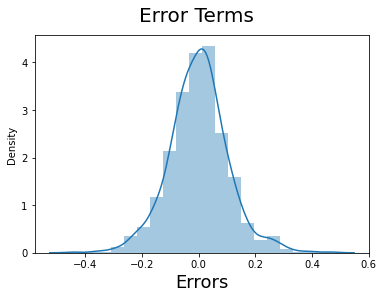

In [127]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

<AxesSubplot:xlabel='SalePrice'>

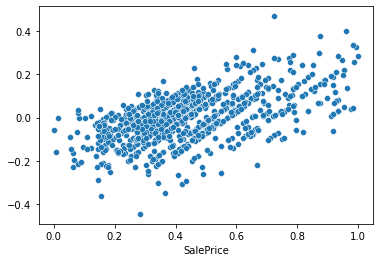

In [128]:
resd = (y_train - y_train_pred)

sns.scatterplot(x=y_train, y=resd)

### Ridge and Lasso Regression

#### Ridge Regression

In [129]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [130]:
# Printing the best hyperparameter alpha
print(model_cv_ridge.best_params_)
print(model_cv_ridge.best_score_)

{'alpha': 2.0}
-0.05135334012734953


In [131]:
cv_results = pd.DataFrame(model_cv_ridge.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.008389      0.001350         0.003396        0.000491      0.0001   
1        0.008388      0.001847         0.003797        0.001166       0.001   
2        0.007594      0.001853         0.002998        0.000632        0.01   
3        0.008394      0.001019         0.003197        0.000979        0.05   
4        0.008003      0.001684         0.002990        0.000633         0.1   
5        0.007394      0.001495         0.002797        0.000748         0.2   
6        0.008194      0.001719         0.003597        0.000800         0.3   
7        0.007794      0.001832         0.003397        0.001019         0.4   
8        0.008993      0.001413         0.003397        0.001199         0.5   
9        0.006995      0.000632         0.002397        0.000489         0.6   
10       0.006994      0.000633         0.002398        0.000490         0.7   
11       0.009393      0.001199         0.003996        0.001095         0.8   
12       0.009392      0.001957         0.002997        0.000894         0.9   
13       0.009193      0.001719         0.004198        0.000980         1.0   
14       0.008196      0.001602         0.003594        0.001197         2.0   
15       0.007195      0.000401         0.002197        0.000400         3.0   
16       0.007394      0.001355         0.002598        0.000490         4.0   
17       0.008793      0.001468         0.003197        0.001166         5.0   
18       0.007994      0.001673         0.003197        0.000748         6.0   
19       0.006595      0.000489         0.002797        0.000399         7.0   
20       0.008194      0.001468         0.003197        0.000748         8.0   
21       0.008594      0.001019         0.003196        0.001165         9.0   
22       0.008594      0.001623         0.003796        0.001166        10.0   
23       0.009194      0.001599         0.003196        0.000400          20   
24       0.008992      0.002606         0.003996        0.000894          50   
25       0.009392      0.002332         0.004396        0.000799         100   
26       0.008193      0.001469         0.003397        0.001019         500   
27       0.007195      0.001467         0.002797        0.000747        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.057729          -0.047019   
1    {'alpha': 0.001}          -0.057647          -0.047003   
2     {'alpha': 0.01}          -0.056937          -0.046983   
3     {'alpha': 0.05}          -0.055246          -0.047740   
4      {'alpha': 0.1}          -0.054582          -0.048559   
5      {'alpha': 0.2}          -0.053653          -0.049533   
6      {'alpha': 0.3}          -0.053087          -0.050088   
7      {'alpha': 0.4}          -0.052651          -0.050474   
8      {'alpha': 0.5}          -0.052287          -0.050746   
9      {'alpha': 0.6}          -0.051973          -0.050959   
10     {'alpha': 0.7}          -0.051712          -0.051102   
11     {'alpha': 0.8}          -0.051494          -0.051197   
12     {'alpha': 0.9}          -0.051309          -0.051293   
13     {'alpha': 1.0}          -0.051159          -0.051360   
14     {'alpha': 2.0}          -0.050486          -0.051309   
15     {'alpha': 3.0}          -0.050447          -0.051115   
16     {'alpha': 4.0}          -0.050391          -0.051018   
17     {'alpha': 5.0}          -0.050448          -0.050924   
18     {'alpha': 6.0}          -0.050538          -0.050938   
19     {'alpha': 7.0}          -0.050622          -0.050979   
20     {'alpha': 8.0}          -0.050716          -0.051016   
21     {'alpha': 9.0}          -0.050831          -0.051098   
22    {'alpha': 10.0}          -0.050974          -0.051237   
23      {'alpha': 20}          -0.052624          -0.053130   
24      {'alpha': 50}          -0.056579          -0.058185   
25     {'alpha': 100}          -0.060556     

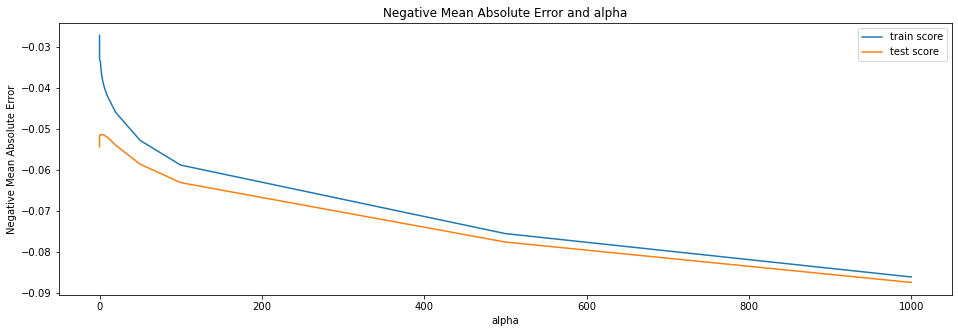

In [132]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [133]:
#Fitting Ridge model for alpha = 2 and printing coefficients which have been penalised
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train,y_train)
print(ridge.coef_)

[-1.13667505e-02  8.18708807e-02  2.06314865e-02  5.74274597e-02
  4.72300407e-02  2.11960127e-02  7.10500927e-02  1.40801743e-01
  1.12306866e-01  1.06377821e-02  1.55125212e-01  4.81310825e-02
  9.49779325e-02  3.97476067e-02  3.91797825e-02  3.16132392e-03
  3.08995689e-02  4.52369881e-02 -4.36194116e-02  3.93138817e-02
  3.15922399e-03 -4.56176482e-02 -2.16728868e-02 -2.10729018e-04
 -1.90333216e-02  5.22865399e-03  6.43063317e-03 -3.77481184e-03
 -9.89133707e-03  1.58607973e-02  5.75368722e-02  2.55117227e-04
 -8.19872827e-03 -5.35790926e-03 -1.99258363e-02 -5.50739078e-02
  4.31532055e-05 -2.27144792e-02  4.20018584e-02  1.37557272e-02
  3.74281670e-02  1.68137495e-02  1.99335630e-02  6.75829118e-03
  1.12075424e-02  2.31158262e-03 -6.84924806e-03  4.16609249e-03
  2.41700486e-02 -5.65766329e-03  2.34571537e-02 -3.97364595e-02
  1.78659164e-02 -1.03630106e-02 -2.90706750e-02 -1.16885594e-02
  2.36231468e-02 -1.49465039e-02  0.00000000e+00  2.10847199e-02
 -2.23937640e-04  5.15551

In [134]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.928588481331897
0.8551603599634878
2.5413289793660163
2.4475056010938276
0.0025958416541021615
0.005827394288318637


### Lasso Regression

In [156]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100 ]}

lasso = Lasso()

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [157]:
# Printing the best hyperparameter alpha
print(model_cv_lasso.best_params_)
print(model_cv_lasso.best_score_)

{'alpha': 0.0001}
-0.04777041706431956


In [158]:
cv_results = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.070612      0.012074         0.003590        0.000488      0.0001   
1        0.011369      0.002927         0.002792        0.000746       0.001   
2        0.010173      0.001170         0.003793        0.000755        0.01   
3        0.009183      0.001166         0.003982        0.000630        0.05   
4        0.009176      0.001595         0.003590        0.000489         0.1   
5        0.005984      0.000631         0.002593        0.000489         0.2   
6        0.007779      0.002034         0.003191        0.000978         0.3   
7        0.008783      0.001925         0.003589        0.001018         0.4   
8        0.007786      0.001594         0.002997        0.000637         0.5   
9        0.006596      0.000804         0.002579        0.000478         0.6   
10       0.008186      0.001584         0.003583        0.001014         0.7   
11       0.006583      0.001196         0.002791        0.000399         0.8   
12       0.006587      0.001206         0.002792        0.000747         0.9   
13       0.008789      0.001472         0.003977        0.001087         1.0   
14       0.006982      0.001660         0.002795        0.000744         2.0   
15       0.008378      0.001622         0.004396        0.000794         3.0   
16       0.008759      0.001590         0.003798        0.001171         4.0   
17       0.007583      0.001367         0.003589        0.000482         5.0   
18       0.006191      0.000752         0.003190        0.000398         6.0   
19       0.008372      0.001626         0.003390        0.000813         7.0   
20       0.005997      0.000015         0.002391        0.000480         8.0   
21       0.007781      0.001597         0.004181        0.000747         9.0   
22       0.006996      0.001098         0.003585        0.001350        10.0   
23       0.008179      0.001607         0.003394        0.001012          20   
24       0.007585      0.001860         0.002986        0.000631          50   
25       0.007387      0.001863         0.003191        0.000746         100   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.048196          -0.044571   
1    {'alpha': 0.001}          -0.052462          -0.054970   
2     {'alpha': 0.01}          -0.082720          -0.089315   
3     {'alpha': 0.05}          -0.130186          -0.147622   
4      {'alpha': 0.1}          -0.138385          -0.155917   
5      {'alpha': 0.2}          -0.138385          -0.155917   
6      {'alpha': 0.3}          -0.138385          -0.155917   
7      {'alpha': 0.4}          -0.138385          -0.155917   
8      {'alpha': 0.5}          -0.138385          -0.155917   
9      {'alpha': 0.6}          -0.138385          -0.155917   
10     {'alpha': 0.7}          -0.138385          -0.155917   
11     {'alpha': 0.8}          -0.138385          -0.155917   
12     {'alpha': 0.9}          -0.138385          -0.155917   
13     {'alpha': 1.0}          -0.138385          -0.155917   
14     {'alpha': 2.0}          -0.138385          -0.155917   
15     {'alpha': 3.0}          -0.138385          -0.155917   
16     {'alpha': 4.0}          -0.138385          -0.155917   
17     {'alpha': 5.0}          -0.138385          -0.155917   
18     {'alpha': 6.0}          -0.138385          -0.155917   
19     {'alpha': 7.0}          -0.138385          -0.155917   
20     {'alpha': 8.0}          -0.138385          -0.155917   
21     {'alpha': 9.0}          -0.138385          -0.155917   
22    {'alpha': 10.0}          -0.138385          -0.155917   
23      {'alpha': 20}          -0.138385          -0.155917   
24      {'alpha': 50}          -0.138385          -0.155917   
25     {'alpha': 100}          -0.138385          -0.155917   

    split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           -0.054764          -0.046039          -0.045282  

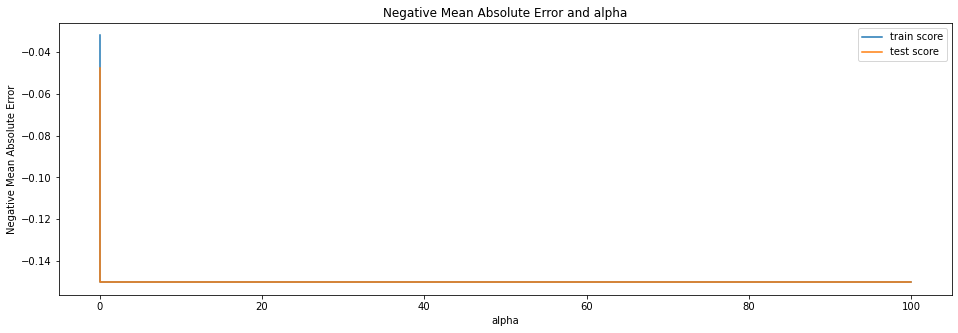

In [159]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [160]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [161]:
lasso.coef_

array([ 0.00000000e+00,  1.59173905e-01,  1.04775551e-02,  1.00444134e-01,
        3.93686374e-02, -0.00000000e+00,  2.07156375e-01,  0.00000000e+00,
        8.93729281e-03, -2.35081367e-02,  7.39279870e-01,  2.16779674e-02,
        9.09203543e-02,  2.94127078e-02,  3.24645084e-02,  0.00000000e+00,
        0.00000000e+00,  4.59702217e-02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.25631285e-01, -1.86559930e-02,  0.00000000e+00,
       -4.80959946e-03,  0.00000000e+00,  6.90468065e-03, -0.00000000e+00,
       -0.00000000e+00,  1.95681577e-02,  2.90613542e-02,  0.00000000e+00,
       -0.00000000e+00, -1.99808530e-03, -2.02589130e-02, -5.43322627e-02,
       -0.00000000e+00, -1.47849800e-02,  3.46199380e-02,  0.00000000e+00,
        2.36950481e-02,  0.00000000e+00,  1.41731423e-02,  0.00000000e+00,
        0.00000000e+00, -1.40214298e-03,  0.00000000e+00,  3.28603410e-03,
        1.43012757e-02, -8.74404356e-03,  1.13594043e-02, -0.00000000e+00,
        1.57782506e-02, -

In [162]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9422566007432482
0.7488501746795952
2.0549202234489248
4.243939048940412
0.0020989992067915473
0.010104616783191456


In [163]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.551675e-01          0.928588          0.942257
1   R2 Score (Test)      -5.381261e+20          0.855160          0.748850
2       RSS (Train)       1.595459e+00          2.541329          2.054920
3        RSS (Test)       9.093274e+21          2.447506          4.243939
4       MSE (Train)       4.036932e-02          0.050949          0.045815
5        MSE (Test)       4.653026e+09          0.076337          0.100522

### Lets observe the changes in the coefficients after regularization

In [164]:
betas = pd.DataFrame(index=X_train.columns)

In [165]:
betas.shape

(312, 0)

In [166]:
betas.rows = X_train.columns

In [167]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [168]:
pd.set_option('display.max_rows', None)

In [169]:
betas.shape

(312, 3)

In [170]:
betas.head(312)

Linear     Ridge     Lasso
LotFrontage            1.593258e-02 -0.011367  0.000000
LotArea                3.285847e-01  0.081871  0.159174
MasVnrArea             3.398398e-02  0.020631  0.010478
BsmtFinSF1             6.450503e+10  0.057427  0.100444
BsmtFinSF2             1.684628e+10  0.047230  0.039369
BsmtUnfSF              2.177216e+10  0.021196 -0.000000
TotalBsmtSF           -6.983093e+10  0.071050  0.207156
1stFlrSF              -1.046114e+10  0.140802  0.000000
2ndFlrSF              -4.364009e+09  0.112307  0.008937
LowQualFinSF          -1.267435e+09  0.010638 -0.023508
GrLivArea              1.274156e+10  0.155125  0.739280
GarageCars             2.880907e-02  0.048131  0.021678
GarageArea             1.111784e-01  0.094978  0.090920
WoodDeckSF             2.840579e-02  0.039748  0.029413
OpenPorchSF            3.483772e-02  0.039180  0.032465
EnclosedPorch         -9.996891e-04  0.003161  0.000000
3SsnPorch              2.609265e-02  0.030900  0.000000
ScreenPorch            6.164747e-02  0.045237  0.045970
PoolArea              -3.644473e+10 -0.043619 -0.000000
MiscVal                9.316102e-02  0.039314  0.000000
MoSold                -1.861095e-03  0.003159  0.000000
houseAge              -1.902342e-01 -0.045618 -0.125631
houseRemodAge         -1.454473e-02 -0.021673 -0.018656
garageAge              3.227043e-02 -0.000211  0.000000
MSSubClass_30          1.717186e-02 -0.019033 -0.004810
MSSubClass_40          4.061234e-02  0.005229  0.000000
MSSubClass_45          6.015778e-03  0.006431  0.006905
MSSubClass_50         -4.863739e-05 -0.003775 -0.000000
MSSubClass_60         -1.053619e-02 -0.009891 -0.000000
MSSubClass_70          3.627586e-02  0.015861  0.019568
MSSubClass_75          1.880260e-01  0.057537  0.029061
MSSubClass_80         -5.899310e-02  0.000255  0.000000
MSSubClass_85         -7.188797e-02 -0.008199 -0.000000
MSSubClass_90         -2.269357e+09 -0.005358 -0.001998
MSSubClass_120        -8.394241e-03 -0.019926 -0.020259
MSSubClass_160        -6.914520e-02 -0.055074 -0.054332
MSSubClass_180        -4.595530e-02  0.000043 -0.000000
MSSubClass_190        -9.294987e-02 -0.022714 -0.014785
MSZoning_FV            9.321976e-02  0.042002  0.034620
MSZoning_RH            5.335820e-02  0.013756  0.000000
MSZoning_RL            7.019615e-02  0.037428  0.023695
MSZoning_RM            3.656864e-02  0.016814  0.000000
Street_Pave           -1.304179e-02  0.019934  0.014173
Alley_NA               1.180077e-02  0.006758  0.000000
Alley_Pave             1.185083e-02  0.011208  0.000000
LotShape_IR2          -1.423132e-02  0.002312 -0.001402
LotShape_IR3           9.704709e-03 -0.006849  0.000000
LotShape_Reg           9.975433e-04  0.004166  0.003286
LandContour_HLS        1.440573e-02  0.024170  0.014301
LandContour_Low       -2.994967e-02 -0.005658 -0.008744
LandContour_Lvl       -1.678467e-04  0.023457  0.011359
Utilities_NoSeWa      -1.703326e-01 -0.039736 -0.000000
LotConfig_CulDSac      1.238823e-02  0.017866  0.015778
LotConfig_FR2         -1.742744e-02 -0.010363 -0.000856
LotConfig_FR3         -5.731055e-02 -0.029071 -0.002142
LotConfig_Inside      -7.867813e-03 -0.011689 -0.005441
LandSlope_Mod          1.501560e-02  0.023623  0.008186
LandSlope_Sev         -8.030295e-02 -0.014947 -0.021237
Neighborhood_Blueste   4.173640e+09  0.000000  0.000000
Neighborhood_BrDale    6.162405e-02  0.021085  0.030092
Neighborhood_BrkSide   1.713800e-02 -0.000224  0.018922
Neighborhood_ClearCr   2.323222e-02  0.051555  0.053478
Neighborhood_CollgCr  -1.180220e-02 -0.012812 -0.003206
Neighborhood_Crawfor   4.048383e-02  0.039840  0.054414
Neighborhood_Edwards  -3.990853e-02 -0.046481 -0.026962
Neighborhood_Gilbert  -8.467674e-03 -0.011300 -0.000000
Neighborhood_IDOTRR   -9.779930e-04 -0.029709 -0.005500
Neighborhood_MeadowV  -2.649736e-02 -0.046339 -0.032228
Neighborhood_Mitchel  -3.146958e-02 -0.029606 -0.018652
Neighborhood_NAmes    -2.899933e-02 -0.029918 -0.015004
Neighborhood_NPkVill   1.394582e-02  0.002106  0.0166

 ### Effect of doubling the value of alpha for Ridge and Lasso Regression

In [171]:
#Fitting Ridge model for alpha = 4 and printing coefficients which have been penalised
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train,y_train)
print(ridge.coef_)

[-4.46461595e-03  5.33224474e-02  1.96656724e-02  3.75117963e-02
  3.62770983e-02  2.47883501e-02  5.11310685e-02  9.66733320e-02
  8.69371948e-02  3.08202272e-03  1.09453939e-01  5.31442498e-02
  8.19771604e-02  4.11265067e-02  3.63489067e-02  1.88239621e-03
  2.22722362e-02  3.86056870e-02 -2.88514218e-02  2.37221659e-02
  3.97245586e-03 -2.86856112e-02 -2.45083993e-02 -6.62093693e-03
 -2.42351429e-02  4.76583182e-03  3.99839481e-03 -4.12180303e-03
 -5.21067804e-03  1.67664346e-02  4.40848677e-02 -7.28521630e-04
 -5.59448458e-03 -1.90266867e-03 -1.82162072e-02 -4.79198253e-02
 -2.44916092e-03 -1.77804013e-02  3.03881540e-02  8.80114875e-03
  2.95801309e-02  7.65462399e-03  1.69771457e-02  4.81281717e-03
  8.52701791e-03  5.46134337e-03 -9.63456334e-03  2.78270188e-03
  2.16278199e-02 -3.18269793e-03  2.30770188e-02 -2.28496617e-02
  1.79944499e-02 -1.02333836e-02 -1.78595822e-02 -1.14190481e-02
  2.25485396e-02 -8.21074056e-03  0.00000000e+00  1.54490043e-02
  1.57511566e-03  4.94770

In [172]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9192967930118875
0.8609557335517786
2.871993236831582
2.3495751635824043
0.002933598811881085
0.005594226579958106


In [173]:
#Fitting Lasso model for alpha = 0.0002 and printing coefficients which have been penalised

alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [174]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9286501708517968
0.834878963127833
2.539133628145813
2.7902213958911526
0.0025935992115891857
0.0066433842759313156


In [175]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [176]:
betas.head(312)

Linear     Ridge     Lasso
LotFrontage            1.593258e-02 -0.004465 -0.000000
LotArea                3.285847e-01  0.053322  0.042833
MasVnrArea             3.398398e-02  0.019666  0.000000
BsmtFinSF1             6.450503e+10  0.037512  0.000000
BsmtFinSF2             1.684628e+10  0.036277  0.012530
BsmtUnfSF              2.177216e+10  0.024788 -0.000000
TotalBsmtSF           -6.983093e+10  0.051131  0.120508
1stFlrSF              -1.046114e+10  0.096673  0.000000
2ndFlrSF              -4.364009e+09  0.086937  0.000000
LowQualFinSF          -1.267435e+09  0.003082 -0.016800
GrLivArea              1.274156e+10  0.109454  0.645380
GarageCars             2.880907e-02  0.053144  0.028822
GarageArea             1.111784e-01  0.081977  0.095308
WoodDeckSF             2.840579e-02  0.041127  0.031705
OpenPorchSF            3.483772e-02  0.036349  0.031024
EnclosedPorch         -9.996891e-04  0.001882 -0.000000
3SsnPorch              2.609265e-02  0.022272  0.000000
ScreenPorch            6.164747e-02  0.038606  0.037156
PoolArea              -3.644473e+10 -0.028851 -0.000000
MiscVal                9.316102e-02  0.023722  0.000000
MoSold                -1.861095e-03  0.003972  0.000000
houseAge              -1.902342e-01 -0.028686 -0.086238
houseRemodAge         -1.454473e-02 -0.024508 -0.022667
garageAge              3.227043e-02 -0.006621 -0.000000
MSSubClass_30          1.717186e-02 -0.024235 -0.014487
MSSubClass_40          4.061234e-02  0.004766  0.000000
MSSubClass_45          6.015778e-03  0.003998  0.000000
MSSubClass_50         -4.863739e-05 -0.004122 -0.000000
MSSubClass_60         -1.053619e-02 -0.005211  0.000000
MSSubClass_70          3.627586e-02  0.016766  0.009933
MSSubClass_75          1.880260e-01  0.044085  0.019503
MSSubClass_80         -5.899310e-02 -0.000729 -0.000000
MSSubClass_85         -7.188797e-02 -0.005594 -0.000000
MSSubClass_90         -2.269357e+09 -0.001903 -0.000000
MSSubClass_120        -8.394241e-03 -0.018216 -0.013635
MSSubClass_160        -6.914520e-02 -0.047920 -0.043572
MSSubClass_180        -4.595530e-02 -0.002449 -0.000000
MSSubClass_190        -9.294987e-02 -0.017780 -0.010265
MSZoning_FV            9.321976e-02  0.030388  0.026404
MSZoning_RH            5.335820e-02  0.008801  0.000000
MSZoning_RL            7.019615e-02  0.029580  0.021910
MSZoning_RM            3.656864e-02  0.007655 -0.000000
Street_Pave           -1.304179e-02  0.016977  0.000000
Alley_NA               1.180077e-02  0.004813  0.000000
Alley_Pave             1.185083e-02  0.008527  0.000000
LotShape_IR2          -1.423132e-02  0.005461  0.000000
LotShape_IR3           9.704709e-03 -0.009635 -0.000000
LotShape_Reg           9.975433e-04  0.002783  0.000467
LandContour_HLS        1.440573e-02  0.021628  0.007035
LandContour_Low       -2.994967e-02 -0.003183 -0.000000
LandContour_Lvl       -1.678467e-04  0.023077  0.012169
Utilities_NoSeWa      -1.703326e-01 -0.022850 -0.000000
LotConfig_CulDSac      1.238823e-02  0.017994  0.017194
LotConfig_FR2         -1.742744e-02 -0.010233 -0.000000
LotConfig_FR3         -5.731055e-02 -0.017860 -0.000000
LotConfig_Inside      -7.867813e-03 -0.011419 -0.005665
LandSlope_Mod          1.501560e-02  0.022549  0.007128
LandSlope_Sev         -8.030295e-02 -0.008211 -0.000000
Neighborhood_Blueste   4.173640e+09  0.000000  0.000000
Neighborhood_BrDale    6.162405e-02  0.015449  0.008981
Neighborhood_BrkSide   1.713800e-02  0.001575  0.016299
Neighborhood_ClearCr   2.323222e-02  0.049477  0.067552
Neighborhood_CollgCr  -1.180220e-02 -0.013866 -0.000000
Neighborhood_Crawfor   4.048383e-02  0.040247  0.057787
Neighborhood_Edwards  -3.990853e-02 -0.044139 -0.025380
Neighborhood_Gilbert  -8.467674e-03 -0.015663  0.000000
Neighborhood_IDOTRR   -9.779930e-04 -0.026495 -0.003885
Neighborhood_MeadowV  -2.649736e-02 -0.041524 -0.030259
Neighborhood_Mitchel  -3.146958e-02 -0.026264 -0.007305
Neighborhood_NAmes    -2.899933e-02 -0.027652 -0.011026
Neighborhood_NPkVill   1.394582e-02 -0.000732  0.0000

### Rebuilding the model after removing five most important parameters from the model

In [177]:
X_train_1 = X_train.drop(["Fireplaces_3", "Condition2_PosN", "GrLivArea", "TotalBsmtSF", "OverallQual_9"], axis=1)

In [178]:
#### Ridge Regression

In [179]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_1,y_train)

Ridge(alpha=2)

In [180]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_1, y_train) 

Lasso(alpha=0.0001)

In [181]:
betas = pd.DataFrame(index=X_train_1.columns)
betas.rows = X_train_1.columns

In [182]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas.head(307)

Ridge     Lasso
LotFrontage           -0.007088  0.000000
LotArea                0.083120  0.112750
MasVnrArea             0.014955  0.000000
BsmtFinSF1             0.074662  0.142683
BsmtFinSF2             0.052902  0.061473
BsmtUnfSF              0.040784  0.025362
1stFlrSF               0.181296  0.587051
2ndFlrSF               0.132614  0.225207
LowQualFinSF           0.015661  0.007230
GarageCars             0.055603  0.035800
GarageArea             0.100671  0.093000
WoodDeckSF             0.049357  0.041928
OpenPorchSF            0.041298  0.021847
EnclosedPorch          0.005728  0.000000
3SsnPorch              0.035987  0.004225
ScreenPorch            0.048939  0.050106
PoolArea              -0.043210 -0.000000
MiscVal                0.039244  0.001173
MoSold                 0.003617  0.000000
houseAge              -0.041768 -0.099268
houseRemodAge         -0.022898 -0.020201
garageAge              0.000428  0.000000
MSSubClass_30         -0.021932 -0.013172
MSSubClass_40          0.008860  0.000000
MSSubClass_45          0.003545  0.000000
MSSubClass_50         -0.003928  0.000000
MSSubClass_60         -0.013904 -0.000000
MSSubClass_70          0.017772  0.022604
MSSubClass_75          0.062044  0.043293
MSSubClass_80          0.000339  0.000000
MSSubClass_85         -0.012334 -0.000000
MSSubClass_90         -0.004498 -0.000752
MSSubClass_120        -0.019108 -0.025864
MSSubClass_160        -0.054912 -0.055001
MSSubClass_180         0.002718 -0.000000
MSSubClass_190        -0.022464 -0.004803
MSZoning_FV            0.041551  0.028968
MSZoning_RH            0.014218  0.000000
MSZoning_RL            0.039794  0.020375
MSZoning_RM            0.020857  0.000000
Street_Pave            0.019641  0.009228
Alley_NA               0.007135  0.000000
Alley_Pave             0.012096  0.000120
LotShape_IR2          -0.000607 -0.002850
LotShape_IR3          -0.007710  0.000000
LotShape_Reg           0.002857  0.001385
LandContour_HLS        0.029221  0.026837
LandContour_Low       -0.006860 -0.003420
LandContour_Lvl        0.026702  0.021994
Utilities_NoSeWa      -0.042768 -0.000000
LotConfig_CulDSac      0.017751  0.013288
LotConfig_FR2         -0.014281 -0.000370
LotConfig_FR3         -0.023703 -0.000000
LotConfig_Inside      -0.013274 -0.008885
LandSlope_Mod          0.024370  0.015041
LandSlope_Sev         -0.015472 -0.020664
Neighborhood_Blueste   0.000000  0.000000
Neighborhood_BrDale    0.022274  0.029839
Neighborhood_BrkSide  -0.002083  0.011993
Neighborhood_ClearCr   0.052216  0.061723
Neighborhood_CollgCr  -0.009709 -0.000000
Neighborhood_Crawfor   0.039037  0.048612
Neighborhood_Edwards  -0.049388 -0.036255
Neighborhood_Gilbert  -0.013778 -0.000000
Neighborhood_IDOTRR   -0.032494 -0.013019
Neighborhood_MeadowV  -0.044119 -0.026230
Neighborhood_Mitchel  -0.033118 -0.025862
Neighborhood_NAmes    -0.030696 -0.021331
Neighborhood_NPkVill   0.001154  0.010655
Neighborhood_NWAmes   -0.019423 -0.006667
Neighborhood_NoRidge   0.093302  0.090832
Neighborhood_NridgHt   0.076568  0.076699
Neighborhood_OldTown  -0.035146 -0.021420
Neighborhood_SWISU    -0.031459 -0.021189
Neighborhood_Sawyer   -0.023216 -0.015289
Neighborhood_SawyerW  -0.002831 -0.000000
Neighborhood_Somerst   0.031205  0.035863
Neighborhood_StoneBr   0.054769  0.053197
Neighborhood_Timber    0.015430  0.014527
Neighborhood_Veenker   0.033329  0.032545
Condition1_Feedr      -0.006411 -0.000000
Condition1_Norm        0.017790  0.020892
Condition1_PosA        0.000171 -0.000000
Condition1_PosN        0.014016  0.000000
Condition1_RRAe       -0.036421 -0.030223
Condition1_RRAn        0.000434  0.000000
Condition1_RRNe       -0.015831 -0.000000
Condition1_RRNn        0.019768  0.000000
Condition2_Feedr       0.027251  0.026680
Condition2_Norm        0.045528  0.049346
Condition2_PosA        0.098997  0.430162
Condition2_RRAe        0.000000  0.000000
Condition2_RRAn        0.003189 -0.000000
Condition2_RRNn        0.026262  0.013652
BldgType_2fmCon       -0.005584 -0.0